In [16]:
import numpy as np
import scipy.special
from scipy.stats import binom, norm, chi2, hypergeom, t, fisher_exact, ttest_1samp, ttest_ind, ttest_ind_from_stats
n, k = 31000, 63
p = .00203
scipy.special.comb(n, k)*p**k*(1-p)**(n-k)

C:\Users\Sandipan.Dey\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Sandipan.Dey\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.05024468664277072

In [19]:
binom.pmf(k, n, p)

0.050244686645578546

In [36]:
30000*0.00203 #/31000

60.900000000000006

In [22]:
n*p + np.sqrt(p*(1-p))*norm.ppf(0.95)

63.004034478034185

In [25]:
binom.ppf(0.95, n, p)

76.0

In [37]:
binom.cdf(49, n, p)

0.04100901205583328

In [35]:
binom.cdf(39, n, p)

0.0008074555188499868

In [40]:
from sympy import *
w, a, b = symbols('w a b')
diff(1/(1+a*(w-b)**2), w)

-a*(-2*b + 2*w)/(a*(-b + w)**2 + 1)**2

In [41]:
diff(1/(1+a*(w-b)**2), w, 2)

2*a*(4*a*(b - w)**2/(a*(b - w)**2 + 1) - 1)/(a*(b - w)**2 + 1)**2

In [45]:
var = {'a':2,'b':2,'w':2}
eval('2*a*(0-1)/(0+1)**2', var)

-4.0

In [46]:
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, \
0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, \
1.72, 2.03, 2.02, 2.02, 2.02])

Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, \
93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, \
840.0, 801.0, 519.0])

N = 24

In [47]:
np.mean(Xs), np.mean(Ys)

(0.9199250000000001, 425.6175)

In [48]:
len(Xs)

24

In [52]:
np.cov(Xs, Ys, ddof=1)[0,1]

191.20706528260865

In [50]:
?np.cov

In [59]:
np.corrcoef(Xs, Ys, ddof=1)[0,1]

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


0.8391399162310662

In [61]:
np.corrcoef(Xs, Ys, ddof=1)[0,1] * np.std(Ys, ddof=1) / np.std(Xs, ddof=1)

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


447.8705991409983

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xs.reshape(-1,1), Ys)
reg.coef_

array([447.87059914])

In [67]:
np.mean(Ys) - np.corrcoef(Xs, Ys, ddof=1)[0,1] * np.std(Ys, ddof=1) / np.std(Xs, ddof=1) * np.mean(Xs)

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


13.6101390852171

In [70]:
#dir(reg)
reg.intercept_

13.6101390852171

In [87]:
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])

Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])

N = 9

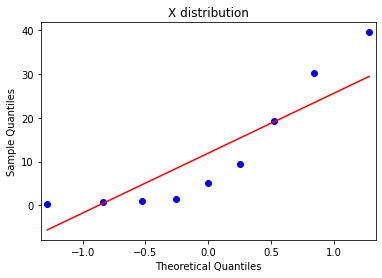

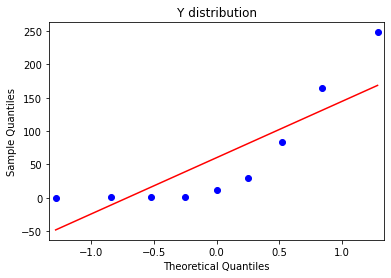

In [88]:
import statsmodels.api as sm
import matplotlib.pylab as plt
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()
sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()

In [74]:
np.corrcoef(Xs, Ys, ddof=1)[0,1]

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


0.9888323018726733

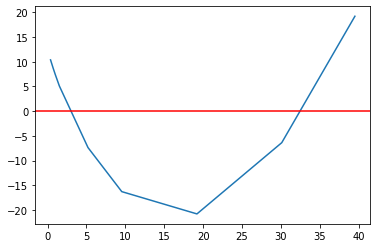

In [85]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xs.reshape(-1,1), Ys)
plt.plot(Xs, np.array(Ys)-reg.predict(Xs.reshape(-1,1)))
plt.axhline(0, color='red')

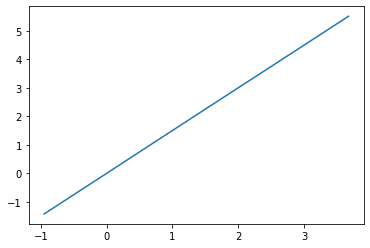

In [90]:
plt.plot(np.log(Xs), np.log(Ys))

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log(Xs).reshape(-1,1), np.log(Ys))
reg.coef_, reg.intercept_

(array([1.49953258]), 0.0013370447605027813)

In [92]:
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])

LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])

LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])

StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])

LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])

LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30

In [104]:
X = np.column_stack((LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))
y = LogPlanetMass

In [105]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.coef_, reg.intercept_

(array([ 1.40214538, -0.14099818, -1.59951364, -0.95610919, -0.46176234]),
 0.15379302910641113)

In [108]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9.264
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           5.14e-05
Time:                        14:24:51   Log-Likelihood:                -42.078
No. Observations:                  30   AIC:                             96.16
Df Residuals:                      24   BIC:                             104.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1538      1.389      0.111      0.913      -2.713       3.021
x1             1.4021      0.286      4.895      0.000       0.811       1.993
x2            -0.1410      0.360     -0.392      0.699      -0.884       0.602
x3            -1.5995      1.251     -1.279      0.213      -4.181       0.981
x4            -0.9561      1.117     -0.856      0.400      -3.261       1.349
x5            -0.4618      0.372     -1.243      0.226      -1.229       0.305
==============================================================================
Omnibus:                       12.444   Durbin-Watson:                   2.260
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.848
Skew:                           1.274   Prob(JB):                      0.00267
Kurtosis:                       4.729   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
X.shape

(30, 6)

In [100]:
X

array([[ 1.00000000e+00,  3.24977860e-01, -2.63108916e+00,
         1.10000000e-01,  2.70027140e-01,  1.58103844e+00],
       [ 1.00000000e+00,  3.47129530e-01, -3.89026151e+00,
        -2.00000000e-03,  1.91446460e-01,  1.06471074e+00],
       [ 1.00000000e+00,  1.48420010e-01, -3.13752628e+00,
        -4.00000000e-01, -1.63696090e-01,  2.39789527e+00],
       [ 1.00000000e+00,  4.57424850e-01, -2.99633245e+00,
         1.00000000e-02,  4.44685820e-01,  7.27548610e-01],
       [ 1.00000000e+00,  1.88966100e-01, -3.12356565e+00,
         1.50000000e-01,  1.92271890e-01,  5.56754560e-01],
       [ 1.00000000e+00,  6.95260600e-02, -2.33924908e+00,
         2.20000000e-01,  1.29162300e-02,  1.91692261e+00],
       [ 1.00000000e+00,  7.69610400e-02, -2.85076650e+00,
        -1.00000000e-02,  8.61777000e-02,  1.64865863e+00],
       [ 1.00000000e+00,  3.22083500e-01, -3.04765735e+00,
         2.00000000e-02,  1.38021300e-01,  1.38629436e+00],
       [ 1.00000000e+00,  4.29181630e-01, -2.840

In [ ]:
X = np.column_stack((np.ones(len(LogPlanetMass)), LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge))
y = LogPlanetMass

In [103]:
np.round(np.linalg.inv(X.T@X)@(X.T@y), 3)

array([ 0.154,  1.402, -0.141, -1.6  , -0.956, -0.462])

In [113]:
-2 * np.log(binom.pmf(39, 31000, 102/62000) * binom.pmf(63, 31000, 102/62000) / 
           (binom.pmf(39, 31000, 39/31000) * binom.pmf(63, 31000, 63/31000)))

5.709660479762277

In [119]:
1-chi2(1).cdf(5.709660479762277)

0.016871802195941754

In [115]:
?chi2.pdf

In [121]:
hypergeom.cdf(39, 62000, 31000, 102)

0.011094091843958116

In [123]:
#sum([scipy.special.comb(31000, k) * scipy.special.comb(31000, 102-k) / scipy.special.comb(62000, 102) for k in range(39)])

In [127]:
stats.fisher_exact([[39, 63],[30961, 30937]],'less') 

(0.6185677526719483, 0.011094091844052025)

In [128]:
norm.cdf(-3.0268)

0.0012357871459340907

In [131]:
X = [0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5]
np.mean(X), np.std(X, ddof=1)

(1.78, 1.7681126158201075)

In [138]:
n = len(X)
1 - t(n-1).cdf(np.mean(X) / (np.std(X, ddof=1) / np.sqrt(n)))

0.0055606927492846125

In [139]:
np.mean(X) 

1.78

In [140]:
X = np.array([ 0.9, -0.9, 4.3, 2.9, 1.2, 3. , 2.7, 0.6, 3.6, -0.5])
t_stats,p_value = stats.ttest_1samp(X, popmean=0)
p_value=p_value/2

In [141]:
p_value

0.005560692749284678

In [168]:
np.random.seed(1)
n = 100
X = np.random.random((n,2))
beta = np.array([-1, 2])
noise = np.random.normal(loc=0, scale=2, size=n)
y = X@beta + noise

In [169]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
beta_hat = [reg.intercept_] + reg.coef_.tolist()
beta_hat

[0.18444290873001834, -1.5879784718284842, 2.5252138207251904]

In [178]:
# add ones column
X1 = np.column_stack((np.ones(n), X))
# standard deviation of the noise.
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
# estimate the covariance matrix for beta 
beta_cov = np.linalg.inv(X1.T@X1)
# the t-test statistic for each variable
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
# compute 2-sided p-values.
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2

In [179]:
t_vals

array([ 0.37424023, -2.36373529,  3.57930174])

In [180]:
p_vals

array([7.09042437e-01, 2.00854025e-02, 5.40073114e-04])

In [181]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.tvalues 
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     8.308
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           0.000467
Time:                        12:16:20   Log-Likelihood:                -213.23
No. Observations:                 100   AIC:                             432.5
Df Residuals:                      97   BIC:                             440.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1844      0.493      0.374      0.709      -0.794       1.163
x1            -1.5880      0.672     -2.364      0.020      -2.921      -0.255
x2             2.5252      0.706      3.579      0.001       1.125       3.925
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.402
Skew:                           0.114   Prob(JB):                        0.818
Kurtosis:                       2.789   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [841]:
import pandas as pd
df = pd.read_csv('Module1/data_and materials/gamma-ray.csv')
df.head()

seconds  count
0    116.0    0.0
1    112.0    0.0
2    160.0    0.0
3     51.5    0.0
4    102.0    1.0

In [842]:
df.shape

(100, 2)

In [847]:
#n = df.shape[0]
df['count'].sum(), df.seconds.sum(), df['count'].sum() / df.seconds.sum()

(61.0, 15718.2, 0.0038808514969907496)

In [859]:
from scipy.special import factorial
lambda0 = df['count'].sum() / df.seconds.sum()
lnL0 = np.sum(df['count']*np.log(lambda0*df.seconds)) - lambda0*df.seconds.sum() - np.log(factorial(df['count'])).sum()
lnL0

-90.44443888843432

In [861]:
def log0(x):
    x[x == 0] = 1e-6
    return np.log(x)

lnL1 = np.sum(df['count']*log0(df['count'])) - df['count'].sum() - np.log(factorial(df['count'])).sum()
lnL1

-38.24644642743642

In [863]:
Lambda = -2*(lnL0 - lnL1)
Lambda

104.3959849219958

In [872]:
#chi2(df=1).ppf(0.95)
chi2(df=99).ppf(0.95)

123.2252214533618

In [873]:
1-chi2(df=99).cdf(Lambda)

0.3358150370585662

In [843]:
(df.seconds*df['count']).sum() / df.seconds.sum()

1.8573246300466972

In [468]:
(df.seconds*df['count']).mean()

291.93800000000005

In [874]:
0.7*0.25/(0.25+0.05)

0.5833333333333334

In [875]:
0.7*1/(1+0.05)

0.6666666666666666

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'seconds'}>]], dtype=object)

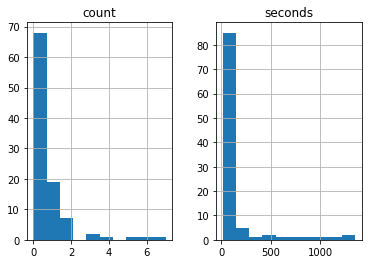

In [206]:
df.hist()

<AxesSubplot:>

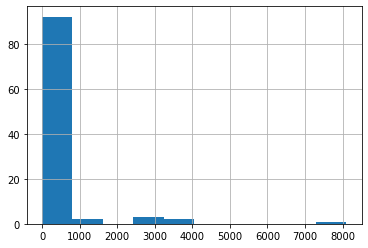

In [208]:
(df.seconds*df['count']).hist()

In [211]:
def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

In [243]:
df_x = pd.read_csv('Module1/data_and materials/syn_x.csv', header=None)
df_y = pd.read_csv('Module1/data_and materials/syn_y.csv', header=None)
df_x.head()

0        1
0  0.53767  0.84038
1  1.83390 -0.88803
2 -2.25880  0.10009
3  0.86217 -0.54453
4  0.31877  0.30352

In [244]:
df_y.head()

0
0 -1.04490
1  7.68190
2 -0.68642
3  5.63850
4  1.08430

In [455]:
X, y = df_x.values, df_y.values
X = add_intercept(X)
X.shape, y.shape

((100, 3), (100, 1))

In [456]:
np.linalg.inv(X.T@X)@(X.T@y).flatten()

array([ 1.92960603,  1.26397096, -4.59799331])

In [457]:
def gradient_descent(X, y, step_size, precision, maxiter=100):
    #w = np.random.random((X.shape[1],1))
    w = np.zeros((X.shape[1],1))
    for i in range(maxiter):
        w1 = w - (step_size) * (2*X.T@(X@w-y)) #/X.shape[1]
        print(i, np.linalg.norm(w-w1), (y-X@w).T@(y-X@w)) # / X.shape[0])
        if np.linalg.norm(w-w1) < precision: #/np.linalg.norm(w)
            break
        w = w1
    return w

w = gradient_descent(X, y, 0.004, 1e-6) #4*1e-3
w

0 4.390793792001632 [[2836.02733494]]
1 0.7014805190632436 [[99.75155364]]
2 0.1397120017474922 [[27.39065261]]
3 0.034948549377447756 [[24.37479694]]
4 0.009753260007452124 [[24.18024224]]
5 0.002812046294552237 [[24.16493742]]
6 0.0008173629530737116 [[24.16366194]]
7 0.00023803564975020359 [[24.16355411]]
8 6.935294933037811e-05 [[24.16354497]]
9 2.0208485887189265e-05 [[24.16354419]]
10 5.888617993855016e-06 [[24.16354412]]
11 1.7159139863250481e-06 [[24.16354412]]
12 5.000094813406904e-07 [[24.16354412]]


array([[ 1.92960653],
       [ 1.26397076],
       [-4.59799286]])

In [388]:
def grad_update(X, y, θ):
    return θ - alpha*2*X.T@(X@θ-y)

def compute_loss(X, y, θ):
    return np.mean((X@θ-y)**2)
    
def grad_step(X, y, θ, α = 0.01):
    return grad_update(X, y, θ)

α = 0.001
X, y = df_x.values, df_y.values

def plot_loss_surface(X, y):
    w1, w2 = np.linspace(0, 3, 200), np.linspace(-7, 2, 200) #np.meshgrid()
    mse_surf = np.zeros(shape=(w1.size, w2.size))
    for i, v1 in enumerate(w1):
        for j, v2 in enumerate(w2):
            mse_surf[i, j] = compute_loss(X, y, np.array((v2, v1)).reshape(-1,1))
    plt.contourf(w1, w2, mse_surf, cmap='hot')
    #cp = plt.contourf(w1, w2, mse_surf, cmap='hot')
    #plt.clabel(cp, inline=1, fontsize=10)
    plt.colorbar()

θ = np.zeros(X.shape[1]).reshape(-1,1)
for i in range(20):
    plt.figure(figsize=(15,10))
    plot_loss_surface(X, y)
    θ = grad_step(X, y, θ, α)
    w1, w2 = θ.squeeze()
    plt.scatter(w1, w2, c='b', s=50)
    plt.title('Grdient Descent Iteration = {}'.format(i), size=20)
    plt.tight_layout()
    plt.savefig('out_{:03d}.png'.format(i))
    plt.close()
#plt.show()

In [395]:
import zipfile
import numpy as np

# returns a 3-tuple of (list of city names, list of variable names, numpy record array with each variable as a field)
def read_mortality_csv(zip_file):
  import io
  import csv
  fields, cities, values = None, [], []
  with io.TextIOWrapper(zip_file.open('data_and materials/mortality.csv')) as wrap:
    csv_reader = csv.reader(wrap, delimiter=',', quotechar='"')
    fields = next(csv_reader)[1:]
    for row in csv_reader:
      cities.append(row[0])
      values.append(tuple(map(float, row[1:])))
  dtype = np.dtype([(name, float) for name in fields])
  return cities, fields, np.array(values, dtype=dtype).view(np.recarray)

with zipfile.ZipFile("Module1/release_statsreview_release.zip") as zip_file:
  m_cities, m_fields, m_values = read_mortality_csv(zip_file)

In [396]:
m_cities

['Akron, OH',
 'Albany-Schenectady-Troy, NY',
 'Allentown, Bethlehem,PA-NJ',
 'Atlanta, GA',
 'Baltimore, MD',
 'Birmingham, AL',
 'Boston, MA',
 'Bridgeport-Milford, CT',
 'Buffalo, NY',
 'Canton, OH',
 'Chattanooga, TN-GA',
 'Chicago, IL',
 'Cincinnati, OH-KY-IN',
 'Cleveland, OH',
 'Columbus, OH',
 'Dallas, TX',
 'Dayton-Springfield, OH',
 'Denver, CO',
 'Detroit, MI',
 'Flint, MI',
 'Grand Rapids,MI',
 'Greensboro-Winston-Salem-High Point,NC',
 'Hartford, CT',
 'Houston, TX',
 'Indianapolis, IN',
 'Kansas City,MO',
 'Lancaster, PA',
 'Los Angeles,Long Beech, CA',
 'Louisville, KY-IN',
 'Memphis, TN-AR-MS',
 'Miami-Hialeah, FL',
 'Milwaukee, WI',
 'Minneapolis-St. Paul,MN-WI',
 'Nashville, TN',
 'New Haven-Meriden,CT',
 'New Orleans,LA',
 'New York,NY',
 'Philadelphia, PA-NJ',
 'Pittsburgh, PA',
 'Portland, OR',
 'Providence, RI',
 'Reading, PA',
 'Richmond-Petersburg, VA',
 'Rochester, NY',
 'St. Louis,MO-IL',
 'San Diego,CA',
 'San Francisco,CA',
 'San Jose,CA',
 'Seattle, WA',
 '

In [397]:
m_fields

['Mortality',
 'JanTemp',
 'JulyTemp',
 'RelHum',
 'Rain',
 'Educ',
 'Dens',
 'NonWhite',
 'WhiteCollar',
 'Pop',
 'House',
 'Income',
 'HC',
 'NOx',
 'SO2']

In [398]:
m_values

rec.array([( 921.87, 27., 71., 59., 36., 11.4, 3243.,  8.8, 42.6,  660328., 3.34, 29560.,  21.,  15.,  59.),
           ( 997.87, 23., 72., 57., 35., 11. , 4281.,  3.5, 50.7,  835880., 3.14, 31458.,   8.,  10.,  39.),
           ( 962.35, 29., 74., 54., 44.,  9.8, 4260.,  0.8, 39.4,  635481., 3.21, 31856.,   6.,   6.,  33.),
           ( 982.29, 45., 79., 56., 47., 11.1, 3125., 27.1, 50.2, 2138231., 3.41, 32452.,  18.,   8.,  24.),
           (1071.29, 35., 77., 55., 43.,  9.6, 6441., 24.4, 43.7, 2199531., 3.44, 32368.,  43.,  38., 206.),
           (1030.38, 45., 80., 54., 53., 10.2, 3325., 38.5, 43.1,  883946., 3.45, 27835.,  30.,  32.,  72.),
           ( 934.7 , 30., 74., 56., 43., 12.1, 4679.,  3.5, 49.2, 2805911., 3.23, 36644.,  21.,  32.,  62.),
           ( 899.53, 30., 73., 56., 45., 10.6, 2140.,  5.3, 40.4,  438557., 3.29, 47258.,   6.,   4.,   4.),
           (1001.9 , 24., 70., 61., 36., 10.5, 6582.,  8.1, 42.5, 1015472., 3.31, 31248.,  18.,  12.,  37.),
           ( 912.35

In [401]:
df = pd.read_csv('Module1/data_and materials/mortality.csv')
df.head()

City  Mortality  JanTemp  JulyTemp  RelHum  Rain  \
0                    Akron, OH     921.87       27        71      59    36   
1  Albany-Schenectady-Troy, NY     997.87       23        72      57    35   
2   Allentown, Bethlehem,PA-NJ     962.35       29        74      54    44   
3                  Atlanta, GA     982.29       45        79      56    47   
4                Baltimore, MD    1071.29       35        77      55    43   

   Educ  Dens  NonWhite  WhiteCollar      Pop  House  Income  HC  NOx  SO2  
0  11.4  3243       8.8         42.6   660328   3.34   29560  21   15   59  
1  11.0  4281       3.5         50.7   835880   3.14   31458   8   10   39  
2   9.8  4260       0.8         39.4   635481   3.21   31856   6    6   33  
3  11.1  3125      27.1         50.2  2138231   3.41   32452  18    8   24  
4   9.6  6441      24.4         43.7  2199531   3.44   32368  43   38  206

In [402]:
df.shape

(59, 16)

In [408]:
y, X = df['Mortality'].values.reshape(-1,1), df.iloc[:,2:].values
y.shape, X.shape

((59, 1), (59, 14))

In [409]:
X = np.concatenate((np.ones_like(X[:,:1]), X), axis=1)
np.linalg.inv(X.T@X)@(X.T@y)

array([[ 1.40003471e+03],
       [-1.44112034e+00],
       [-2.95025005e+00],
       [ 1.36009551e-01],
       [ 9.69507928e-01],
       [-1.10466624e+01],
       [ 4.71706516e-03],
       [ 5.30271368e+00],
       [-1.49231882e+00],
       [ 3.40228581e-06],
       [-3.80416445e+01],
       [-4.25186359e-04],
       [-6.71247478e-01],
       [ 1.17850768e+00],
       [ 8.45829777e-02]])

In [412]:
y, X = df['Mortality'].values.reshape(-1,1), df.iloc[:,2:].values
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_

(array([1400.03471235]),
 array([[-1.44112034e+00, -2.95025005e+00,  1.36009551e-01,
          9.69507928e-01, -1.10466624e+01,  4.71706516e-03,
          5.30271368e+00, -1.49231882e+00,  3.40228581e-06,
         -3.80416445e+01, -4.25186359e-04, -6.71247478e-01,
          1.17850768e+00,  8.45829777e-02]]))

array([[<AxesSubplot:title={'center':'Dens'}>,
        <AxesSubplot:title={'center':'Educ'}>,
        <AxesSubplot:title={'center':'HC'}>,
        <AxesSubplot:title={'center':'House'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'JanTemp'}>,
        <AxesSubplot:title={'center':'JulyTemp'}>,
        <AxesSubplot:title={'center':'Mortality'}>],
       [<AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NonWhite'}>,
        <AxesSubplot:title={'center':'Pop'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'RelHum'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'WhiteCollar'}>, <AxesSubplot:>]],
      dtype=object)

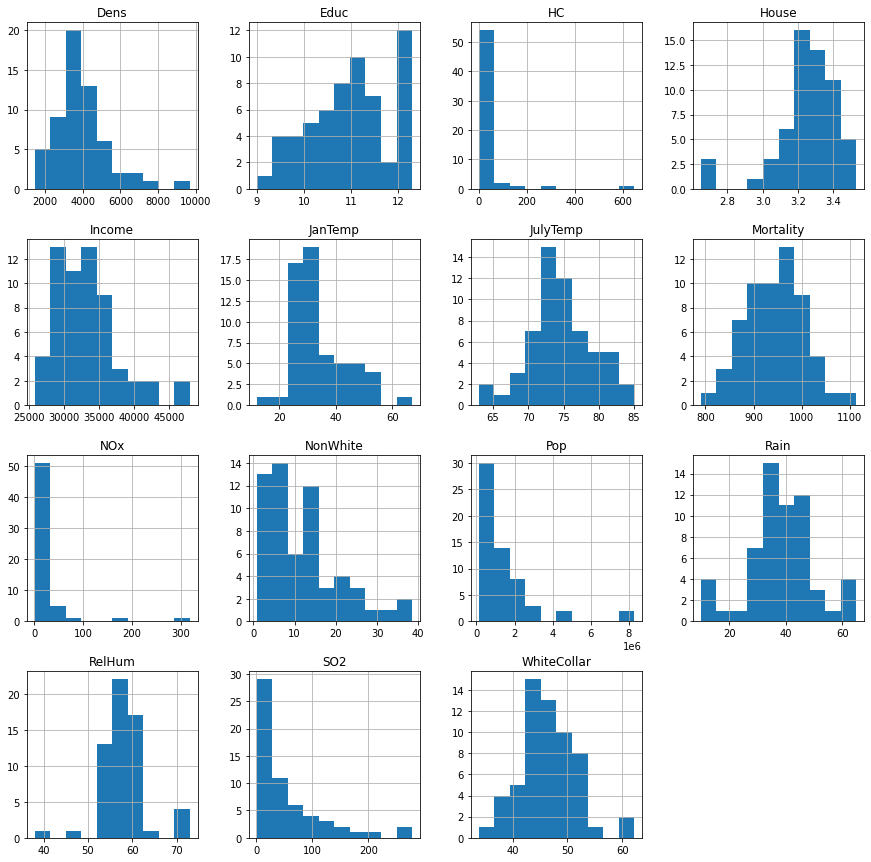

In [421]:
df1 = df.iloc[:,1:]
df1.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':'Dens'}>,
        <AxesSubplot:title={'center':'Educ'}>,
        <AxesSubplot:title={'center':'HC'}>,
        <AxesSubplot:title={'center':'House'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'JanTemp'}>,
        <AxesSubplot:title={'center':'JulyTemp'}>,
        <AxesSubplot:title={'center':'Mortality'}>],
       [<AxesSubplot:title={'center':'NOx'}>,
        <AxesSubplot:title={'center':'NonWhite'}>,
        <AxesSubplot:title={'center':'Pop'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'RelHum'}>,
        <AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'WhiteCollar'}>, <AxesSubplot:>]],
      dtype=object)

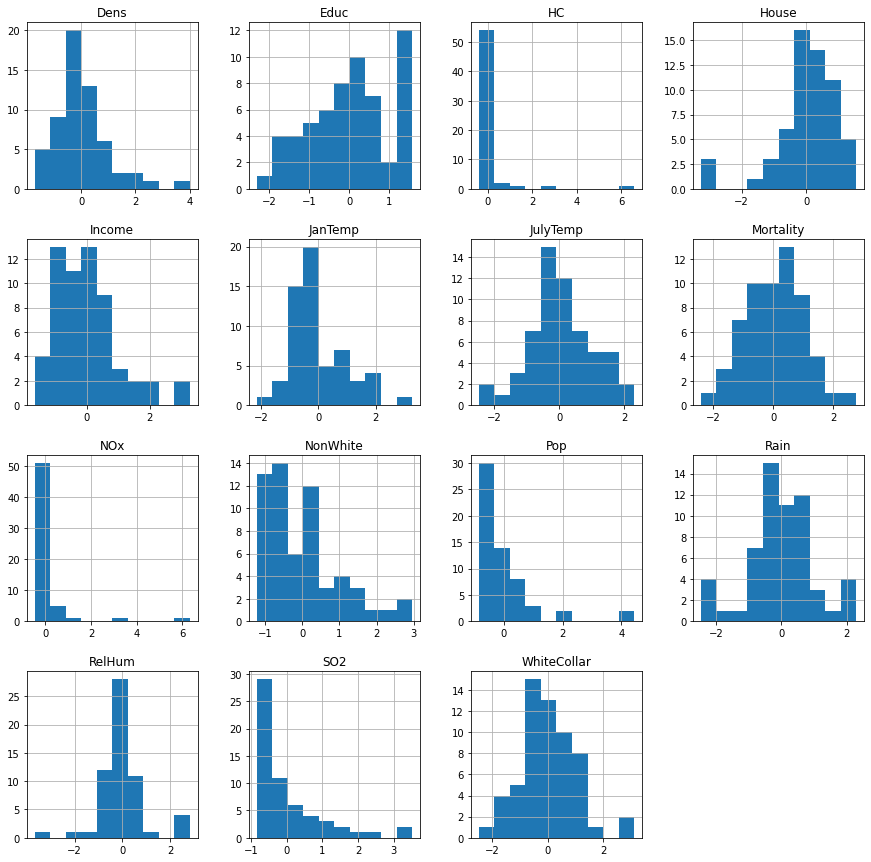

In [422]:
df2 = (df1 - df1.mean())/df1.std()
df2.hist(figsize=(15,15))

In [424]:
df2.mean(axis=0), df2.std(axis=0)

(Mortality      5.438211e-16
 JanTemp        2.709697e-16
 JulyTemp      -1.256998e-15
 RelHum        -3.178954e-16
 Rain           2.894342e-16
 Educ          -4.370327e-15
 Dens          -9.690930e-17
 NonWhite      -5.349417e-16
 WhiteCollar    4.252719e-16
 Pop           -8.091456e-17
 House         -1.520441e-15
 Income        -3.274217e-16
 HC            -5.268855e-17
 NOx            1.081997e-17
 SO2            2.822601e-17
 dtype: float64,
 Mortality      1.0
 JanTemp        1.0
 JulyTemp       1.0
 RelHum         1.0
 Rain           1.0
 Educ           1.0
 Dens           1.0
 NonWhite       1.0
 WhiteCollar    1.0
 Pop            1.0
 House          1.0
 Income         1.0
 HC             1.0
 NOx            1.0
 SO2            1.0
 dtype: float64)

In [438]:
y, X = df2['Mortality'].values.reshape(-1,1), df2.iloc[:,1:].values
y.shape, X.shape

((59, 1), (59, 14))

In [462]:
y, X = df2['Mortality'].values.reshape(-1,1), df2.iloc[:,1:].values
X = np.concatenate((np.ones_like(X[:,:1]), X), axis=1)
w = gradient_descent(X, y, 0.003, 1e-6, maxiter=2500) #4*1e-3
np.round(w.flatten(), 3)

0 0.4348218859869557 [[58.]]
1 0.15551264093429226 [[25.38651685]]
2 0.08515468680393756 [[20.73757182]]
3 0.0592165110622751 [[18.95391422]]
4 0.04667279626403014 [[17.95600856]]
5 0.03923455771701362 [[17.29731385]]
6 0.034197187124689506 [[16.8196549]]
7 0.03047578843525177 [[16.45196527]]
8 0.02754969642145767 [[16.15766181]]
9 0.025142043483307352 [[15.91594987]]
10 0.023096709790514085 [[15.71394826]]
11 0.02132102631433637 [[15.54305117]]
12 0.019756667330436496 [[15.39714118]]
13 0.018364451152543513 [[15.2716603]]
14 0.017116315555512164 [[15.16309578]]
15 0.01599102222630124 [[15.06867552]]
16 0.014971800196787712 [[14.98617472]]
17 0.01404500157300134 [[14.9137855]]
18 0.013199292195375377 [[14.85002447]]
19 0.012425131678824038 [[14.79366468]]
20 0.011714416014763043 [[14.74368418]]
21 0.011060216475736311 [[14.69922641]]
22 0.010456579428791928 [[14.65956927]]
23 0.009898367454877249 [[14.6241007]]
24 0.009381130334285923 [[14.59229926]]
25 0.008900998763731613 [[14.563718

303 0.0014284125262606707 [[13.97639472]]
304 0.0014255062231098667 [[13.97571529]]
305 0.0014226058332357282 [[13.97503862]]
306 0.0014197113446067489 [[13.97436471]]
307 0.0014168227452160472 [[13.97369353]]
308 0.0014139400230810456 [[13.97302508]]
309 0.0014110631662437978 [[13.97235935]]
310 0.0014081921627704134 [[13.97169633]]
311 0.0014053270007513639 [[13.971036]]
312 0.0014024676683015414 [[13.97037835]]
313 0.0013996141535597738 [[13.96972338]]
314 0.0013967664446890475 [[13.96907107]]
315 0.0013939245298766367 [[13.96842141]]
316 0.0013910883973336648 [[13.9677744]]
317 0.001388258035295211 [[13.96713001]]
318 0.0013854334320205191 [[13.96648824]]
319 0.0013826145757925101 [[13.96584909]]
320 0.001379801454918038 [[13.96521253]]
321 0.0013769940577277326 [[13.96457856]]
322 0.0013741923725758382 [[13.96394716]]
323 0.0013713963878406444 [[13.96331833]]
324 0.0013686060919236246 [[13.96269206]]
325 0.0013658214732502226 [[13.96206834]]
326 0.0013630425202693015 [[13.96144715

622 0.0007459123571102794 [[13.85483528]]
623 0.0007443946950961238 [[13.85465001]]
624 0.0007428801209755472 [[13.85446549]]
625 0.0007413686284658569 [[13.85428172]]
626 0.0007398602112970792 [[13.85409869]]
627 0.000738354863211882 [[13.85391641]]
628 0.0007368525779659481 [[13.85373488]]
629 0.0007353533493274537 [[13.85355408]]
630 0.0007338571710772029 [[13.85337401]]
631 0.0007323640370089543 [[13.85319468]]
632 0.0007308739409287034 [[13.85301608]]
633 0.0007293868766554021 [[13.8528382]]
634 0.0007279028380203971 [[13.85266104]]
635 0.0007264218188674383 [[13.85248461]]
636 0.0007249438130532225 [[13.85230889]]
637 0.0007234688144465286 [[13.85213389]]
638 0.0007219968169287767 [[13.8519596]]
639 0.0007205278143938627 [[13.85178601]]
640 0.0007190618007481572 [[13.85161314]]
641 0.0007175987699102732 [[13.85144096]]
642 0.0007161387158112251 [[13.85126949]]
643 0.0007146816323945019 [[13.85109871]]
644 0.0007132275136159132 [[13.85092863]]
645 0.0007117763534433468 [[13.850759

962 0.0003732044148405426 [[13.82066838]]
963 0.00037244507876240833 [[13.820622]]
964 0.0003716872876586182 [[13.82057581]]
965 0.0003709310383858928 [[13.82052981]]
966 0.0003701763278070361 [[13.82048399]]
967 0.0003694231527913215 [[13.82043836]]
968 0.0003686715102145842 [[13.82039291]]
969 0.00036792139695873444 [[13.82034765]]
970 0.00036717280991224385 [[13.82030258]]
971 0.000366425745969819 [[13.82025769]]
972 0.00036568020203240774 [[13.82021298]]
973 0.0003649361750075031 [[13.82016845]]
974 0.00036419366180853323 [[13.8201241]]
975 0.00036345265935555713 [[13.82007993]]
976 0.0003627131645747091 [[13.82003594]]
977 0.00036197517439844583 [[13.81999213]]
978 0.00036123868576538713 [[13.8199485]]
979 0.0003605036956205378 [[13.81990505]]
980 0.0003597702009149235 [[13.81986177]]
981 0.0003590381986057865 [[13.81981867]]
982 0.0003583076856568622 [[13.81977575]]
983 0.00035757865903772115 [[13.819733]]
984 0.0003568511157241773 [[13.81969042]]
985 0.0003561250526983597 [[13.8

1319 0.0001803718218225062 [[13.8119242]]
1320 0.0001800048303659465 [[13.81191336]]
1321 0.00017963858560440755 [[13.81190257]]
1322 0.00017927308601845045 [[13.81189183]]
1323 0.0001789083300921072 [[13.81188113]]
1324 0.00017854431631218715 [[13.81187047]]
1325 0.0001781810431687227 [[13.81185985]]
1326 0.00017781850915483035 [[13.81184928]]
1327 0.0001774567127665537 [[13.81183875]]
1328 0.00017709565250317378 [[13.81182826]]
1329 0.00017673532686688444 [[13.81181782]]
1330 0.00017637573436304652 [[13.81180742]]
1331 0.00017601687349994344 [[13.81179706]]
1332 0.00017565874278893505 [[13.81178674]]
1333 0.00017530134074453927 [[13.81177647]]
1334 0.00017494466588412183 [[13.81176624]]
1335 0.00017458871672804512 [[13.81175604]]
1336 0.00017423349179990916 [[13.81174589]]
1337 0.00017387898962608472 [[13.81173578]]
1338 0.00017352520873593506 [[13.81172572]]
1339 0.000173172147662139 [[13.81171569]]
1340 0.00017281980493992128 [[13.8117057]]
1341 0.00017246817910787513 [[13.81169576

1654 9.116965780411288e-05 [[13.80994005]]
1655 9.09841605064824e-05 [[13.80993728]]
1656 9.079904062883498e-05 [[13.80993453]]
1657 9.061429740323912e-05 [[13.80993178]]
1658 9.042993006326238e-05 [[13.80992905]]
1659 9.024593784421033e-05 [[13.80992633]]
1660 9.006231998281378e-05 [[13.80992361]]
1661 8.987907571745043e-05 [[13.80992091]]
1662 8.969620428785617e-05 [[13.80991822]]
1663 8.951370493556979e-05 [[13.80991554]]
1664 8.933157690340312e-05 [[13.80991288]]
1665 8.914981943597691e-05 [[13.80991022]]
1666 8.896843177934292e-05 [[13.80990757]]
1667 8.878741318095821e-05 [[13.80990494]]
1668 8.860676289003763e-05 [[13.80990231]]
1669 8.842648015712273e-05 [[13.8098997]]
1670 8.824656423449902e-05 [[13.80989709]]
1671 8.806701437563803e-05 [[13.8098945]]
1672 8.788782983590177e-05 [[13.80989192]]
1673 8.770900987191764e-05 [[13.80988934]]
1674 8.753055374189638e-05 [[13.80988678]]
1675 8.735246070554758e-05 [[13.80988423]]
1676 8.717473002423112e-05 [[13.80988169]]
1677 8.6997360

1914 5.3687340452442574e-05 [[13.80949529]]
1915 5.357810612153743e-05 [[13.80949433]]
1916 5.346909404301632e-05 [[13.80949338]]
1917 5.336030376460715e-05 [[13.80949242]]
1918 5.325173483513236e-05 [[13.80949148]]
1919 5.314338680421162e-05 [[13.80949053]]
1920 5.3035259222406266e-05 [[13.80948959]]
1921 5.292735164099798e-05 [[13.80948865]]
1922 5.281966361260496e-05 [[13.80948772]]
1923 5.2712194690472185e-05 [[13.80948679]]
1924 5.260494442864831e-05 [[13.80948587]]
1925 5.2497912382423304e-05 [[13.80948495]]
1926 5.239109810766891e-05 [[13.80948403]]
1927 5.228450116134049e-05 [[13.80948311]]
1928 5.217812110126544e-05 [[13.8094822]]
1929 5.207195748622621e-05 [[13.8094813]]
1930 5.196600987571342e-05 [[13.80948039]]
1931 5.186027783031596e-05 [[13.80947949]]
1932 5.1754760911427474e-05 [[13.8094786]]
1933 5.164945868121344e-05 [[13.80947771]]
1934 5.154437070311574e-05 [[13.80947682]]
1935 5.143949654096795e-05 [[13.80947593]]
1936 5.133483575994229e-05 [[13.80947505]]
1937 5.12

2235 2.7921386320688502e-05 [[13.80932305]]
2236 2.7864576392551912e-05 [[13.80932279]]
2237 2.7807882052057177e-05 [[13.80932253]]
2238 2.7751303064035956e-05 [[13.80932227]]
2239 2.7694839193927137e-05 [[13.80932201]]
2240 2.7638490207271072e-05 [[13.80932176]]
2241 2.7582255870452597e-05 [[13.8093215]]
2242 2.7526135950198107e-05 [[13.80932125]]
2243 2.7470130213767042e-05 [[13.809321]]
2244 2.7414238428591983e-05 [[13.80932075]]
2245 2.7358460363111386e-05 [[13.8093205]]
2246 2.7302795785866386e-05 [[13.80932025]]
2247 2.7247244465779365e-05 [[13.80932]]
2248 2.7191806172645053e-05 [[13.80931975]]
2249 2.7136480676414456e-05 [[13.80931951]]
2250 2.708126774751447e-05 [[13.80931926]]
2251 2.702616715700005e-05 [[13.80931902]]
2252 2.697117867624632e-05 [[13.80931877]]
2253 2.6916302077258448e-05 [[13.80931853]]
2254 2.6861537132203108e-05 [[13.80931829]]
2255 2.6806883614105415e-05 [[13.80931805]]
2256 2.6752341296083653e-05 [[13.80931781]]
2257 2.669790995202867e-05 [[13.80931757]]

array([-0.   , -0.234, -0.217,  0.012,  0.18 , -0.15 ,  0.109,  0.764,
       -0.121,  0.084, -0.111, -0.03 , -0.991,  0.875,  0.087])

In [453]:
y, X = df2['Mortality'].values.reshape(-1,1), df2.iloc[:,1:].values
reg = LinearRegression().fit(X, y)
np.array(np.round(reg.intercept_,3).tolist() + np.round(reg.coef_,3).flatten().tolist())

array([-0.   , -0.234, -0.217,  0.012,  0.18 , -0.151,  0.109,  0.764,
       -0.121,  0.084, -0.111, -0.03 , -0.996,  0.881,  0.086])

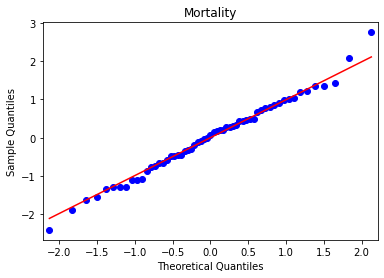

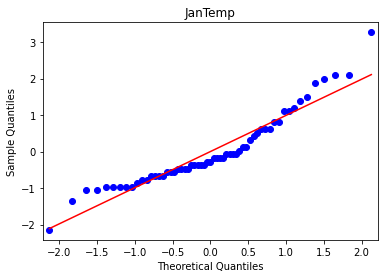

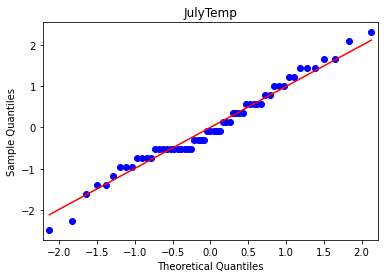

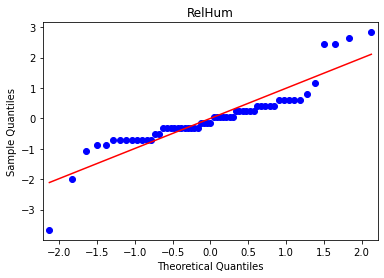

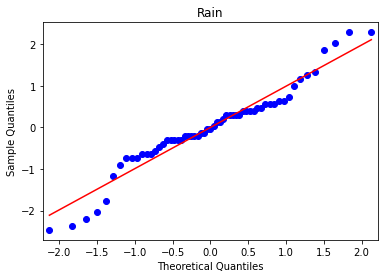

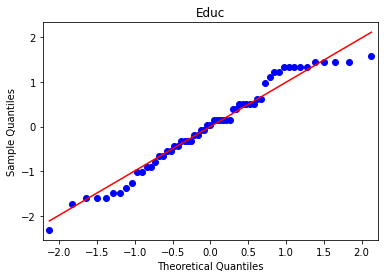

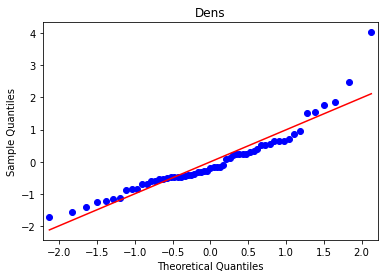

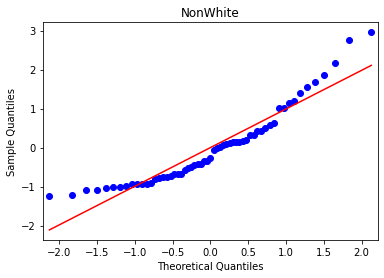

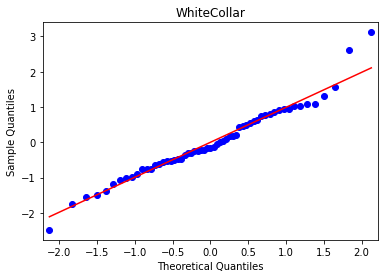

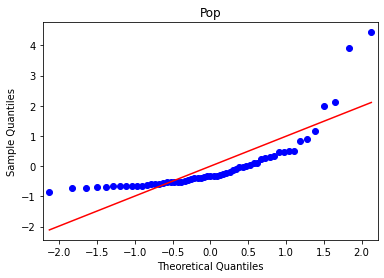

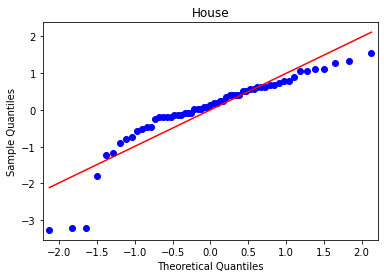

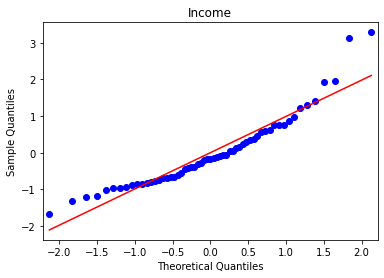

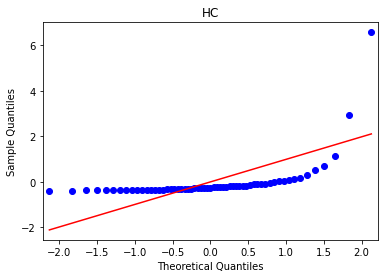

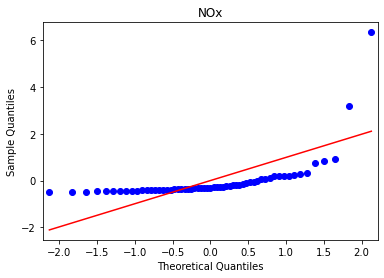

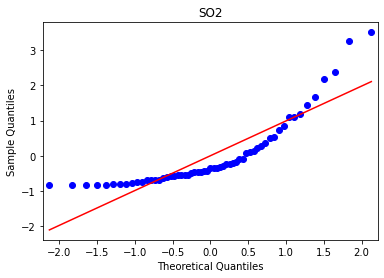

In [464]:
import statsmodels.api as sm
import matplotlib.pylab as plt
columns = df2.columns.values 
for i in range(len(columns)):
    sm.qqplot(df2.iloc[:,i].values, line='s')
    plt.title(columns[i])
    plt.show()

In [463]:
df2.columns.values

array(['Mortality', 'JanTemp', 'JulyTemp', 'RelHum', 'Rain', 'Educ',
       'Dens', 'NonWhite', 'WhiteCollar', 'Pop', 'House', 'Income', 'HC',
       'NOx', 'SO2'], dtype=object)

In [5]:
import zipfile
import numpy as np

In [6]:
with zipfile.ZipFile("Module1/release_statsreview_release.zip") as zip_file:
    golub_data, golub_classnames = ( np.genfromtxt(zip_file.open('data_and materials/golub_data/{}'.format(fname)), delimiter=',', names=True, converters={0: lambda s: int(s.strip(b'"'))}) for fname in ['golub.csv', 'golub_cl.csv'] )

In [7]:
golub_data.shape, len(golub_data[0])

((3051,), 39)

In [8]:
golub_data[0]

(1., -1.45769, -1.3942, -1.42779, -1.40715, -1.42668, -1.21719, -1.37386, -1.36832, -1.47649, -1.21583, -1.28137, -1.03209, -1.36149, -1.39979, 0.17628, -1.40095, -1.56783, -1.20466, -1.24482, -1.60767, -1.06221, -1.12665, -1.20963, -1.48332, -1.25268, -1.27619, -1.23051, -1.43337, -1.08902, -1.29865, -1.26183, -1.44434, 1.10147, -1.34158, -1.22961, -0.75919, 0.84905, -0.66465)

In [9]:
golub_classnames

array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 0.), ( 6., 0.),
       ( 7., 0.), ( 8., 0.), ( 9., 0.), (10., 0.), (11., 0.), (12., 0.),
       (13., 0.), (14., 0.), (15., 0.), (16., 0.), (17., 0.), (18., 0.),
       (19., 0.), (20., 0.), (21., 0.), (22., 0.), (23., 0.), (24., 0.),
       (25., 0.), (26., 0.), (27., 0.), (28., 1.), (29., 1.), (30., 1.),
       (31., 1.), (32., 1.), (33., 1.), (34., 1.), (35., 1.), (36., 1.),
       (37., 1.), (38., 1.)], dtype=[('f0', '<f8'), ('x', '<f8')])

In [10]:
ALL = range(len(golub_classnames))
AML = list(filter(lambda i: golub_classnames[i][1] == 1, range(len(golub_classnames))))
#AML = [i+1 for i in range(len(golub_classnames)) if golub_classnames[i][1] == 1]

In [11]:
AML, len(ALL), len(AML)

([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37], 38, 11)

In [12]:
X_ALL = np.zeros((golub_data.shape[0], len(golub_data[0])-1))
for i in range(golub_data.shape[0]):
    X_ALL[i] = list(golub_data[i])[1:]

In [13]:
CLASSES = [int(x[1]) for x in golub_classnames]
len(CLASSES)

38

In [16]:
ttest_ind(CLASSES,X_ALL).pvalue

array([0.07486881, 0.07486916, 0.07486876, 0.07486882, 0.07486862,
       0.07486967, 0.07486875, 0.07486854, 0.07486846, 0.07486918,
       0.07486865, 0.07486904, 0.07486906, 0.07486934, 0.07486887,
       0.0748693 , 0.07486885, 0.07486853, 0.07486903, 0.07486928,
       0.07486885, 0.07486899, 0.0748689 , 0.07486885, 0.07486832,
       0.07486879, 0.07486874, 0.07486862, 0.07486899, 0.07486898,
       0.07486895, 0.07486946, 0.07486929, 0.07486924, 0.07486845,
       0.07486886, 0.07486901, 0.07486896])

In [17]:
X_ALL[0]

array([-1.45769, -1.3942 , -1.42779, -1.40715, -1.42668, -1.21719,
       -1.37386, -1.36832, -1.47649, -1.21583, -1.28137, -1.03209,
       -1.36149, -1.39979,  0.17628, -1.40095, -1.56783, -1.20466,
       -1.24482, -1.60767, -1.06221, -1.12665, -1.20963, -1.48332,
       -1.25268, -1.27619, -1.23051, -1.43337, -1.08902, -1.29865,
       -1.26183, -1.44434,  1.10147, -1.34158, -1.22961, -0.75919,
        0.84905, -0.66465])

In [18]:
ALL = list(set(ALL) - set(AML))
ALL

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [19]:
X_AML = X_ALL[:,AML]

In [20]:
X_ALL = X_ALL[:,ALL]

In [21]:
X_ALL.shape, X_AML.shape

((3051, 27), (3051, 11))

In [22]:
N_ALL, N_AML = len(ALL), len(AML)
N_ALL, N_AML

(27, 11)

In [23]:
s2_ALL, s2_AML = X_ALL.var(axis=1, ddof=1), X_AML.var(axis=1, ddof=1)
s2_ALL.shape, s2_AML.shape

((3051,), (3051,))

In [24]:
Xbar_ALL, Xbar_AML = X_ALL.mean(axis=1), X_AML.mean(axis=1)

In [25]:
t_stat = (Xbar_ALL - Xbar_AML) / np.sqrt(s2_ALL / N_ALL + s2_AML / N_AML)
t_stat

array([-1.75919522, -0.90985764,  0.09802592, ..., -1.84252929,
       -0.10468791, -3.29258255])

In [26]:
t_stats, pvals = [], []
for i in range(len(X_ALL)):
    res = ttest_ind(X_ALL[i], X_AML[i], equal_var = False)
    t_stats.append(res.statistic)
    pvals.append(res.pvalue)
np.array(t_stats), np.array(pvals)

(array([-1.75919522, -0.90985764,  0.09802592, ..., -1.84252929,
        -0.10468791, -3.29258255]),
 array([0.10616891, 0.38009143, 0.92321112, ..., 0.07937277, 0.91749659,
        0.00626195]))

In [35]:
?ttest_ind

In [27]:
np.sum(np.array(pvals) <= 0.05)

1078

In [28]:
Xbar_ALL[0], s2_ALL[0], Xbar_AML[0], s2_AML[0], N_ALL, N_AML

(-1.2715103703703707,
 0.1038801499883191,
 -0.7792472727272727,
 0.8189878282218181,
 27,
 11)

In [29]:
ttest_ind_from_stats(mean1=Xbar_ALL[0], std1=np.sqrt(s2_ALL[0]), nobs1=N_ALL, \
                               mean2=Xbar_AML[0], std2=np.sqrt(s2_AML[0]), nobs2=N_AML, \
                               equal_var=False)

Ttest_indResult(statistic=-1.7591952215453823, pvalue=0.10616891437993167)

In [30]:
dof = (s2_ALL / N_ALL + s2_AML / N_AML)**2 / ((s2_ALL/N_ALL)**2 / (N_ALL-1) + (s2_AML/N_AML)**2 / (N_AML-1))
dof = dof.astype(int)

In [31]:
pvals = 2*(1 - t.cdf(np.abs(t_stat), dof))

In [32]:
pvals[-10:]

array([9.38958767e-01, 2.16001787e-01, 8.11473791e-01, 5.01064642e-01,
       4.07618332e-07, 9.67462330e-01, 7.53702862e-01, 7.95624334e-02,
       9.17531049e-01, 6.42848247e-03])

In [33]:
np.sum(np.array(pvals) <= 0.05)

1075

In [34]:
import matplotlib.pylab as plt

(array([1332.,  346.,  234.,  196.,  169.,  180.,  161.,  144.,  137.,
         152.]),
 array([3.89333010e-12, 9.99839996e-02, 1.99967999e-01, 2.99951999e-01,
        3.99935998e-01, 4.99919998e-01, 5.99903998e-01, 6.99887997e-01,
        7.99871997e-01, 8.99855996e-01, 9.99839996e-01]),
 <BarContainer object of 10 artists>)

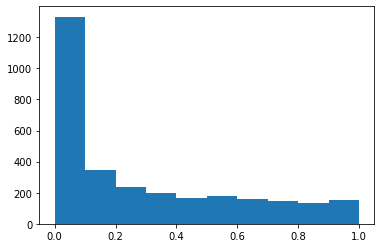

In [35]:
plt.hist(pvals)

In [36]:
pvals = []
for i in range(X_ALL.shape[0]):
    g_ALL, g_AML = X_ALL[i], X_AML[i]
    Xbar_ALL, Xbar_AML = g_ALL.mean(), g_AML.mean()
    s2_ALL, s2_AML = g_ALL.var(ddof=1), g_AML.var(ddof=1)
    t_stat = (Xbar_ALL - Xbar_AML) / np.sqrt(s2_ALL / N_ALL + s2_AML / N_AML)
    dof = (s2_ALL / N_ALL + s2_AML / N_AML)**2 / ((s2_ALL/N_ALL)**2 / (N_ALL-1) + (s2_AML/N_AML)**2 / (N_AML-1))
    pval = 2*(1 - t.cdf(abs(t_stat), dof)) #t.sf(np.abs(t_stat), dof)*2 # #int(dof))
    pvals.append(pval)
pvals = np.array(pvals)

In [37]:
X_ALL[0]

array([-1.45769, -1.3942 , -1.42779, -1.40715, -1.42668, -1.21719,
       -1.37386, -1.36832, -1.47649, -1.21583, -1.28137, -1.03209,
       -1.36149, -1.39979,  0.17628, -1.40095, -1.56783, -1.20466,
       -1.24482, -1.60767, -1.06221, -1.12665, -1.20963, -1.48332,
       -1.25268, -1.27619, -1.23051])

In [38]:
np.sum(pvals <= 0.05)

1078

In [97]:
np.random.seed(123)
alpha = 0.05
m = 100
raw_pvals = np.random.beta(1, 10, m)
significant = np.sum(raw_pvals < alpha)
significant

46

In [98]:
alpha_corrected = alpha / m
significant_bonferroni = np.sum(raw_pvals < alpha_corrected)
alpha_corrected, significant_bonferroni

(0.0005, 2)

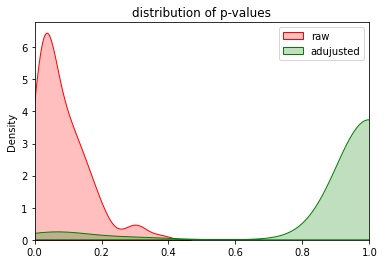

In [113]:
import seaborn as sns
#plt.hist([raw_pvals, p_adjusted], label=['raw', 'nonferroni'])
sns.kdeplot(raw_pvals, color="red", shade=True, label='raw') #, cut=0)
ax = sns.kdeplot(p_adjusted, color="green", shade=True, label='adujusted') #, cut=1)
ax.set(xlim=(0, 1))
#ax.set(xlim=(0, 1))
plt.title('distribution of p-values')
plt.legend()
plt.show()
#plt.title('distribution of adjusted p-values')

In [108]:
from statsmodels.stats.multitest import multipletests
rejected, p_adjusted, _, alpha = multipletests(raw_pvals, alpha=alpha, method='bonferroni', is_sorted=False, returnsorted=False)
np.sum(rejected), alpha

(2, 0.0005)

In [39]:
0.05 / X_ALL.shape[0]

1.6388069485414618e-05

In [40]:
from statsmodels.stats.multitest import multipletests
rejected, pvalues, _, alpha = multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
np.sum(rejected), pvalues, alpha

(103, array([1., 1., 1., ..., 1., 1., 1.]), 1.6388069485414618e-05)

In [1028]:
r, p, _, alpha = multipletests(pvals, alpha=0.05, method='holm', is_sorted=False, returnsorted=False)
np.sum(r)

103

In [1029]:
r, p, _, alpha = multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
np.sum(r)

695

In [973]:
ttest_ind(X_ALL[0], X_AML[0], equal_var=False)

Ttest_indResult(statistic=-1.2100785695156162, pvalue=0.24856339993655047)

In [723]:
pvals[:10]

array([0.2485634 , 0.53320677, 0.94453232, 0.78475768, 0.29713466,
       0.33369001, 0.51141578, 0.62790726, 0.9875763 , 0.9001528 ])

In [724]:
len(pvals)

3051

In [725]:
sum([1 for p in pvals if p <= 0.05])

721

In [726]:
?ttest_1samp 

In [727]:
np.sum(pvals <= 0.05 / X_ALL.shape[0])

18

In [728]:
N_ALL

38

In [977]:
# Benjamini–Hochberg procedure
pvals.sort(key=lambda x: x)

for i, x in enumerate(pvals):
    if x >= (i + 1) / len(pvals) * 0.05:
        break
len(pvals[:i])

245

In [971]:
i = np.argsort(pvals) + 1
alphavals = (i / X.shape[0]) * 0.05
alphavals

array([1.062 , 0.448 , 0.3515, ..., 1.042 , 0.4215, 0.413 ])

In [972]:
np.sum(pvals <= alphavals)

2371

In [731]:
?t.sf

In [691]:
t_stat = 2.25

In [696]:
2*(1 - t.cdf(abs(t_stat), 15))

0.03988800677091664

In [697]:
2*(t.cdf(-abs(t_stat), 15))

0.03988800677091648

In [694]:
dof

14.243665511810454

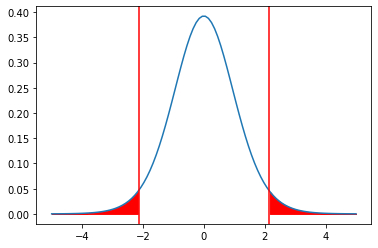

In [709]:
x = np.linspace(-5,5,100)
plt.plot(x, t.pdf(x,15))
plt.axvline(t.ppf(0.025, 15), color='r')
plt.axvline(t.ppf(0.975, 15), color='r')
plt.fill_between(x[x<t.ppf(0.025, 15)],t.pdf(x,15)[x<t.ppf(0.025, 15)], color='red')
plt.fill_between(x[x>t.ppf(0.975, 15)],t.pdf(x,15)[x>t.ppf(0.975, 15)], color='red')

In [821]:
from sklearn.datasets import make_multilabel_classification
import numpy.random as random
random.seed(123)
X, y = make_multilabel_classification(n_classes=4, n_labels=2,
                                      allow_unlabeled=False,
                                      random_state=1)

In [822]:
X.shape, y.shape

((100, 20), (100, 4))

In [823]:
y[0:2]

array([[0, 1, 0, 1],
       [1, 0, 0, 1]])

In [824]:
import time
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

classifier = LabelPowerset(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

start=time.time()
classifier.fit(X, y)
print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  0.0 seconds


In [776]:
X[2], y[2]

(array([1., 5., 2., 4., 5., 0., 2., 2., 2., 3., 6., 3., 4., 1., 2., 3., 2.,
        6., 2., 2.]),
 array([0, 1, 0, 1, 0, 0, 0, 1]))

In [779]:
classifier.classifier.predict_proba(X[2].reshape(1,-1))

array([[0.03, 0.01, 0.67, 0.07, 0.02, 0.01, 0.  , 0.01, 0.03, 0.  , 0.  ,
        0.05, 0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.  , 0.01, 0.01, 0.  ,
        0.01, 0.  , 0.01, 0.02, 0.  , 0.  ]])

In [817]:
classifier._label_count, classifier.unique_combinations_, len(classifier.unique_combinations_)

(8,
 {'1': 0,
  '7': 1,
  '1,3,7': 2,
  '0,6': 3,
  '3': 4,
  '0': 5,
  '6': 6,
  '0,1,7': 7,
  '1,4,7': 8,
  '0,4': 9,
  '4': 10,
  '1,3,4,7': 11,
  '1,6': 12,
  '0,5': 13,
  '1,3': 14,
  '3,4': 15,
  '1,4': 16,
  '1,7': 17,
  '0,1': 18,
  '0,1,3': 19,
  '1,3,5': 20,
  '3,6,7': 21,
  '5,7': 22,
  '0,3': 23,
  '1,6,7': 24,
  '0,6,7': 25,
  '3,5': 26,
  '3,7': 27},
 28)

In [819]:
from scipy import sparse

def get_OR_prob(X, classes=None):
    lp_prediction = classifier.classifier.predict_proba(X.reshape(1,-1))[0]
    for combination_id in range(len(lp_prediction)):
        if sorted(classes) == sorted(classifier.reverse_combinations_[combination_id]):
            return lp_prediction[combination_id]
    return 0
        
get_OR_prob(X[2], [0,6])
get_OR_prob(X[2], [0,1,6])

0

In [830]:
classifier.unique_combinations_

{'1,3': 0,
 '0,3': 1,
 '0,1': 2,
 '0,1,3': 3,
 '1': 4,
 '3': 5,
 '0,1,2,3': 6,
 '0': 7}

In [829]:
pred = classifier.classifier.predict_proba(X[2].reshape(1,-1))[0]
for i in range(len(classifier.unique_combinations_)):
    print(classifier.reverse_combinations_[i], pred[i])

[1, 3] 0.05
[0, 3] 0.04
[0, 1] 0.67
[0, 1, 3] 0.07
[1] 0.04
[3] 0.01
[0, 1, 2, 3] 0.05
[0] 0.07


In [801]:
from scipy import sparse
lp_prediction = classifier.classifier.predict_proba(X[2].reshape(1,-1))
result = sparse.lil_matrix((X[2].reshape(1,-1).shape[0], classifier._label_count), dtype='float')
print(result.shape)
for row in range(len(lp_prediction)):
    assignment = lp_prediction[row]
    print(len(assignment))
    for combination_id in range(len(assignment)):
        for label in classifier.reverse_combinations_[combination_id]:
            print(label, combination_id, assignment[combination_id])
            result[row, label] += assignment[combination_id]

(1, 8)
28
1 0 0.03
7 1 0.01
1 2 0.67
3 2 0.67
7 2 0.67
0 3 0.07
6 3 0.07
3 4 0.02
0 5 0.01
6 6 0.0
0 7 0.01
1 7 0.01
7 7 0.01
1 8 0.03
4 8 0.03
7 8 0.03
0 9 0.0
4 9 0.0
4 10 0.0
1 11 0.05
3 11 0.05
4 11 0.05
7 11 0.05
1 12 0.0
6 12 0.0
0 13 0.0
5 13 0.0
1 14 0.01
3 14 0.01
3 15 0.0
4 15 0.0
1 16 0.02
4 16 0.02
1 17 0.01
7 17 0.01
0 18 0.0
1 18 0.0
0 19 0.01
1 19 0.01
3 19 0.01
1 20 0.01
3 20 0.01
5 20 0.01
3 21 0.0
6 21 0.0
7 21 0.0
5 22 0.01
7 22 0.01
0 23 0.0
3 23 0.0
1 24 0.01
6 24 0.01
7 24 0.01
0 25 0.02
6 25 0.02
7 25 0.02
3 26 0.0
5 26 0.0
3 27 0.0
7 27 0.0


In [793]:
result.toarray()

array([[0.12, 0.86, 0.  , 0.77, 0.1 , 0.02, 0.1 , 0.82]])

In [825]:
classifier.predict_proba(X[2].reshape(1,-1)).toarray()

array([[0.9 , 0.88, 0.05, 0.22]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelO

classifier = RakelO(
    base_classifier=GaussianNB(),
    base_classifier_require_dense=[True, True],
    labelset_size=y.shape[1] // 4,
    #model_count_=6
)

classifier.fit(X, y)
prediction = classifier.predict(X, y)

In [831]:
from netCDF4 import Dataset
import numpy as np

In [836]:
fh = Dataset('wind_speed_data.nc', mode='r')
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
#tmax = fh.variables['Tmax'][:]
#tmax_units = fh.variables['Tmax'].units
fh.close()

In [ ]:
#conda install basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

In [1030]:
import pandas as pd

data = {'Category': ['cat3','cat2','cat1','cat2','cat1','cat2','cat1','cat2','cat1','cat1','cat1','cat2','cat3','cat3'],
        'values': [4,1,2,3,1,2,3,1,2,3,5,1,6,3]}
my_data = pd.DataFrame(data)
my_data

Category  values
0      cat3       4
1      cat2       1
2      cat1       2
3      cat2       3
4      cat1       1
5      cat2       2
6      cat1       3
7      cat2       1
8      cat1       2
9      cat1       3
10     cat1       5
11     cat2       1
12     cat3       6
13     cat3       3

In [1031]:
from scipy import stats

cat1 = my_data.loc[my_data['Category'] == 'cat1', 'values']
cat2 = my_data.loc[my_data['Category'] == 'cat2', 'values']
cat3 = my_data.loc[my_data['Category'] == 'cat3', 'values']

print(stats.ttest_ind(cat1,cat2).pvalue)
print(stats.ttest_ind(cat2,cat3).pvalue)
print(stats.ttest_ind(cat1,cat3).pvalue)

0.16970867501294376
0.0170622126550303
0.13951958313684434


In [6]:
import numpy as np
X = np.array([[8,4,7],[2,8,1],[3,1,1],[9,7,4]])
X.T@(np.eye(4)-np.outer(np.ones(4),np.ones(4))/4)@X/4

array([[9.25  , 1.    , 6.375 ],
       [1.    , 7.5   , 0.    ],
       [6.375 , 0.    , 6.1875]])

In [4]:
np.outer(np.ones(4), np.ones(4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [7]:
(np.eye(3)-np.outer(np.ones(3),np.ones(3))/3)@np.array([2,-1,-2])

array([ 2.33333333, -0.66666667, -1.66666667])

In [9]:
(np.eye(3)-np.outer(np.ones(3),np.ones(3))/3)@(np.eye(3)-np.outer(np.ones(3),np.ones(3))/3)@np.array([2,-1,-2])

array([ 2.33333333, -0.66666667, -1.66666667])

In [114]:
u = np.array([1,2])/np.sqrt(5)
x1 = np.array([1,2])
x2 = np.array([3,4])
x3 = np.array([-1,0])

In [117]:
(u@x1)*u

array([1., 2.])

In [118]:
(u@x2)*u

array([2.2, 4.4])

In [119]:
(u@x3)*u

array([-0.2, -0.4])

In [130]:
[u@x1, u@x2, u@x3]

[2.23606797749979, 4.919349550499537, -0.4472135954999579]

In [131]:
np.var([u@x1, u@x2, u@x3]) #, ddof=1)

4.8

In [128]:
X = np.array([x1, x2, x3])
print(X.shape)
n = 3
S = X.T@(np.eye(n)-np.outer(np.ones(n),np.ones(n))/n)@X/n
S

(3, 2)


array([[2.66666667, 2.66666667],
       [2.66666667, 2.66666667]])

In [129]:
u.T@S@u

4.800000000000001

In [137]:
X=np.array([[0,1],[0,-1]])
X.T@X/2

array([[0., 0.],
       [0., 1.]])

In [139]:
np.linalg.eig(X.T@X/2)

(array([0., 1.]),
 array([[1., 0.],
        [0., 1.]]))

In [143]:
X=np.array([[1,1/2],[-1,-1/2]])
print(X.T@X/2)
np.linalg.eig(X.T@X/2)

[[1.   0.5 ]
 [0.5  0.25]]


(array([1.25, 0.  ]),
 array([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))

In [145]:
np.array([2/np.sqrt(5),1/np.sqrt(5)])@np.array([1,1/2])

1.118033988749895

In [146]:
np.array([2/np.sqrt(5),1/np.sqrt(5)])@np.array([-1,-1/2])

-1.118033988749895

In [148]:
n = 3
X=np.array([[0,2],[1,-1],[-1,-1]])
print(X.T@X/n)
np.linalg.eig(X.T@X/n)

[[0.66666667 0.        ]
 [0.         2.        ]]


(array([0.66666667, 2.        ]),
 array([[1., 0.],
        [0., 1.]]))

In [149]:
np.array([0,1])@np.array([0,2])

2

In [150]:
np.array([0,1])@np.array([1,-1])

-1

In [151]:
np.array([0,1])@np.array([-1,-1])

-1

In [152]:
np.var([2,-1,-1])

2.0

In [153]:
n = 4
X=np.array([[0,2],[0,-2],[1,1],[-1,-1]])
print(X.T@X/n)
np.linalg.eig(X.T@X/n)

[[0.5 0.5]
 [0.5 2.5]]


(array([0.38196601, 2.61803399]),
 array([[-0.97324899, -0.22975292],
        [ 0.22975292, -0.97324899]]))

In [156]:
X=np.array([[1,1],[1,-1],[-1,1]])
B = X@X.T
print(B)
e, v = np.linalg.eig(B)

[[ 2  0  0]
 [ 0  2 -2]
 [ 0 -2  2]]


In [157]:
e

array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00])

In [158]:
v

array([[ 0.        ,  0.        ,  1.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ]])

In [160]:
v[:,0]*e[0]**(1/2)

array([ 0.        , -1.41421356,  1.41421356])

In [162]:
e = np.exp(1)
np.sqrt((e-1)/(4-e))

1.157846341842083

In [163]:
1/(1+0.1*0.95/(0.99*0.05))

0.342560553633218

In [169]:
import numpy as np
#from scipy.stats import chisqprob

from scipy.stats import chi2

L1 = 467400. # log(likelihood) of my 1st fit
L2 = 467414. # log(likelihood) of my 2nd fit
LR = -2. * np.log(L2 / L1) # LR = -5.9905e-05
p = 1 - chi2(1).cdf(abs(LR)) # L2 has 1 DoF more than L1
p

#print ('p: %.30f' % p) # p = 1.000000000000000000000000000000
#five_sigma = 1 - scipy.special.erf(5 / np.sqrt(2.))
#print ('5 sigma: %.30f' % five_sigma)
#five_sigma_check = 1 - 0.999999426696856
#print ('Check  : %.30f' % five_sigma_check) 

0.9938245709701299

In [170]:
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))
LR = likelihood_ratio(L1,L2)
p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1
p

1.2131545083660726e-07

In [171]:
LR

28.0

In [177]:
ll_NULL, ll_ALT = 467400, 467414 
Λ = -2 * (ll_NULL - ll_ALT)
print(Λ)
df = 1
p = 1 - chi2(df).cdf(Λ)
print(p)

28
1.2131545079618888e-07


Text(0.5, 1.0, 'χ2(1) distribution')

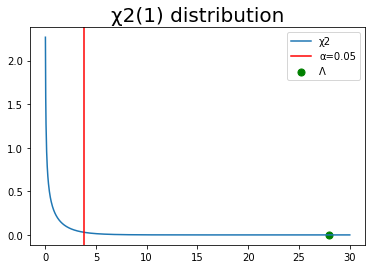

In [191]:
x = np.linspace(0, 30, 1000)
plt.plot(x, chi2(1).pdf(x), label='χ2')
plt.axvline(chi2(1).ppf(0.95), color='red', label='α=0.05')
plt.scatter(Λ, 0, color='green', s=50, label='Λ')
plt.legend()
plt.title('χ2(1) distribution', size=20)

In [127]:
28/10**5

0.00028

In [129]:
hypergeom.cdf(56, 40000, 20000, 198)

3.8174397406840334e-10

In [131]:
31000 - 39, 31000 - 63 

(30961, 30937)

In [133]:
fisher_exact([[56, 142],[20000 - 56, 20000 - 142]],'less') 

(0.39266566103399375, 3.817439740833869e-10)

In [163]:
X_raw = np.load('Module2/release_gene_analysis_data/data/p1/X.npy')

In [164]:
X_raw.shape

(511, 45768)

In [165]:
X_raw[:,0].max()

11.941397591320595

In [166]:
X = np.log2(X_raw+1)
X[:,0].max()

3.6939215228197613

In [167]:
np.log2(11.941397591320595+1)

3.6939215228197613

In [180]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.38875649e-01 6.88233223e-02 3.04288645e-02 1.35375462e-02
 1.24104080e-02 6.82649523e-03 5.79698991e-03 4.85573318e-03
 4.62977866e-03 4.05960629e-03 3.50371218e-03 3.45370661e-03
 3.28040329e-03 3.26607956e-03 3.23886576e-03 3.18921048e-03
 3.16091617e-03 3.11761684e-03 3.09983617e-03 3.09465588e-03
 3.07812497e-03 3.06924163e-03 3.04944146e-03 3.04469017e-03
 3.01652111e-03 2.98545928e-03 2.97408204e-03 2.95759010e-03
 2.94639858e-03 2.92966374e-03 2.90866024e-03 2.88597408e-03
 2.88149929e-03 2.86697955e-03 2.85238299e-03 2.84981429e-03
 2.83528346e-03 2.82552454e-03 2.80261803e-03 2.79568458e-03
 2.77750846e-03 2.76953625e-03 2.75886685e-03 2.74072501e-03
 2.72450682e-03 2.71322970e-03 2.69461687e-03 2.68815121e-03
 2.68550936e-03 2.66237420e-03 2.63724262e-03 2.62441058e-03
 2.61040133e-03 2.59548687e-03 2.59173541e-03 2.58323448e-03
 2.56464377e-03 2.55921156e-03 2.53941617e-03 2.51714840e-03
 2.50399063e-03 2.46212408e-03 2.43930631e-03 2.36836923e-03
 2.33027766e-03 2.318695

In [170]:
pca.fit(X_raw)
print(pca.explained_variance_ratio_)

[4.27796710e-01 1.48040078e-01 5.78552791e-02 4.29488464e-02
 2.41103446e-02 1.67119043e-02 1.40945276e-02 1.11490516e-02
 9.60091768e-03 7.09494192e-03 6.30010596e-03 5.90574140e-03
 5.13572366e-03 4.92603796e-03 4.41136289e-03 4.32671394e-03
 3.89989822e-03 3.71033452e-03 3.60068050e-03 3.54081091e-03
 3.42199334e-03 3.35463685e-03 3.17405551e-03 3.05032902e-03
 2.97622831e-03 2.93527482e-03 2.82605799e-03 2.79769007e-03
 2.73711935e-03 2.69319226e-03 2.64596810e-03 2.54302079e-03
 2.48400779e-03 2.47496737e-03 2.42625658e-03 2.39344736e-03
 2.35696231e-03 2.32243252e-03 2.21031106e-03 2.20558267e-03
 2.14350108e-03 2.11456231e-03 2.09048439e-03 2.05194878e-03
 1.99865782e-03 1.97538113e-03 1.95602037e-03 1.93390903e-03
 1.87260669e-03 1.83932385e-03 1.81468906e-03 1.76560678e-03
 1.74764183e-03 1.71363315e-03 1.66852452e-03 1.62712694e-03
 1.59082077e-03 1.55281771e-03 1.46744595e-03 1.46049237e-03
 1.44329474e-03 1.40694741e-03 1.39787317e-03 1.35830712e-03
 1.34054914e-03 1.295735

In [181]:
vars = np.cumsum(pca.explained_variance_ratio_)
indices = np.where(vars > 0.85)
print(indices[0][0])
vars[indices[0][0]-1:indices[0][0]+1]

338


array([0.84916061, 0.85025133])

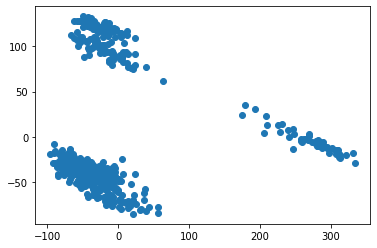

In [183]:
X_new = pca.fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1])

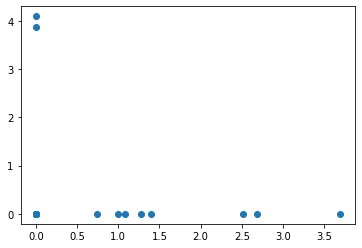

In [184]:
plt.scatter(X[:,0], X[:,1])

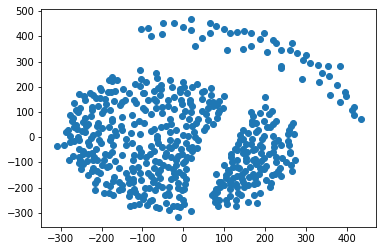

In [186]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X)
plt.scatter(X_transformed[:,0], X_transformed[:,1])

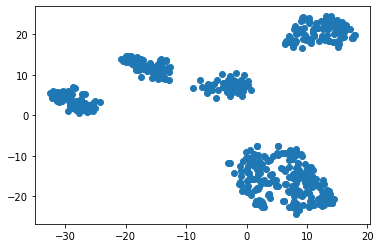

In [191]:
from sklearn.manifold import TSNE
top50 = PCA(n_components=50).fit_transform(X)
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(top50)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [193]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5, random_state=0).fit(top50)
kmeans.labels_

array([4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 0, 4, 0, 0,
       4, 0, 4, 0, 4, 0, 4, 3, 3, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 4, 4, 4, 4, 4, 3,
       3, 0, 4, 1, 4, 0, 3, 3, 1, 1, 1, 1, 1, 0, 0, 0, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 0, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,

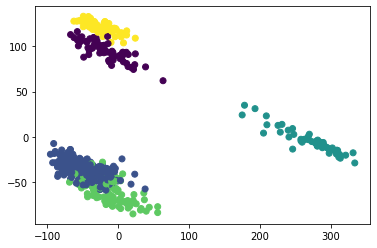

In [197]:
X_new = PCA(2).fit_transform(top50)
plt.scatter(X_new[:,0], X_new[:,1], c=kmeans.labels_)

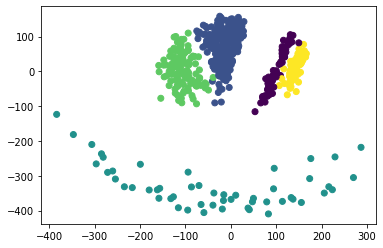

In [199]:
X_transformed = embedding.fit_transform(top50)
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=kmeans.labels_)

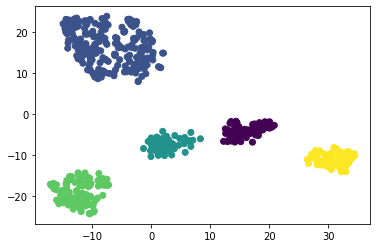

In [201]:
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(top50)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_)

In [205]:
WGSS = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(top50)
    WGSS.append(kmeans.inertia_)
WGSS

[9477310.874677764,
 7214382.76390358,
 6159413.283472862,
 5758124.002421291,
 5517411.955094504,
 5363847.627580493,
 5193425.697029565,
 5094680.406038778]

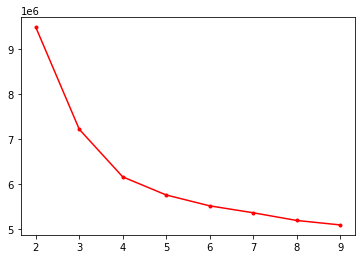

In [207]:
plt.plot(range(2,10), WGSS, 'r.-')

In [211]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
#dir(kmeans)

In [216]:
X_new = PCA(2).fit_transform(kmeans.cluster_centers_)
X_transformed = embedding.fit_transform(kmeans.cluster_centers_)
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(kmeans.cluster_centers_)

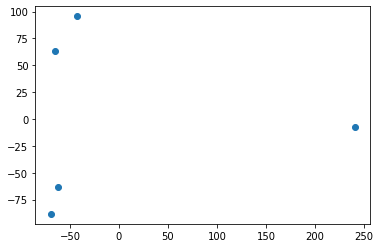

In [217]:
plt.scatter(X_new[:, 0], X_new[:,1])

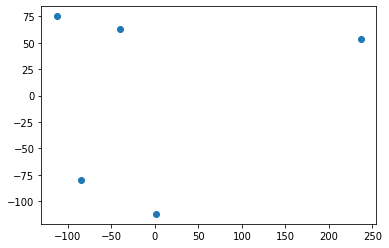

In [218]:
plt.scatter(X_transformed[:, 0], X_transformed[:,1])

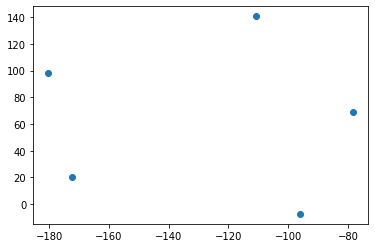

In [219]:
plt.scatter(X_embedded[:, 0], X_embedded[:,1])

In [220]:
X_new = PCA(2).fit_transform(X_raw)
X_transformed = embedding.fit_transform(X_raw)
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(X_raw)

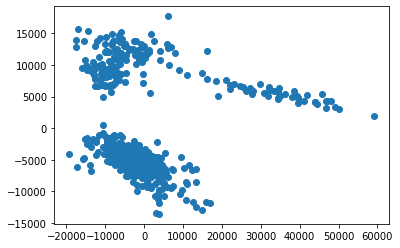

In [221]:
plt.scatter(X_new[:, 0], X_new[:,1])

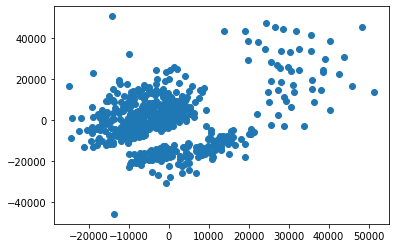

In [222]:
plt.scatter(X_transformed[:, 0], X_transformed[:,1])

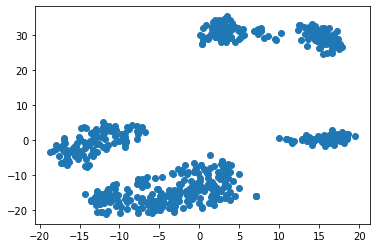

In [223]:
plt.scatter(X_embedded[:, 0], X_embedded[:,1])

In [2]:
import numpy as np
import matplotlib.pylab as plt
X_raw = np.load('Module2/release_gene_analysis_data/data/p2_unsupervised/X.npy')
X = np.log2(X_raw + 1)

In [3]:
X.shape

(2169, 45768)

In [4]:
X[:,0].max()

5.972169178513185

[0.15494937 0.04430162]


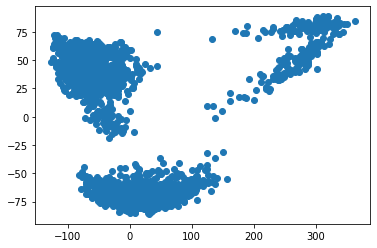

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_new = pca.fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1])

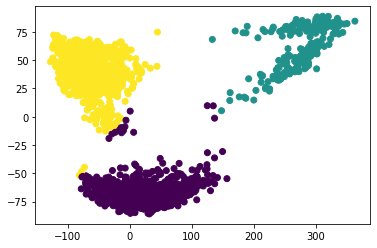

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1).fit(X_new)
plt.scatter(X_new[:,0], X_new[:,1], c=kmeans.labels_)

In [13]:
kmeans.cluster_centers_

array([[ 13.10328119, -65.98647892],
       [274.13043206,  60.89211323],
       [-65.20039517,  40.86384137]])

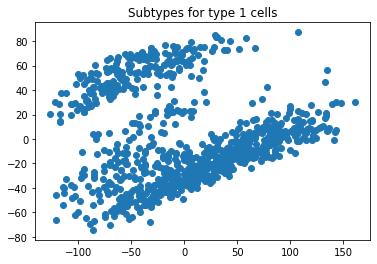

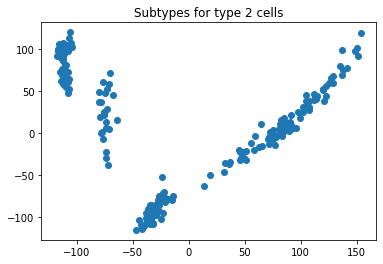

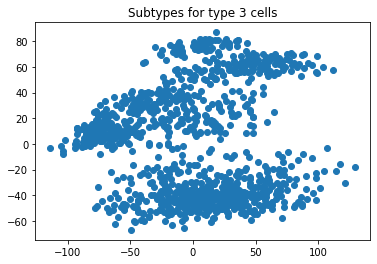

In [19]:
pca = PCA(n_components=2)
for i in range(3):
    X_sub = X[kmeans.labels_==i]
    X_sub_new = pca.fit_transform(X_sub)
    plt.scatter(X_sub_new[:,0], X_sub_new[:,1])
    plt.title('Subtypes for type {} cells'.format(i+1))
    plt.show()

[0.15494937 0.19925099 0.2168146  0.22817342 0.23721675 0.24603829
 0.25313216 0.25951882 0.26556845 0.27140577]


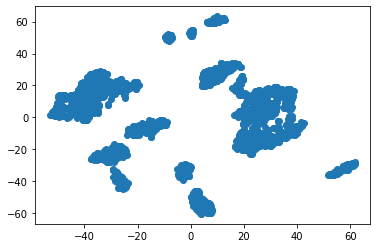

In [6]:
k = 10
pca = PCA(n_components=k)
topk = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))
X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(topk)
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) # topk
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

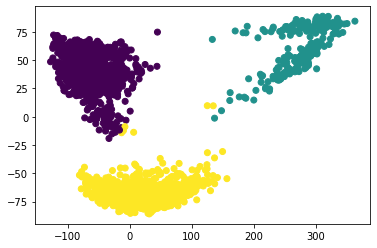

In [36]:
plt.scatter(X_new[:,0], X_new[:,1], c=kmeans.labels_)

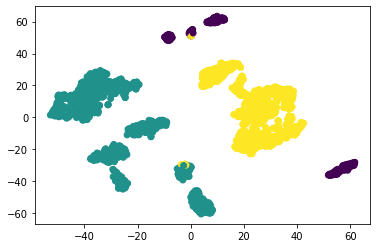

In [9]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans.labels_)

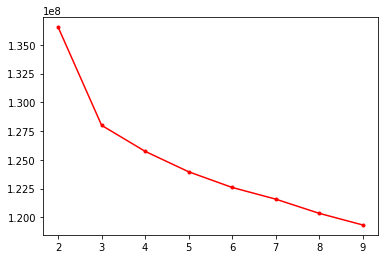

In [22]:
WGSS = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X) #(topk)
    WGSS.append(kmeans.inertia_)
WGSS
plt.plot(range(2,10), WGSS, 'r.-')

In [37]:
from sklearn.linear_model import LogisticRegressionCV
y = kmeans.labels_
clf = LogisticRegressionCV(cv=5, Cs=[1, 10], solver='liblinear', random_state=0).fit(X, y) #
clf.score(X, y)

1.0

In [38]:
clf.classes_

array([0, 1, 2])

In [40]:
dir(clf)

['C_',
 'Cs',
 'Cs_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'class_weight',
 'classes_',
 'coef_',
 'coefs_paths_',
 'cv',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'l1_ratio_',
 'l1_ratios',
 'l1_ratios_',
 'max_iter',
 'multi_class',
 'n_features_in_',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 '

In [41]:
clf.get_params()

{'Cs': [1, 10],
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'refit': True,
 'scoring': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

In [39]:
clf.scores_ #clf.classes_

{0: array([[1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [0.98845266, 0.98845266]]),
 1: array([[0.97465438, 0.97465438],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [0.99769053, 0.99769053]]),
 2: array([[1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [1.        , 1.        ],
        [0.98614319, 0.98614319]])}

In [42]:
clf.C_

array([1, 1, 1])

In [87]:
np.sum(np.argmax(clf.predict_proba(X), axis=1) == y) / len(y)

1.0

In [88]:
clf.coef_.shape

(3, 45768)

In [45]:
def get_data():
    X_train = np.load('Module2/release_gene_analysis_data/data/p2_evaluation/X_train.npy')
    X_train = np.log2(X_train + 1)
    y_train = np.load('Module2/release_gene_analysis_data/data/p2_evaluation/y_train.npy')
    X_test = np.load('Module2/release_gene_analysis_data/data/p2_evaluation/X_test.npy')
    X_test = np.log2(X_test + 1)
    y_test = np.load('Module2/release_gene_analysis_data/data/p2_evaluation/y_test.npy')
    return X_train, y_train, X_test, y_test

In [46]:
X_train, y_train, X_test, y_test = get_data()

In [47]:
def evaluate(X_train, y_train, X_test, y_test, feature_indices):
    # X_train.shape, y_train.shape
    X_train = X_train[:,feature_indices]
    #X_train.shape
    clf2 = LogisticRegressionCV(cv=5, solver='liblinear', random_state=0, max_iter=1000).fit(X_train, y_train)
    X_test = X_test[:,feature_indices]
    X_test.shape
    print(clf2.score(X_test, y_test))

In [48]:
sel_feature_indices = np.argsort(np.max(np.abs(clf.coef_), axis=0))[-100:]

In [50]:
evaluate(X_train, y_train, X_test, y_test, sel_feature_indices)

0.9106498194945848


In [51]:
rnd_feature_indices = np.random.choice(range(clf.coef_.shape[1]), 100)

In [53]:
#feature_indices
evaluate(X_train, y_train, X_test, y_test, rnd_feature_indices)

0.2545126353790614


In [55]:
maxvar_feature_indices = np.argsort(np.var(X, axis=0))[-100:]
evaluate(X_train, y_train, X_test, y_test, maxvar_feature_indices)

0.9250902527075813


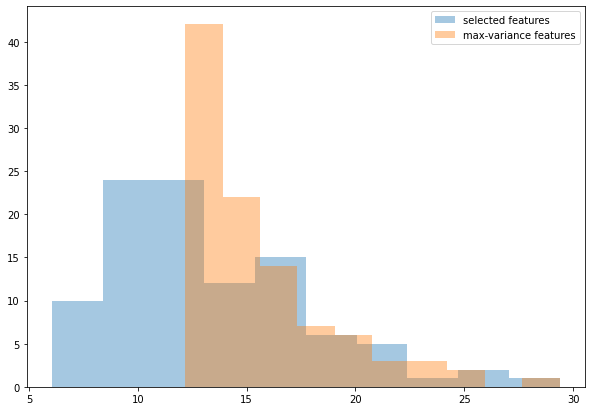

In [56]:
plt.figure(figsize=(10,7))
plt.hist(np.var(X[:,sel_feature_indices], axis=0), alpha=0.4, label='selected features')
plt.hist(np.var(X[:,maxvar_feature_indices], axis=0), alpha=0.4, label='max-variance features')
plt.legend()

[0.13887565 0.20769897 0.23812784 0.25166538 0.26407579 0.27090225
 0.27669907 0.28155277 0.28617423 0.29020942]
[0.13887565 0.20769897 0.23812784 0.25166538 0.26407579 0.27090228
 0.27669927 0.28155495 0.28618463 0.29024386 0.29374382 0.29719334
 0.30046636 0.30372433 0.30695608 0.31013746 0.31328925 0.31639734
 0.31948481 0.32256774 0.3256333  0.32867928 0.3317142  0.33474215
 0.33773699 0.34070401 0.34366299 0.34660208 0.34952362 0.35243057
 0.35531101 0.35817997 0.36104038 0.36387855 0.36671569 0.36954146
 0.37235478 0.37514093 0.37791232 0.38066857 0.38341115 0.38612788
 0.38884054 0.39154407 0.39423789 0.39692119 0.39958567 0.40224018
 0.40485733 0.40745083]
[0.13887565 0.20769897 0.23812784 0.25166538 0.26407579 0.27090224
 0.27669909 0.28155446 0.2861835  0.29024157 0.29373902 0.29718512
 0.30045798 0.30371531 0.30694565 0.31012419 0.31327419 0.31638178
 0.31946993 0.32255103 0.32561058 0.32866078 0.33169621 0.33472201
 0.33771682 0.3406864  0.34363973 0.34657876 0.34950017 0.3

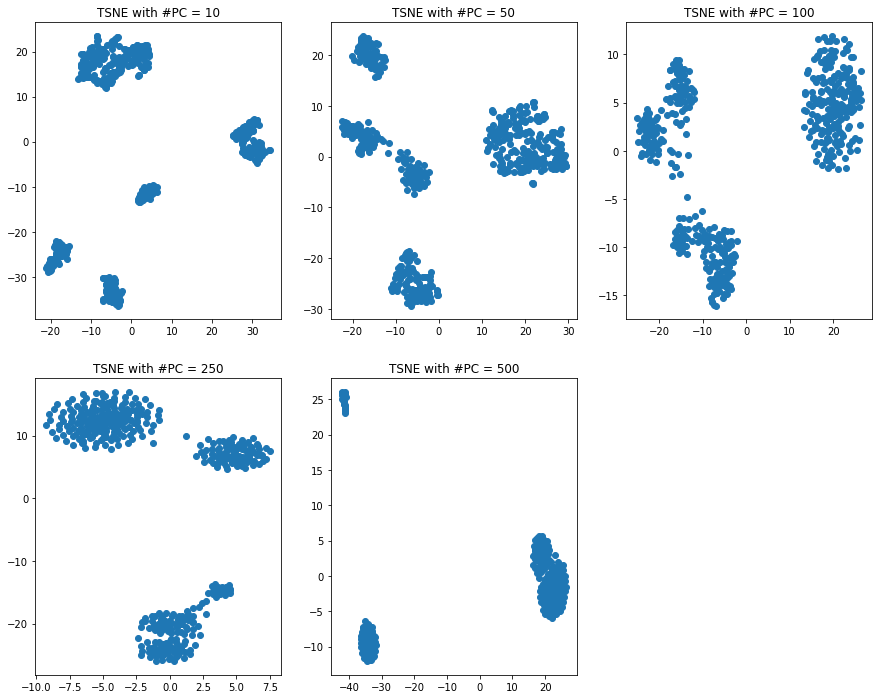

In [111]:
X_raw = np.load('Module2/release_gene_analysis_data/data/p1/X.npy')
X = np.log2(X_raw + 1)
plt.figure(figsize=(15, 12))
i = 1
for k in [10, 50, 100, 250, 500]:
    pca = PCA(n_components=k)
    topk = pca.fit_transform(X)
    print(np.cumsum(pca.explained_variance_ratio_))
    X_embedded = TSNE(n_components=2, perplexity=40).fit_transform(topk)
    plt.subplot(2,3,i)
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    plt.title('TSNE with #PC = {}'.format(k))
    i += 1
plt.show()

[0.13887565 0.20769897 0.23812784 0.25166538 0.26407579 0.27090228
 0.27669927 0.28155495 0.28618448 0.29024377 0.29374358 0.29719343
 0.30046928 0.30372936 0.30696279 0.31014475 0.31329946 0.31641052
 0.31950103 0.32258828 0.32565267 0.32870601 0.33173745 0.33476176
 0.33775815 0.34073575 0.34369343 0.34663504 0.34955    0.35246138
 0.35534922 0.35821328 0.36107132 0.36391398 0.36674201 0.36955644
 0.37235967 0.37515304 0.37792262 0.38068167 0.38342208 0.38614381
 0.38884555 0.39153881 0.39422574 0.39689649 0.39954579 0.40217166
 0.40478107 0.40738909]


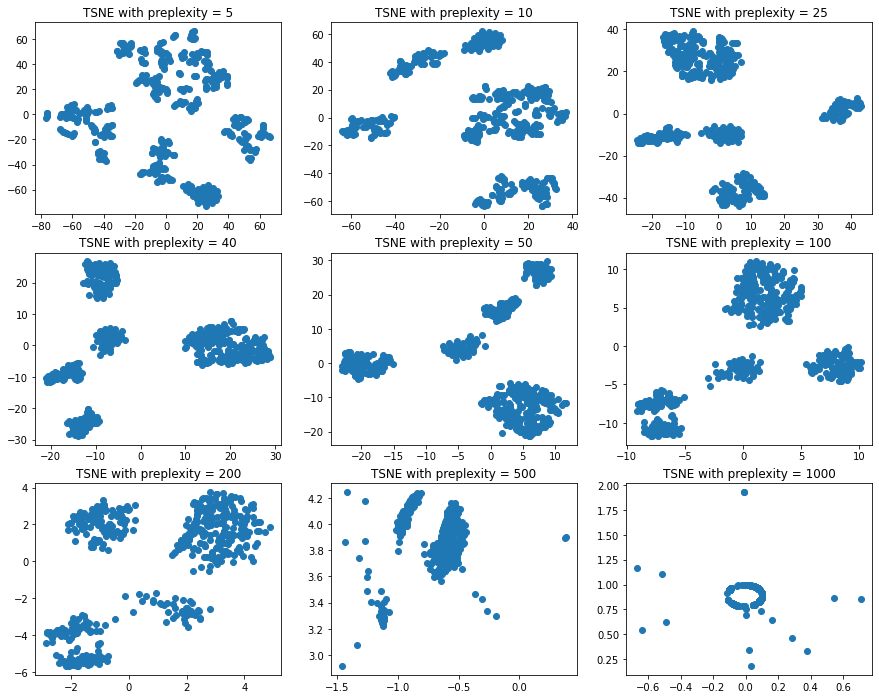

In [115]:
pca = PCA(n_components=k)
topk = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(15, 12))
k = 50
i = 1
for perp in [5, 10, 25, 40, 50, 100, 200, 500, 1000]:
    X_embedded = TSNE(n_components=2, perplexity=perp).fit_transform(topk)
    plt.subplot(3,3,i)
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    plt.title('TSNE with preplexity = {}'.format(perp))
    i += 1
plt.show()

[0.15494937 0.19925099 0.2168146  0.22817342 0.23721675 0.24603829
 0.25313216 0.25951882 0.26556845 0.27140577 0.27686254 0.28129661
 0.2853653  0.2889478  0.2922044  0.29510133 0.29796301 0.30074859
 0.30332701 0.30558029 0.30746948 0.30913859 0.3107581  0.31223583
 0.31365659 0.3149784  0.31625423 0.31750316 0.31865911 0.31978805
 0.32087538 0.32193313 0.32298549 0.32400197 0.32495049 0.32587392
 0.32675228 0.32760168 0.32842855 0.32923791 0.33004175 0.33083427
 0.33162099 0.3323913  0.33315274 0.33390657 0.33465183 0.33539527
 0.336137   0.33687159]


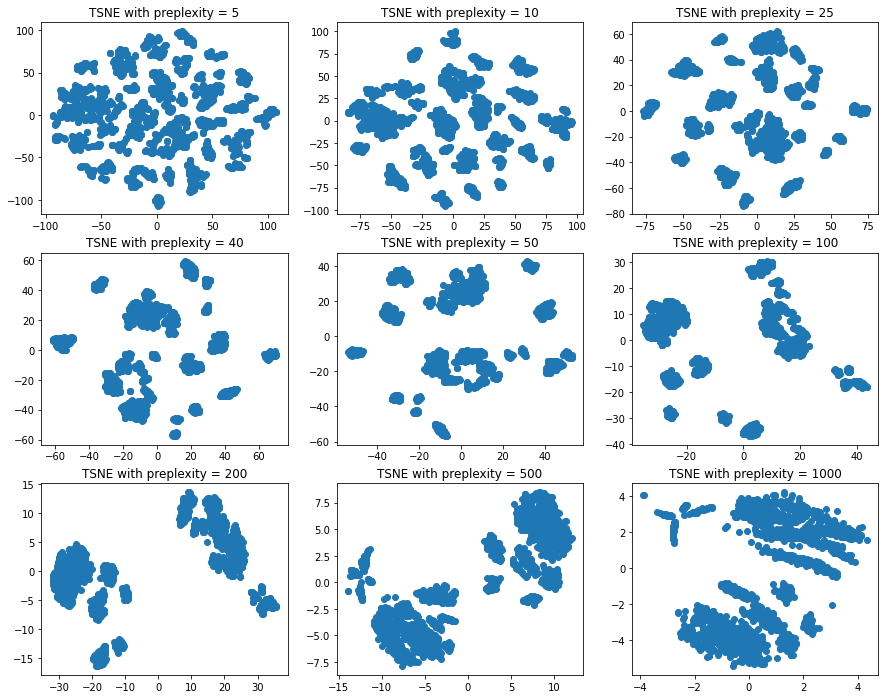

In [60]:
k = 50
pca = PCA(n_components=k)
topk = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(15, 12))
k = 50
i = 1
for perp in [5, 10, 25, 40, 50, 100, 200, 500, 1000]:
    X_embedded = TSNE(n_components=2, perplexity=perp).fit_transform(topk)
    plt.subplot(3,3,i)
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    plt.title('TSNE with preplexity = {}'.format(perp))
    i += 1
plt.show()

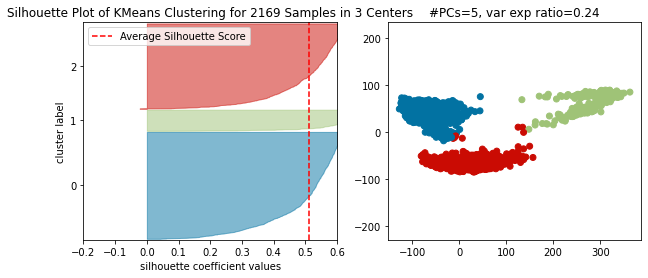

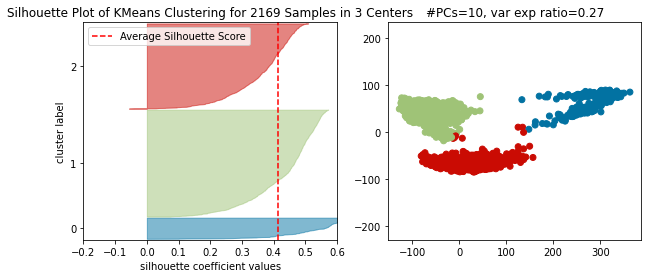

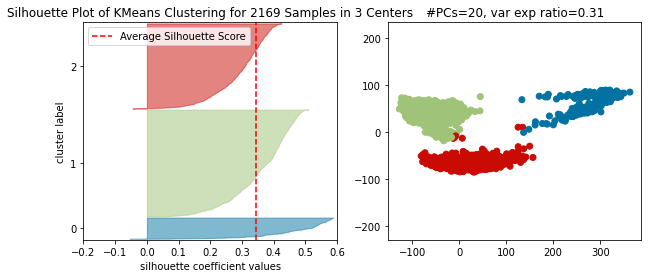

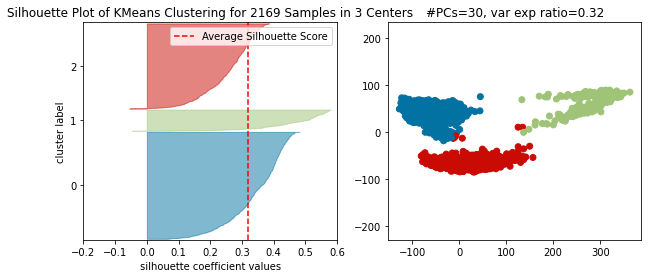

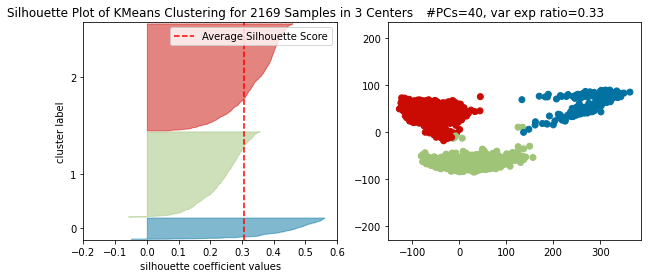

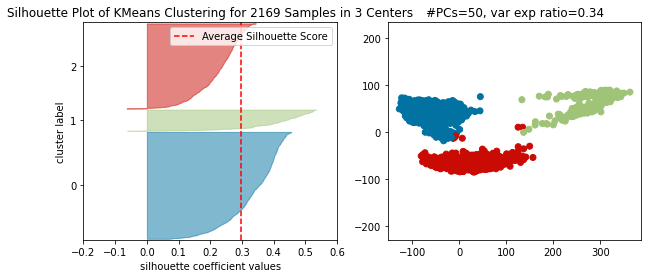

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.style import rcmod
from yellowbrick.style.colors import resolve_colors

# Ignore the warning that will pop up when we do rcmod.reset_orig()
import warnings
warnings.simplefilter(action='ignore', category=plt.cbook.MatplotlibDeprecationWarning)
# Yellowbrick changes the plotting settings, reset to default here

rcmod.reset_orig()

pca = PCA(n_components=50)
pcs = pca.fit_transform(X)
num_pcs = [5, 10, 20, 30, 40, 50]
scores = []
for k in num_pcs:
    clustering = KMeans(n_clusters=3, random_state=0).fit(pcs[:,:k]) # topk
    avg_silhouette_score = silhouette_score(pcs[:,:k], clustering.labels_)
    scores.append(avg_silhouette_score)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
    visualizer = SilhouetteVisualizer(clustering, colors='yellowbrick',is_fitted=False,ax=ax1)
    visualizer.fit(pcs[:,:k])    
    colors = np.array(resolve_colors(3,"yellowbrick"))
    ax2.scatter(pcs[:,0],pcs[:,1],c=colors[clustering.labels_])
    ax2.axis("equal")
    ax2.set_title('#PCs={}, var exp ratio={}'.format(k, round(np.sum(pca.explained_variance_ratio_[:k]),2)))
    visualizer.finalize()
    ax1.set_xlim((-.2,.6))
    plt.show()    

In [24]:
pcs.shape, X.shape

((2169, 50), (2169, 45768))

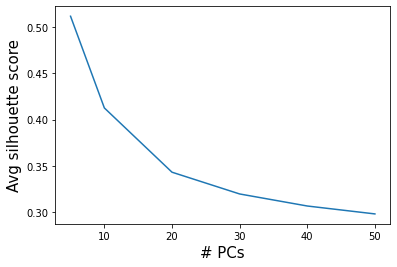

In [22]:
plt.plot(num_pcs, scores)
plt.xlabel('# PCs', size=15)
plt.ylabel('Avg silhouette score', size=15)
plt.show()

[0.15494937 0.19925099 0.2168146  0.22817342 0.23721675 0.24603829
 0.25313216 0.25951882 0.26556845 0.27140577 0.27686254 0.28129661
 0.2853653  0.2889478  0.2922044  0.29510133 0.29796301 0.30074859
 0.30332701 0.30558029 0.30746948 0.30913858 0.31075809 0.31223582
 0.31365654 0.31497842 0.31625443 0.3175034  0.31865704 0.31978601
 0.32087149 0.32192979 0.32298211 0.32399778 0.32495175 0.32587186
 0.32674814 0.32759833 0.32843617 0.32926303 0.33006427 0.33084983
 0.33162995 0.33240237 0.33316655 0.3339224  0.3346705  0.33541653
 0.33615552 0.33689224]


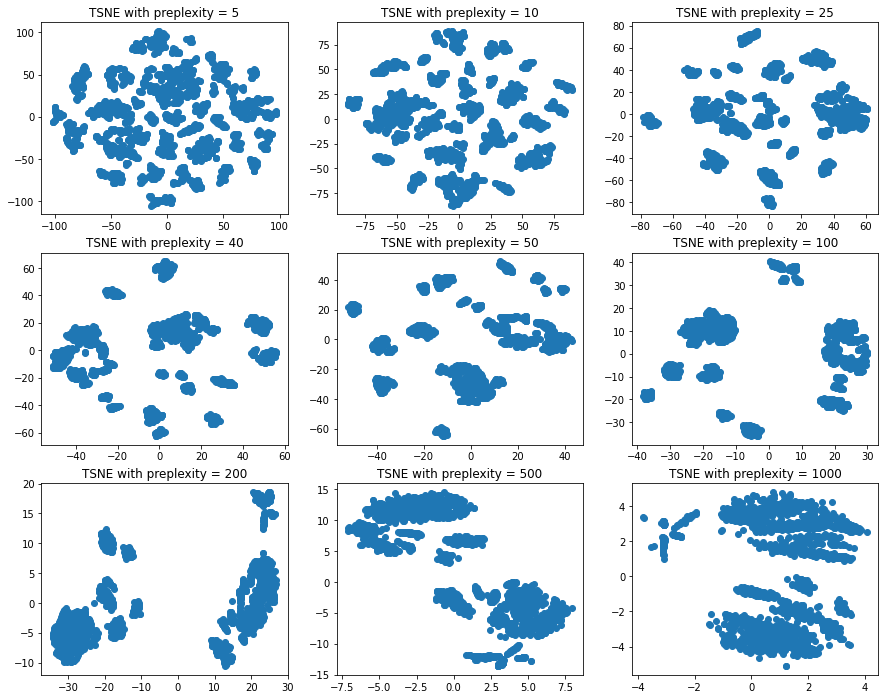

In [25]:
pca = PCA(n_components=k)
topk = pca.fit_transform(X)
print(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(15, 12))
k = 50
i = 1
for perp in [5, 10, 25, 40, 50, 100, 200, 500, 1000]:
    X_embedded = TSNE(n_components=2, perplexity=perp).fit_transform(topk)
    plt.subplot(3,3,i)
    plt.scatter(X_embedded[:,0], X_embedded[:,1])
    plt.title('TSNE with preplexity = {}'.format(perp))
    i += 1
plt.show()

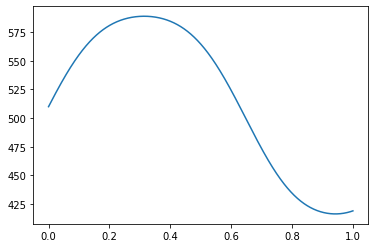

In [80]:
R = 100
a = 5
U = 500
t = np.linspace(0, 1, 1000)
x = R*np.cos(np.pi/3*np.sin(a*t))
y = U + R*np.sin(np.pi/3*np.sin(a*t))
plt.plot(t, np.sqrt(x**2+y**2))
#plt.plot(x, y, 'r.')

0.32384808070003146 -130556.72664349906
0.32254251343359647 -148038.2177242304
0.3210621312563542 -167943.42116558808
0.3193826970446983 -190626.61528084683
0.3174764308918898 -216496.63393356657
0.31531146455255415 -246024.93458724587
0.3128512152066817 -279754.21280115494
0.31005367307867016 -318307.0587205442
0.3068706024914647 -362393.67998853355
0.3032466656915794 -412816.9376049762
0.2991184963155296 -470471.68680054863
0.2944137794475241 -536333.4424580494
0.28905044502294364 -611428.382248223
0.2829361612004614 -696772.3140718475
0.2759684380597429 -793260.2553138878
0.26803583550660404 -901481.05954047
0.2590210249111993 -1021424.9886996874
0.24880677502420245 -1152051.573475279
0.23728625928944966 -1290702.0535468655
0.224379238753981 -1432395.3224824925
0.21005528552915606 -1569164.146084452
0.19436364406831153 -1689778.7023864405
0.17746585704444712 -1780404.8756730296
0.1596618082877168 -1826748.4849439925
0.14139432343827688 -1817721.3137968779
0.1232171103003081 -1749532

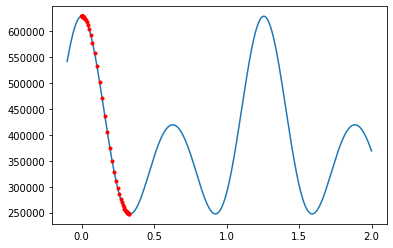

In [122]:
tss = np.linspace(-0.1,2,1000)
plt.plot(tss, U**2 + (R*a*np.pi/3*np.cos(a*tss))**2 + 2*U*R*np.pi/3*np.cos(a*tss)*np.cos(np.pi/3*np.sin(a*tss)))    
t = 0.325
dt = -2*(R*a*np.pi/3)**2*a*np.cos(a*t)*np.sin(a*t) - 2*U*R*np.pi/3*a*np.sin(a*t)*np.cos(np.pi/3*np.sin(a*t)) \
                                                   - 2*U*R*np.pi/3*np.cos(a*t)*np.pi/3*np.sin(np.pi/3*np.sin(a*t))*a*np.cos(a*t)
alpha = 1e-8
pos = np.array([])
ts = [t]
for i in range(100):
    t = t + alpha*dt
    ts.append(t)
    dt = -2*(R*a*np.pi/3)**2*a*np.cos(a*t)*np.sin(a*t) - 2*U*R*np.pi/3*a*np.sin(a*t)*np.cos(np.pi/3*np.sin(a*t)) \
                                                   - 2*U*R*np.pi/3*np.cos(a*t)*np.pi/3*np.sin(np.pi/3*np.sin(a*t))*a*np.cos(a*t)
    print(t, dt)
    plt.figure(figsize=(10,7))
    plt.plot(tss, U**2 + (R*a*np.pi/3*np.cos(a*tss))**2 + 2*U*R*np.pi/3*np.cos(a*tss)*np.cos(np.pi/3*np.sin(a*tss)))    
    plt.scatter(t, U**2 + (R*a*np.pi/3*np.cos(a*t))**2 + 2*U*R*np.pi/3*np.cos(a*t)*np.cos(np.pi/3*np.sin(a*t)), c='red', s=50)
    plt.axis('off')
    plt.title('maximizing speed with gradient ascent (iter={})'.format(i))
    plt.savefig('out_{:03d}.png'.format(i))
    plt.close()
    
ts = np.array(ts)
plt.plot(ts, U**2 + (R*a*np.pi/3*np.cos(a*ts))**2 + 2*U*R*np.pi/3*np.cos(a*ts)*np.cos(np.pi/3*np.sin(a*ts)), 'r.')

In [119]:
ts

array([3.25000000e-01, 3.23848081e-01, 3.22542513e-01, 3.21062131e-01,
       3.19382697e-01, 3.17476431e-01, 3.15311465e-01, 3.12851215e-01,
       3.10053673e-01, 3.06870602e-01, 3.03246666e-01, 2.99118496e-01,
       2.94413779e-01, 2.89050445e-01, 2.82936161e-01, 2.75968438e-01,
       2.68035836e-01, 2.59021025e-01, 2.48806775e-01, 2.37286259e-01,
       2.24379239e-01, 2.10055286e-01, 1.94363644e-01, 1.77465857e-01,
       1.59661808e-01, 1.41394323e-01, 1.23217110e-01, 1.05721781e-01,
       8.94412479e-02, 7.47648810e-02, 6.18975493e-02, 5.08701513e-02,
       4.15841834e-02, 3.38651413e-02, 2.75072892e-02, 2.23037515e-02,
       1.80632762e-02, 1.46175896e-02, 1.18230923e-02, 9.55958800e-03,
       7.72770810e-03, 6.24595726e-03, 5.04784417e-03, 4.07930171e-03,
       3.29646177e-03, 2.66378221e-03, 2.15249348e-03, 1.73932224e-03,
       1.40544884e-03, 1.13565896e-03, 9.17655034e-04, 7.41498156e-04,
       5.99156279e-04, 4.84138671e-04, 3.91200303e-04, 3.16102862e-04,
      

In [109]:
t

1.0475564505928208e-91

In [45]:
l1 = np.array([9, 2, 1, 10, 5, 2 ,2, 8, 6, 2])
l2 = np.array( [8, 8, 1, 1, 2, 2, 2, 1, 1, 8])

In [46]:
np.mean(l1), np.median(l1)

(4.7, 3.5)

In [47]:
np.mean(l2), np.median(l2)

(3.4, 2.0)

(array([1., 4., 0., 0., 1., 1., 0., 1., 1., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

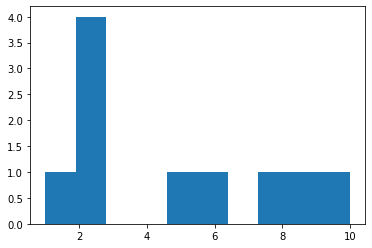

In [48]:
plt.hist(l1)

(array([4., 3., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

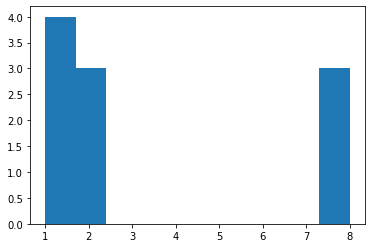

In [49]:
plt.hist(l2)

In [55]:
np.percentile(l1, [25,75])

array([2. , 7.5])

In [56]:
np.percentile(l2, [25,75])

array([1. , 6.5])

In [52]:
np.std(l1), np.std(l2)

(3.1953090617340916, 3.0397368307141326)

{'whiskers': [<matplotlib.lines.Line2D at 0x15753196fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x157531965c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15755573f88>],
 'medians': [<matplotlib.lines.Line2D at 0x157531b98c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x15753196588>],
 'means': []}

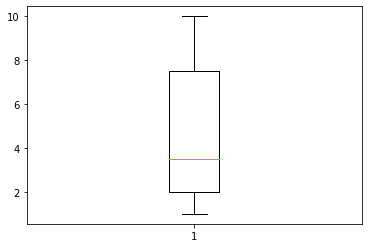

In [53]:
plt.boxplot(l1)

{'whiskers': [<matplotlib.lines.Line2D at 0x157532ba988>,
 'caps': [<matplotlib.lines.Line2D at 0x157532bae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x157532ea708>],
 'medians': [<matplotlib.lines.Line2D at 0x157532ba608>],
 'fliers': [<matplotlib.lines.Line2D at 0x157532baa48>],
 'means': []}

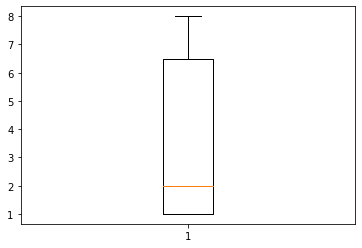

In [54]:
plt.boxplot(l2)

In [67]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

In [68]:
for i in G.keys():
    print(i, len(G[i].nodes), len(G[i].edges))

1 15 18
2 24 28
3 33 56
4 33 48
5 32 39
6 27 47
7 36 49
8 42 58
9 34 44
10 42 50
11 41 50


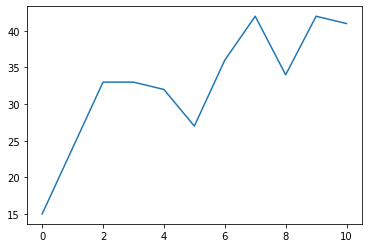

In [38]:
import numpy as np
import matplotlib.pylab as plt
plt.plot(range(len(G)), [len(G[i].nodes) for i in G.keys()])

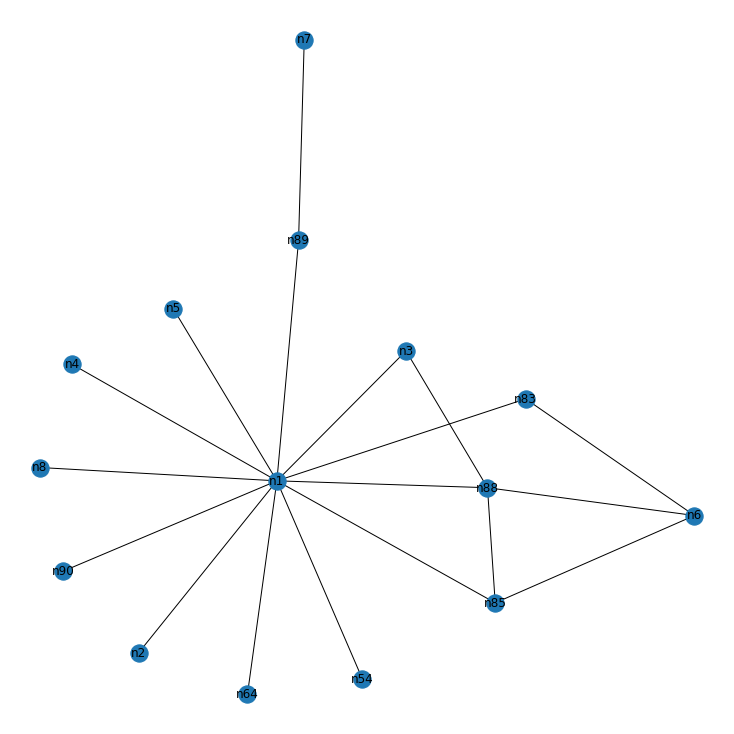

[('n1', 'n2'), ('n1', 'n3'), ('n1', 'n4'), ('n1', 'n5'), ('n1', 'n54'), ('n1', 'n64'), ('n1', 'n8'), ('n1', 'n83'), ('n1', 'n85'), ('n1', 'n88'), ('n1', 'n89'), ('n1', 'n90')]
[('n1', 'n10'), ('n1', 'n12'), ('n1', 'n2'), ('n1', 'n3'), ('n1', 'n47'), ('n1', 'n5'), ('n1', 'n55'), ('n1', 'n56'), ('n1', 'n64'), ('n1', 'n76'), ('n1', 'n8'), ('n1', 'n83'), ('n1', 'n86'), ('n1', 'n88'), ('n1', 'n89'), ('n1', 'n9'), ('n1', 'n90'), ('n1', 'n97'), ('n1', 'n98')]
[('n1', 'n10'), ('n1', 'n11'), ('n1', 'n12'), ('n1', 'n13'), ('n1', 'n2'), ('n1', 'n3'), ('n1', 'n32'), ('n1', 'n34'), ('n1', 'n35'), ('n1', 'n48'), ('n1', 'n49'), ('n1', 'n5'), ('n1', 'n50'), ('n1', 'n52'), ('n1', 'n55'), ('n1', 'n56'), ('n1', 'n6'), ('n1', 'n7'), ('n1', 'n76'), ('n1', 'n8'), ('n1', 'n83'), ('n1', 'n84'), ('n1', 'n85'), ('n1', 'n86'), ('n1', 'n89'), ('n1', 'n9'), ('n1', 'n90')]
[('n1', 'n106'), ('n1', 'n11'), ('n1', 'n13'), ('n1', 'n15'), ('n1', 'n2'), ('n1', 'n3'), ('n1', 'n4'), ('n1', 'n47'), ('n1', 'n49'), ('n1', 'n5

In [30]:
g = G[1]
plt.figure(figsize=(10,10))
nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)  
plt.show()
nodes = set([])
for i in G.keys():
    #print(sorted(G[i].nodes))
    nodes |= set(G[i].nodes)
    #print(len(nodes))
    print(sorted([(u,v) for (u,v) in G[i].edges if u == 'n1']))

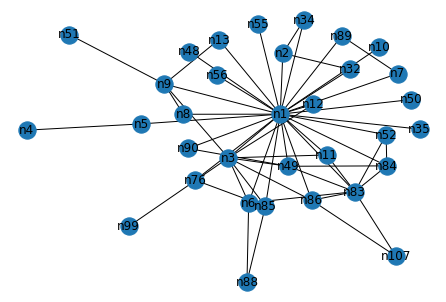

In [9]:
g = G[3]
nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)  

In [13]:
for i in [3,9]:
    for n in ['n1', 'n3', 'n12', 'n83']:
        print(i, n, nx.degree_centrality(G[i])[n])

3 n1 0.84375
3 n3 0.28125
3 n12 0.0625
3 n83 0.25
9 n1 0.30303030303030304
9 n3 0.33333333333333337
9 n12 0.24242424242424243
9 n83 0.030303030303030304


In [123]:
h_n1 = np.zeros(len(G.keys()))
h_n3 = np.zeros(len(G.keys()))
a_n1 = np.zeros(len(G.keys()))
a_n3 = np.zeros(len(G.keys()))
for i in G.keys():
    h, a = nx.hits(G[i], max_iter=1000000)
    print(i, h, a)
    if 'n1' in h:
        h_n1[i-1], a_n1[i-1] = h['n1'], a['n1']
    if 'n3' in h:
        h_n3[i-1], a_n3[i-1] = h['n3'], a['n3']        

1 {'n1': 0.09741024919597457, 'n4': 0.012471775183127415, 'n89': 0.013346937991308962, 'n83': 0.17313921514839117, 'n3': 0.03779297897712488, 'n5': 0.02494355036625483, 'n88': 0.10035989672022845, 'n85': 0.19883807237013126, 'n90': 0.012471775183127415, 'n2': 0.02494355036625483, 'n7': 0.00341771021656168, 'n54': 0.02494355036625483, 'n6': 0.25097718754900494, 'n64': 0.012471775183127415, 'n8': 0.012471775183127415} {'n1': 0.09741025193034104, 'n4': 0.012471774931496439, 'n89': 0.013346937718640423, 'n83': 0.17313921090132992, 'n3': 0.03779297850314807, 'n5': 0.024943549862992877, 'n88': 0.10035989742976725, 'n85': 0.1988380681816403, 'n90': 0.012471774931496439, 'n2': 0.024943549862992877, 'n7': 0.0034177103248445493, 'n54': 0.024943549862992877, 'n6': 0.2509771956953242, 'n64': 0.012471774931496439, 'n8': 0.012471774931496439}
2 {'n1': 0.2778609619270023, 'n89': 0.047503435050505256, 'n83': 0.06327801386896117, 'n3': 0.24724516907464605, 'n5': 0.03951676232384625, 'n88': 0.0079802994

8 {'n1': 0.004133540259450222, 'n4': 0.00015151630766520015, 'n83': 0.0003030326153304003, 'n3': 0.007638181046101183, 'n85': 0.002187127110401188, 'n86': 0.0003137437091395701, 'n2': 0.0006051829695232475, 'n6': 0.00015151630766520015, 'n8': 0.0020631879288535108, 'n76': 0.0004628108670189445, 'n9': 0.00021146308643968625, 'n34': 0.0005821790858590382, 'n35': 2.2183150368918127e-05, 'n11': 0.0013570223853836445, 'n84': 0.00015151630766520015, 'n13': 0.01221548742233486, 'n12': 0.33322720364948133, 'n14': 0.012647001697745122, 'n18': 0.07329292453400917, 'n17': 0.07329292453400917, 'n25': 0.03664646226700458, 'n82': 0.0014921284290666612, 'n19': 0.0002024090621095023, 'n78': 1.696425148143405e-05, 'n77': 0.0009090978459912009, 'n87': 0.0016353879376177494, 'n20': 0.000920597846305378, 'n22': 0.03748645617023976, 'n16': 0.3053871855583715, 'n28': 0.00015151630766520015, 'n81': 0.0005428197304283447, 'n67': 0.00045454892299560045, 'n38': 5.994677877448611e-05, 'n73': 7.691103025592016e-0

In [122]:
h_n3, a_n3

(array([0.03779298, 0.24724517, 0.03705499, 0.05387345, 0.01857643,
        0.14009722, 0.2141348 , 0.00763818, 0.2210936 , 0.00507674,
        0.02241749]),
 array([0.03779298, 0.24724515, 0.03705499, 0.05387345, 0.01857643,
        0.14009722, 0.21413479, 0.00763871, 0.22109359, 0.00507674,
        0.02241748]))

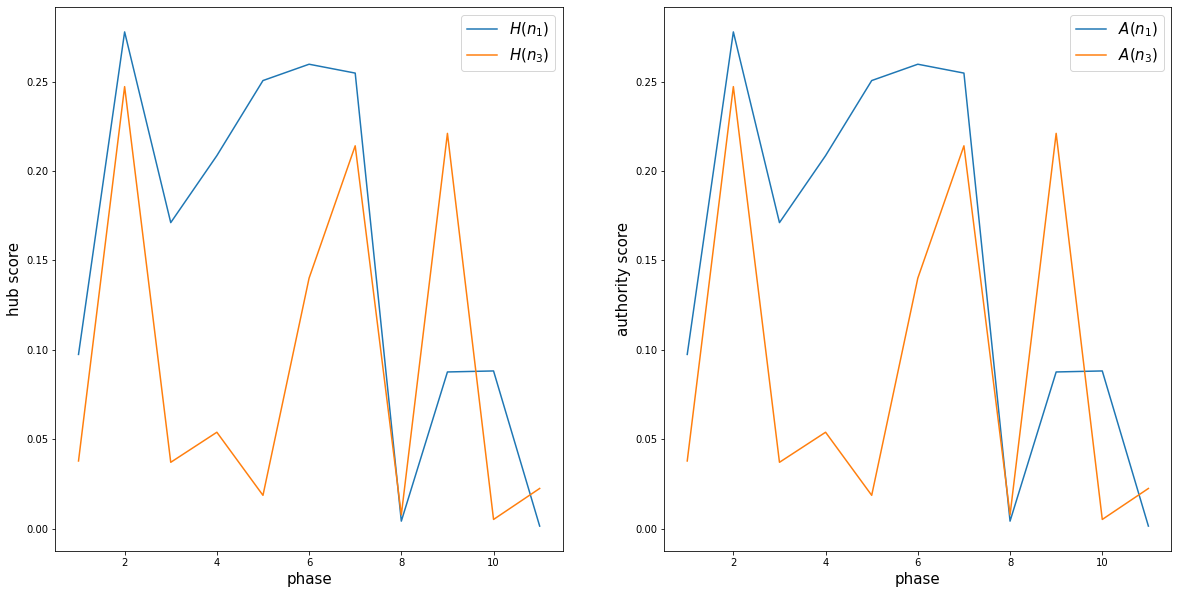

In [125]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(range(1, len(h_n1)+1), h_n1, label=r'$H(n_1)$')
plt.plot(range(1, len(h_n3)+1), h_n3, label=r'$H(n_3)$')
plt.xlabel('phase', size=15)
plt.ylabel('hub score', size=15)
plt.legend(prop={"size":15})
plt.subplot(122)
plt.plot(range(1,len(a_n1)+1), a_n1, label=r'$A(n_1)$')
plt.plot(range(1,len(a_n3)+1), a_n3, label=r'$A(n_3)$')
plt.xlabel('phase', size=15)
plt.ylabel('authority score', size=15)
plt.legend(prop={"size":15})
plt.show()

In [14]:
for i in [3,9]:
    for n in ['n1', 'n3', 'n12', 'n83']:
        print(i, n, nx.betweenness_centrality(G[i], normalized = True)[n])

3 n1 0.829502688172043
3 n3 0.09549731182795697
3 n12 0.0
3 n83 0.046572580645161295
9 n1 0.2490530303030303
9 n3 0.5762310606060607
9 n12 0.3573232323232323
9 n83 0.0


In [28]:
for i in [3,9]:
    for n in ['n1', 'n3', 'n12', 'n83']:
        print(i, n, nx.eigenvector_centrality(G[i])[n])

3 n1 0.5938791958045414
3 n3 0.291304887672891
3 n12 0.1359904690175954
3 n83 0.27749730090075797
9 n1 0.4589575176167988
9 n3 0.46798771473230655
9 n12 0.14065936326685183
9 n83 0.09178102356758049


In [17]:
#?nx.eigenvector_centrality
G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(G)
sorted((v, '{:0.2f}'.format(c)) for v, c in centrality.items())

[(0, '0.37'), (1, '0.60'), (2, '0.60'), (3, '0.37')]

In [20]:
import numpy as np
v = np.array(list(centrality.values()))
np.linalg.norm(v)

1.0

In [25]:
centrality, G.is_directed()

({0: 0.37174823427120085,
  1: 0.6015008315175003,
  2: 0.6015008315175004,
  3: 0.3717482342712008},
 False)

In [32]:
from time import time

t1 = time()
for i in G.keys():
    nx.degree_centrality(G[i])
print(time() - t1)
t1 = time()
for i in G.keys():
    nx.betweenness_centrality(G[i], normalized = True)
print(time() - t1)
t1 = time()
for i in G.keys():
    nx.eigenvector_centrality(G[i])
print(time() - t1)

0.0
0.1399233341217041
0.07895541191101074


In [37]:
nodes = set([])
for i in G.keys():
    nodes |= set(G[i].nodes)

In [39]:
nodes = list(sorted(nodes))
nodes

['n1',
 'n10',
 'n100',
 'n101',
 'n102',
 'n103',
 'n104',
 'n105',
 'n106',
 'n107',
 'n108',
 'n109',
 'n11',
 'n12',
 'n13',
 'n14',
 'n15',
 'n16',
 'n17',
 'n18',
 'n19',
 'n2',
 'n20',
 'n21',
 'n22',
 'n23',
 'n24',
 'n25',
 'n26',
 'n27',
 'n28',
 'n29',
 'n3',
 'n30',
 'n31',
 'n32',
 'n33',
 'n34',
 'n35',
 'n36',
 'n37',
 'n38',
 'n39',
 'n4',
 'n40',
 'n41',
 'n42',
 'n43',
 'n44',
 'n45',
 'n46',
 'n47',
 'n48',
 'n49',
 'n5',
 'n50',
 'n51',
 'n52',
 'n53',
 'n54',
 'n55',
 'n56',
 'n58',
 'n59',
 'n6',
 'n61',
 'n62',
 'n63',
 'n64',
 'n65',
 'n66',
 'n67',
 'n68',
 'n69',
 'n7',
 'n70',
 'n71',
 'n72',
 'n73',
 'n74',
 'n75',
 'n76',
 'n77',
 'n78',
 'n79',
 'n8',
 'n80',
 'n81',
 'n82',
 'n83',
 'n84',
 'n85',
 'n86',
 'n87',
 'n88',
 'n89',
 'n9',
 'n90',
 'n91',
 'n92',
 'n93',
 'n94',
 'n95',
 'n96',
 'n97',
 'n98',
 'n99']

In [41]:
dcs = {n:0 for n in nodes}
for i in G.keys():
    dc = nx.degree_centrality(G[i])
    for n in dc.keys():
        dcs[n] += dc[n]
phases = len(G.keys())
dcs = {n:dcs[n] / phases for n in nodes}
phases, dict(sorted(dcs.items(), key=lambda x: -x[1]))

(11,
 {'n1': 0.601485232986564,
  'n3': 0.22350498365361704,
  'n12': 0.17089306302153007,
  'n85': 0.11801003549912395,
  'n76': 0.11223526449967304,
  'n83': 0.09583553802511284,
  'n87': 0.09026058937367142,
  'n8': 0.0744413041459421,
  'n88': 0.06235027457136344,
  'n89': 0.059124468119750535,
  'n9': 0.05682295311331846,
  'n6': 0.05456875867508854,
  'n2': 0.048554076072089655,
  'n82': 0.0475699538284475,
  'n11': 0.04606857112104918,
  'n84': 0.03816835210422937,
  'n5': 0.037920818662403516,
  'n86': 0.035696096099364666,
  'n37': 0.033963246657259964,
  'n14': 0.03303536356474273,
  'n19': 0.030463556899434162,
  'n41': 0.02764395619162803,
  'n7': 0.02741099612912057,
  'n13': 0.027310261562103345,
  'n4': 0.025636371889322326,
  'n79': 0.024822904368358913,
  'n90': 0.02456453296374245,
  'n31': 0.023749436047823144,
  'n17': 0.020761322696091312,
  'n96': 0.019999328092454475,
  'n49': 0.019886363636363636,
  'n81': 0.019091533005058507,
  'n15': 0.018860373497470273,
  '

In [42]:
bcs = {n:0 for n in nodes}
for i in G.keys():
    bc = nx.betweenness_centrality(G[i], normalized = True)
    for n in bc.keys():
        bcs[n] += bc[n]
phases = len(G.keys())
bcs = {n:bcs[n] / phases for n in nodes}
phases, dict(sorted(bcs.items(), key=lambda x: -x[1]))

(11,
 {'n1': 0.655050992293228,
  'n12': 0.16756212382251084,
  'n3': 0.12940285961873224,
  'n76': 0.08379132554240724,
  'n87': 0.06132692752337006,
  'n41': 0.05036907536907536,
  'n89': 0.04794845425622871,
  'n14': 0.03267098754903633,
  'n83': 0.031784565037010895,
  'n82': 0.029196391038131618,
  'n85': 0.023733070994913123,
  'n79': 0.02194055944055944,
  'n37': 0.015950783633710462,
  'n88': 0.012435413517588706,
  'n8': 0.009169798115377987,
  'n7': 0.007977502295684115,
  'n96': 0.007856316663134844,
  'n9': 0.007481933389191453,
  'n86': 0.007043977200350133,
  'n22': 0.006984478935698448,
  'n31': 0.006964809384164223,
  'n107': 0.005681818181818182,
  'n13': 0.005681818181818182,
  'n5': 0.005681818181818182,
  'n2': 0.005117510669241589,
  'n11': 0.005106777700095339,
  'n58': 0.004312354312354313,
  'n6': 0.00402930402930403,
  'n71': 0.0032150776053215075,
  'n78': 0.0023530762167125806,
  'n27': 0.0021756021756021756,
  'n30': 0.0018078512396694215,
  'n19': 0.0010185

In [43]:
ecs = {n:0 for n in nodes}
for i in G.keys():
    ec = nx.eigenvector_centrality(G[i])
    for n in ec.keys():
        ecs[n] += ec[n]
phases = len(G.keys())
ecs = {n:ecs[n] / phases for n in nodes}
phases, dict(sorted(ecs.items(), key=lambda x: -x[1]))

(11,
 {'n1': 0.5463910796025788,
  'n3': 0.2980946631382842,
  'n85': 0.1906118157991998,
  'n76': 0.1658774444630568,
  'n83': 0.15352180271841845,
  'n8': 0.15239397677796265,
  'n12': 0.14189335589468527,
  'n87': 0.14108007414121285,
  'n2': 0.11430179838575422,
  'n9': 0.10068037663051319,
  'n82': 0.10006653319969881,
  'n6': 0.09733603139768353,
  'n11': 0.09269035950804848,
  'n88': 0.08638933030560701,
  'n5': 0.08553047384744338,
  'n84': 0.08190166093507921,
  'n89': 0.07835380827899845,
  'n37': 0.07099701233159755,
  'n4': 0.07086969700825439,
  'n41': 0.06386946987541972,
  'n19': 0.06188276066890807,
  'n90': 0.06167924444338147,
  'n86': 0.058153829485874664,
  'n13': 0.05211172342676842,
  'n81': 0.0520332711393193,
  'n14': 0.051697333545449205,
  'n15': 0.047777800029916835,
  'n55': 0.04192306140306103,
  'n77': 0.04058592846263486,
  'n34': 0.04012817121053515,
  'n27': 0.03710989507231346,
  'n31': 0.035360799458782476,
  'n47': 0.03391190182200819,
  'n49': 0.032

2


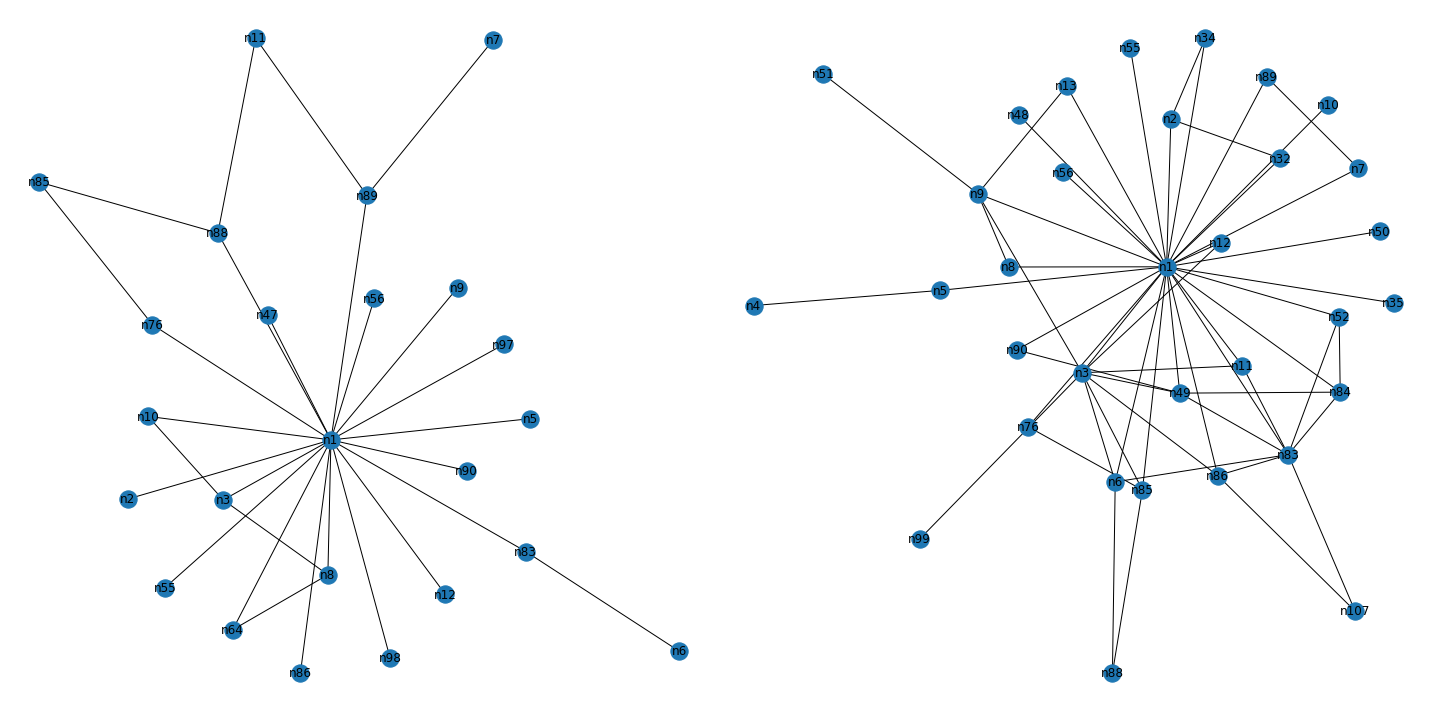

3


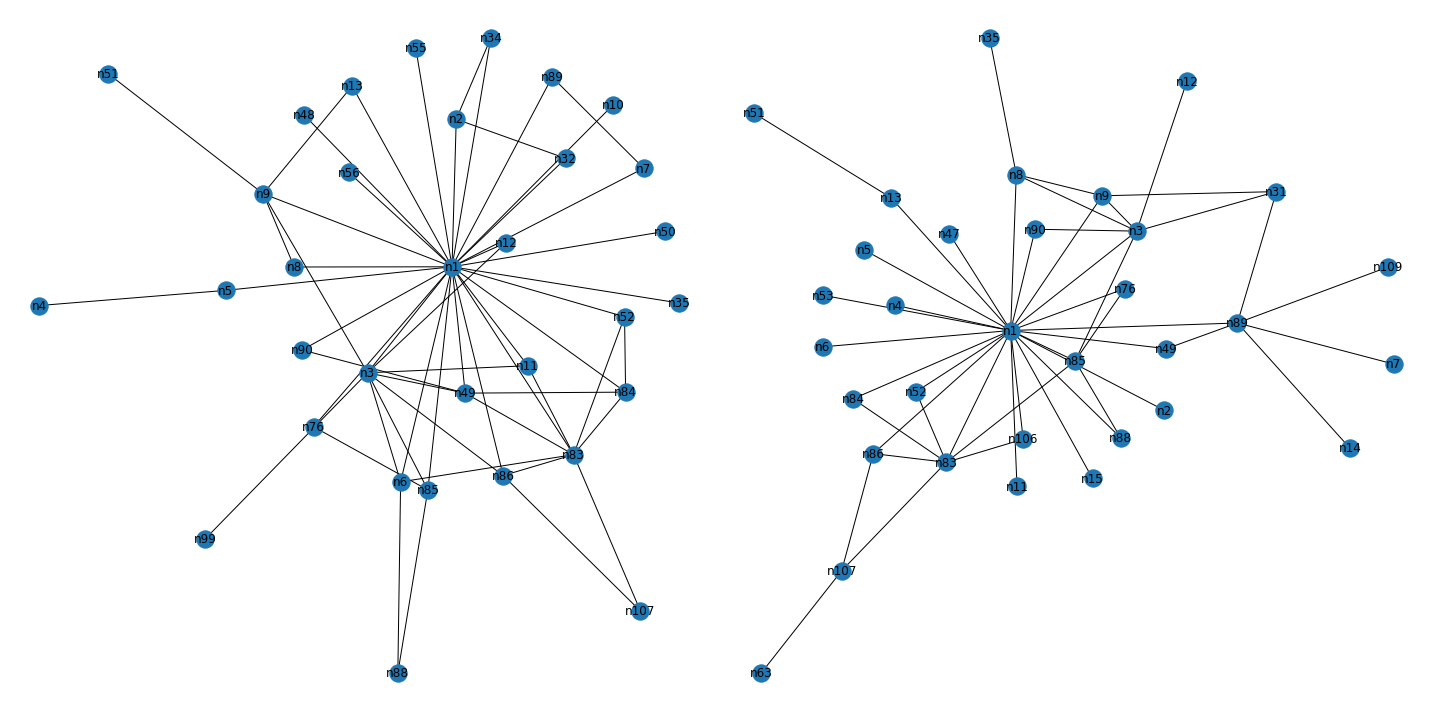

4


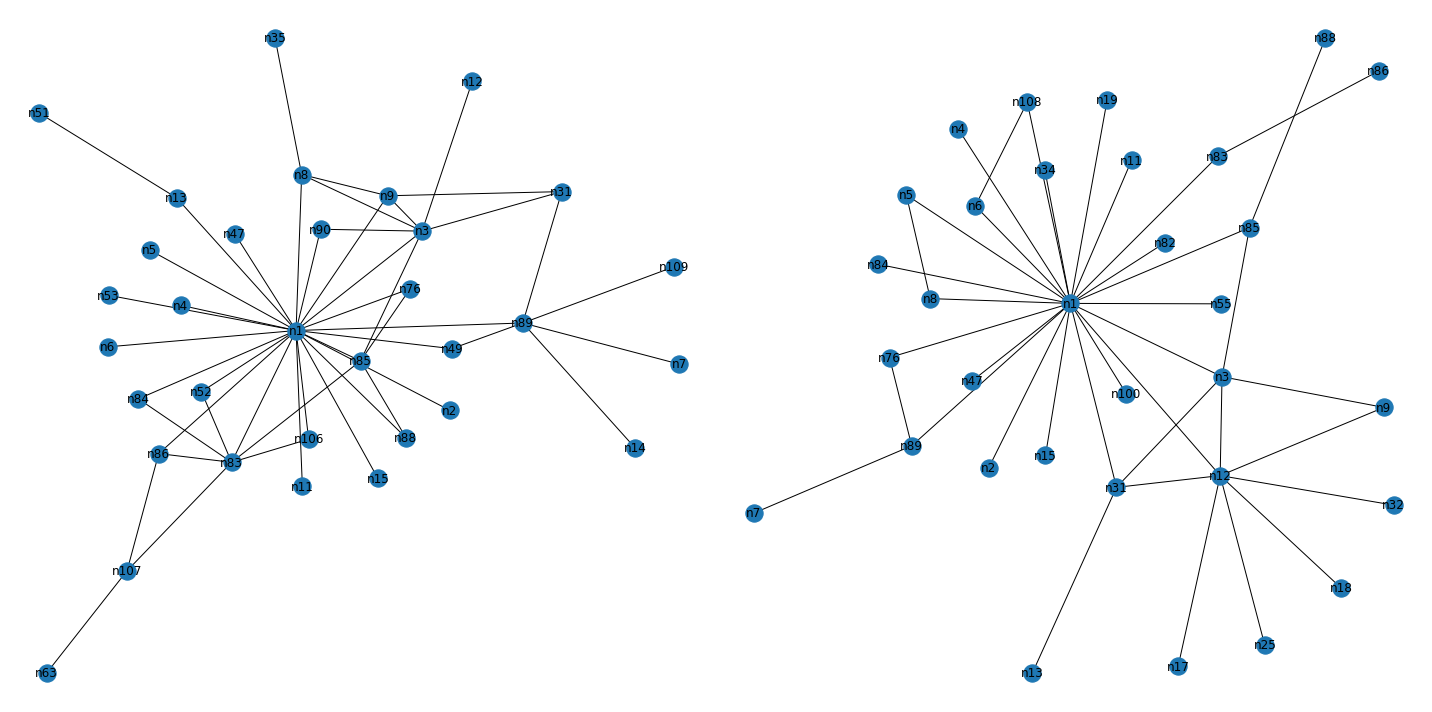

In [47]:
import matplotlib.pylab as plt
for i in range(2, 5): #phases
    print(i)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    g = G[i]
    nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)  
    plt.subplot(122)
    g = G[i+1]
    nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True)  
    plt.tight_layout()
    plt.show()

In [46]:
facebook_data_file = 'Module3/facebook_combined.txt'
G = nx.read_edgelist(facebook_data_file,
                     create_using = nx.Graph(), # Use Graph() instead of DiGraph() for directed vs. undirected, 
                     nodetype = int) # Do not forget to specify node information type
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [47]:
G_nodes = G.nodes()
G_edges = G.edges()

print(type(G_nodes))
print(type(G_edges))

print(str(len(G_nodes)) + ' nodes, ' + str(len(G_edges)) + ' edges')

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>
4039 nodes, 88234 edges


In [48]:
def graph_stats(graph):
    stats = 'Here is the composition of the graph: ' + str(len(graph.nodes())) + ' nodes, ' + str(len(graph.edges())) + ' edges'
    return(stats)

In [49]:
graph_stats(G)

'Here is the composition of the graph: 4039 nodes, 88234 edges'

Time elapsed to get the graph layout:  73.31093668937683


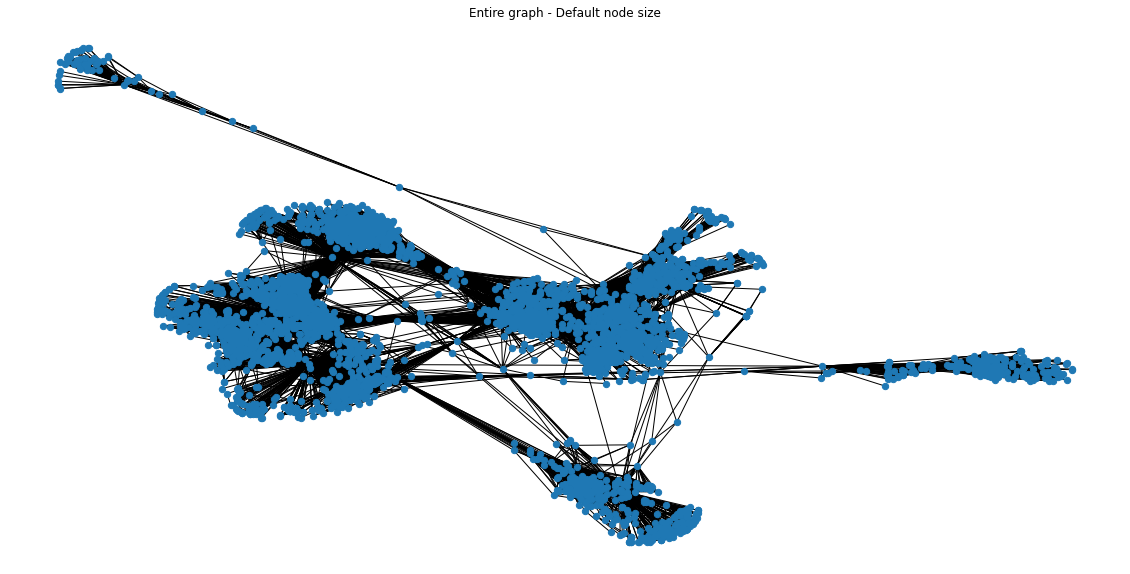

In [50]:
import time

t = time.time()
spring_pos = nx.spring_layout(G) # might take a little while
elapsed = time.time() - t
print('Time elapsed to get the graph layout: ', elapsed)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(G, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = False)
plt.title("Entire graph - Default node size")
plt.show()
#plt.close();

In [51]:
sorted(nx.degree_centrality(G).items(), key=lambda item: item[1])[::-1]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317),
 (1800, 0.06067360079247152),
 (1663, 0.058197127290737984),
 (2266, 0.05794947994056463),
 (1352, 0.05794947994056463),
 (483, 0.057206537890044575),
 (348, 0.05671124318969787),
 (1730, 0.055968301139177806),
 (1985, 0.0554730064388311),
 (1941, 0.05522535908865775),
 (2233, 0.0549777117384844),
 (2142, 0.054730064388311045),
 (1431, 0.05448241703813769),
 (1199, 0.05373947498761763),
 (1584, 0.05225359088657751),
 (2206, 0.052005943536404156),
 (1768, 0.051758296186230804),
 (2611, 0.0512630014858841),
 (2410, 0.0512630014858841),
 (2229, 0.0512630014858841),
 (2218, 0.050767706785537395),
 (2047, 0.050767706785537395),
 (1589, 0.050767706785537395),
 (1086, 0.050767706785537395),
 (2078, 0.05052005943536404),
 (2123, 0.05027241208519068),
 (1993, 0.05027

In [52]:
followers = set([])
for (u, v) in nx.edges(G):
    if u == 107:
        followers.add(v)
    if v == 107:
        followers.add(u)
len(followers)

1045

In [53]:
followers2 = set([])
for (u,v) in nx.edges(G): 
    if u in followers:
        if v != 107 and not v in followers:
            followers2.add(v)
    if v in followers:
        if u != 107 and not u in followers:
            followers2.add(u)
len(followers2)

1641

In [54]:
subgraph_nodes = [107] + list(followers | followers2)
#subgraph_edges = list(set(filter(lambda x: x[0] in subgraph_nodes or x[1] in subgraph_nodes, G.edges)))
len(subgraph_nodes) #, len(subgraph_edges)

2687

In [56]:
len(subgraph_nodes) / len(G.nodes) #, len(subgraph_edges) / len(G.edges)

0.6652636791284972

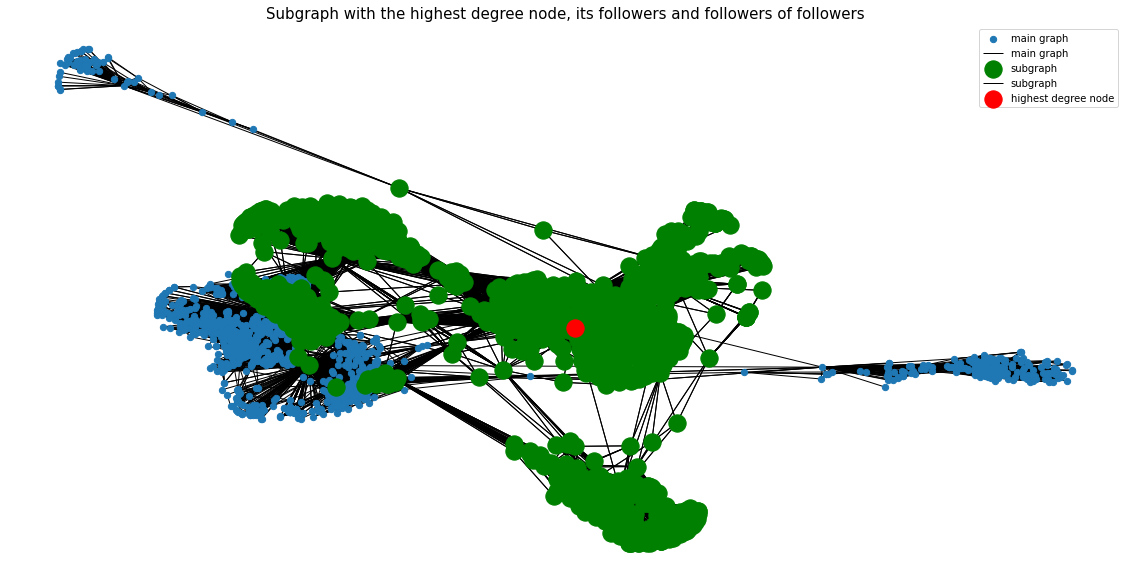

In [57]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.axis('off')

node_size_default = 40

n = nx.draw_networkx(G, 
                     spring_pos,
                     ax = ax,
                     node_size = node_size_default,
                     with_labels = False, label='main graph')

subgraph = G.subgraph(subgraph_nodes)
n2 = nx.draw_networkx(subgraph, pos=spring_pos, node_color = 'g', with_labels = False,  label='subgraph')

highest_degree_node = G.subgraph([107])
n3 = nx.draw_networkx(highest_degree_node, pos=spring_pos, node_color = 'r', with_labels = False,  label='highest degree node')

plt.title("Subgraph with the highest degree node, its followers and followers of followers", size=15)
plt.legend()
plt.show()

In [59]:
len(subgraph.nodes), len(subgraph.edges)

(2687, 58061)

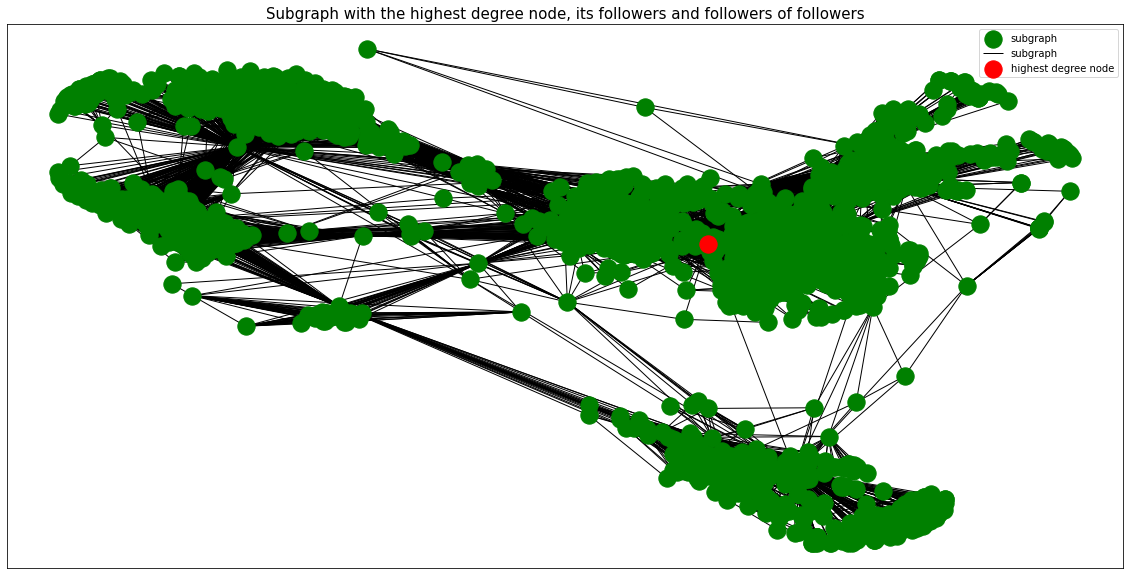

In [60]:
plt.figure(figsize=(20,10))
subgraph = G.subgraph(subgraph_nodes)
n2 = nx.draw_networkx(subgraph, pos=spring_pos, node_color = 'g', with_labels = False,  label='subgraph')

highest_degree_node = G.subgraph([107])
n3 = nx.draw_networkx(highest_degree_node, pos=spring_pos, node_color = 'r', with_labels = False,  label='highest degree node')

plt.title("Subgraph with the highest degree node, its followers and followers of followers", size=15)
plt.legend()
plt.show()

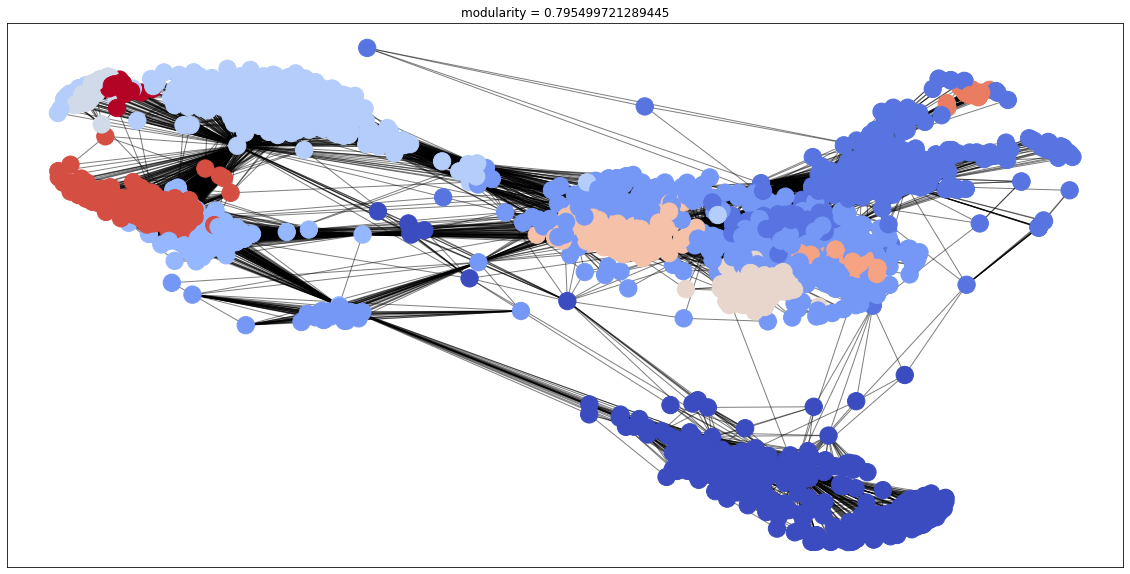

In [65]:
plt.figure(figsize=(20,10))
partition = community.best_partition(subgraph)
m = community.modularity(partition, subgraph)
cmap = plt.cm.get_cmap('coolwarm', max(partition.values()) + 1)
nx.draw_networkx_nodes(subgraph, spring_pos, partition.keys(), cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(subgraph, spring_pos, alpha=0.5)
plt.title('modularity = {}'.format(m))
plt.show()

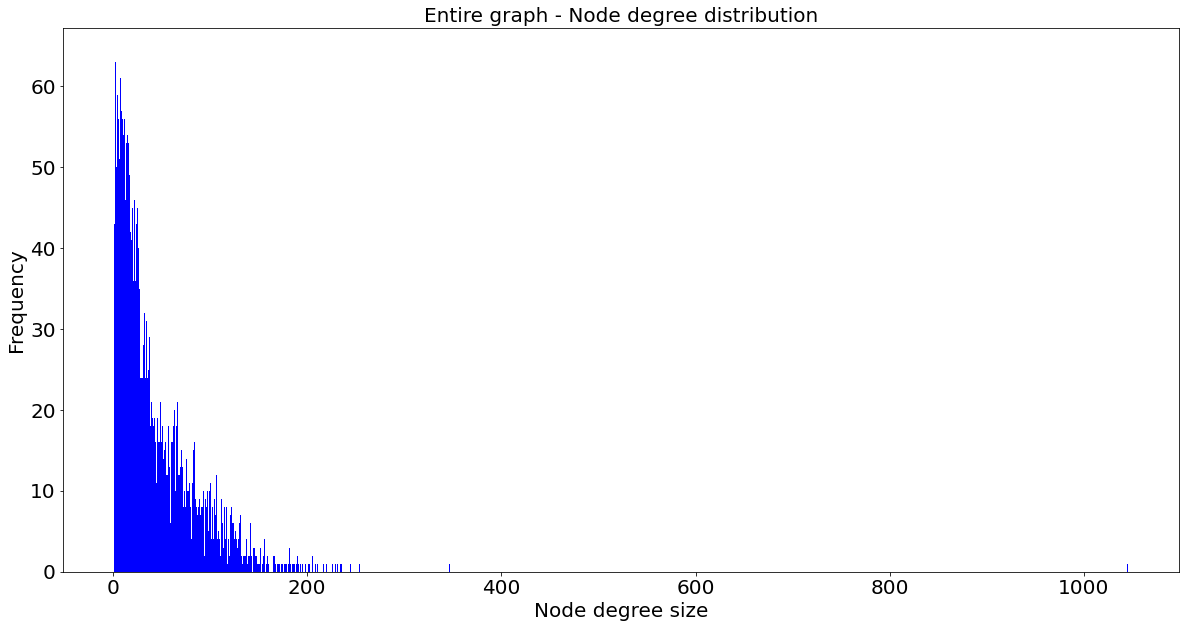

In [87]:
import collections
degree_sequence = [val for (node, val) in subgraph.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(20,10))

plt.bar(deg, cnt, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Entire graph - Node degree distribution", fontsize=20)
plt.show()

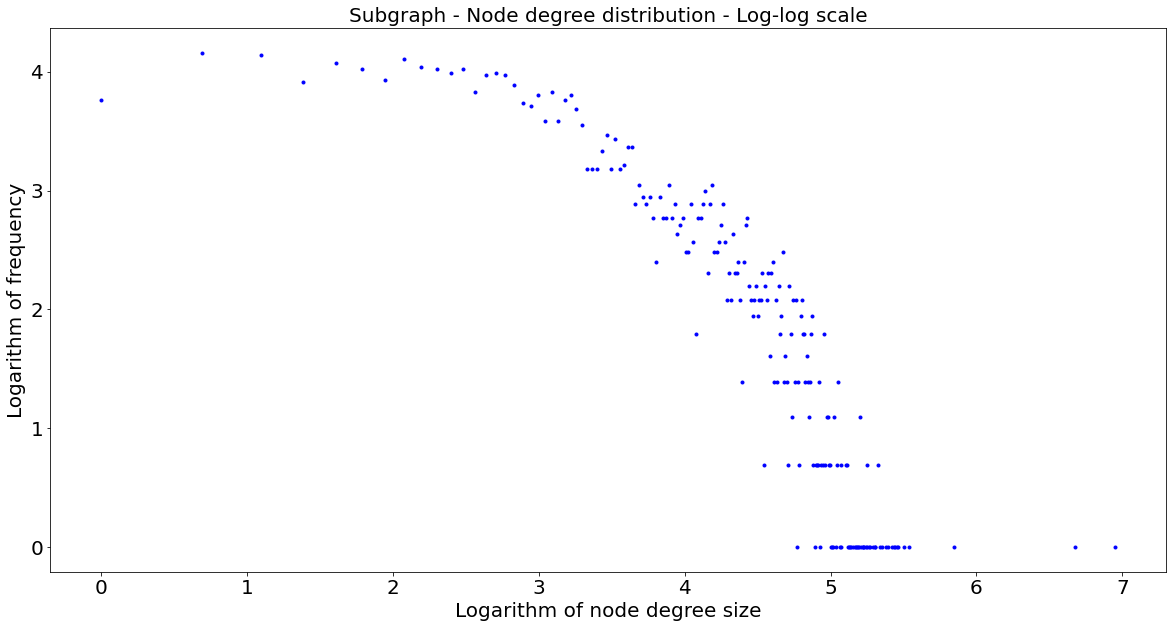

In [93]:
log_deg = np.log(deg)
log_cnt = np.log(cnt)

plt.figure(figsize=(20,10))

plt.plot(log_deg, log_cnt, 'b.')
plt.xlabel('Logarithm of node degree size', fontsize=20)
plt.ylabel('Logarithm of frequency', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Subgraph - Node degree distribution - Log-log scale", fontsize=20)
plt.show()

In [100]:
G = nx.Graph()
for e in [(1,2),(2,3),(3,4),(4,1),(3,5),(5,6),(6,7),(7,8)]:
    G.add_edge(e[0], e[1])
nx.linalg.algebraicconnectivity.fiedler_vector(G)

array([-0.37147146, -0.33561673, -0.23497399, -0.33561673,  0.01167125,
        0.25606345,  0.45102474,  0.55891947])

1 n1 0.9065934065934067


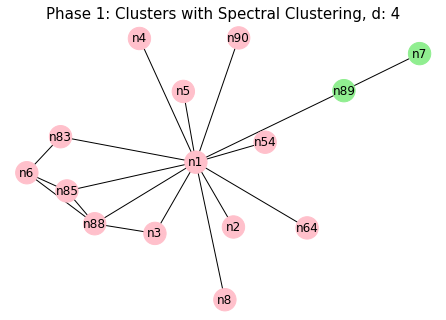

2 n1 0.942687747035573
2 n12 0.0


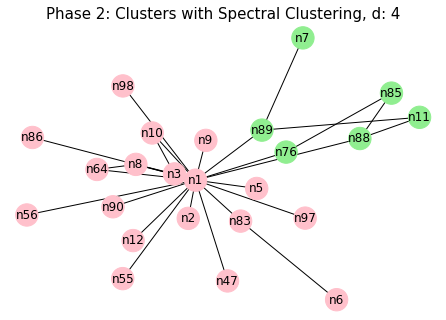

3 n1 0.829502688172043
3 n12 0.0


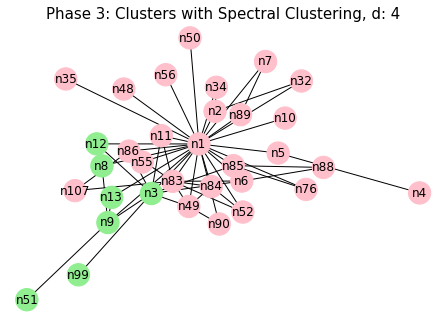

4 n1 0.8393097158218126
4 n12 0.0


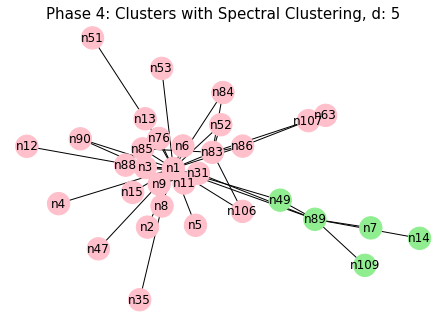

5 n1 0.8838709677419355
5 n12 0.2698924731182796


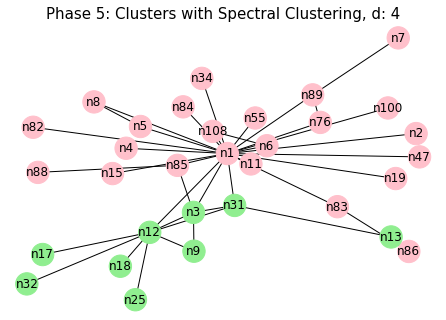

6 n1 0.5425641025641026
6 n12 0.3820512820512821


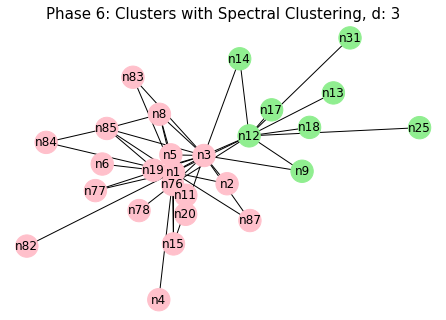

7 n1 0.8637110016420362


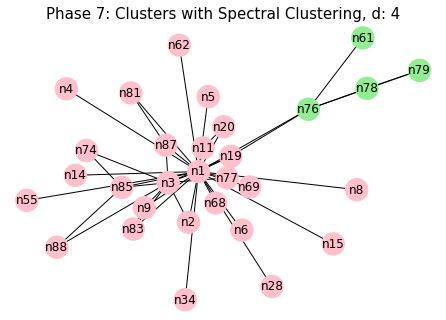

7 n12 1.0


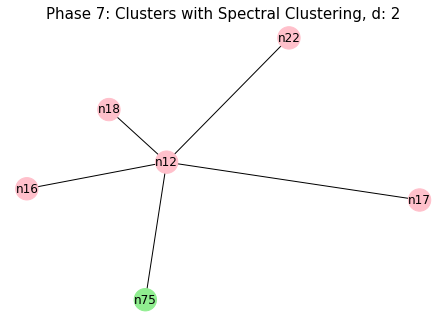

8 n1 0.553658536585366
8 n12 0.3567073170731707


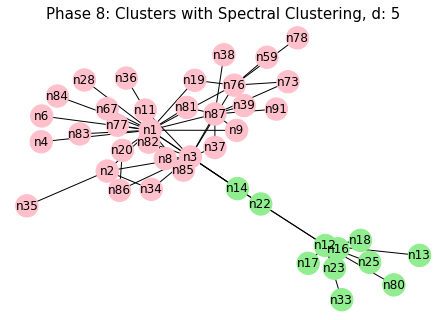

9 n1 0.2490530303030303
9 n12 0.3573232323232323


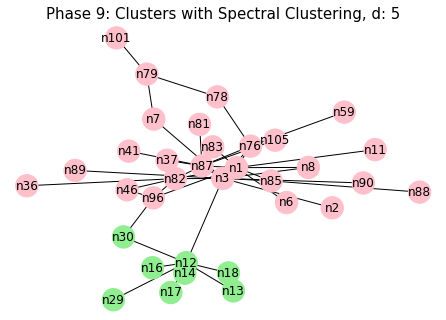

10 n1 0.6459770114942529


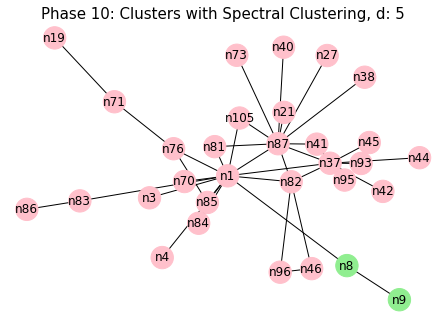

10 n12 0.8928571428571428


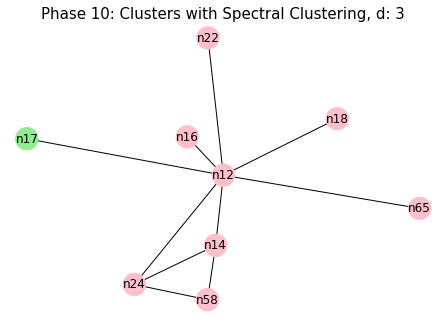

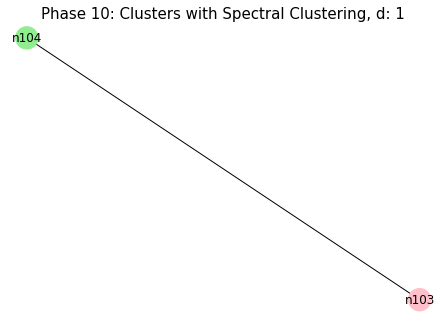

11 n1 0.5839260312944524
11 n12 0.47700331910858235


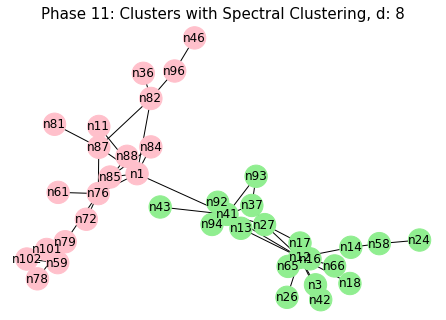

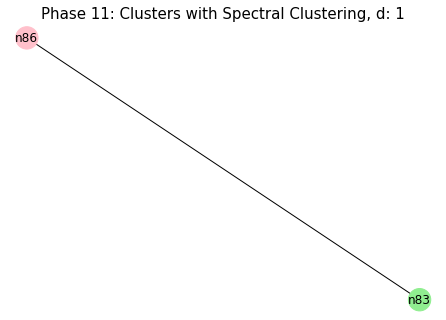

In [109]:
from networkx.algorithms.distance_measures import diameter
import community #networkx.algorithms.
#from networkx.algorithms.community.louvain import louvain_communities
#from networkx.algorithms.community.modularity_max import greedy_modularity_communities
modularities = []
n1c = np.zeros(len(G.keys()))
n12c = np.zeros(len(G.keys()))
for i in G.keys():
    g = G[i]
    for gcc in sorted(nx.connected_components(g), key=len, reverse=True):
        g0 = g.subgraph(gcc)
        ev = nx.linalg.algebraicconnectivity.fiedler_vector(g0)
        #cn = nx.degree_centrality(g0)
        cn = nx.betweenness_centrality(g0)
        if 'n1' in cn:
            n1c[i-1] = cn['n1']
            print(i, 'n1', cn['n1'])
        if 'n12' in cn:
            n12c[i-1] = cn['n12']
            print(i, 'n12', cn['n12'])
        color_map = ['pink' if v < 0 else 'lightgreen' for v in ev]        
        #nx.draw(g, pos=nx.drawing.nx_agraph.graphviz_layout(g), with_labels=True, node_color=color_map)  
        nodes = np.array(g0.nodes)
        partition = {node:(1 if val <0 else 2) for (node, val) in zip(g0.nodes, ev)}
        m = community.modularity(partition, g0)
        modularities.append(m)
        nx.draw(g0, pos=nx.drawing.layout.spring_layout(g0), with_labels=True, node_color=color_map, node_size=500)  
        plt.title('Phase {}: Clusters with Spectral Clustering, d: {}'.format(i, diameter(g0)), size=15)
        #plt.title('Phase {}, modularity {}'.format(i, m), size=12)
        plt.show()  

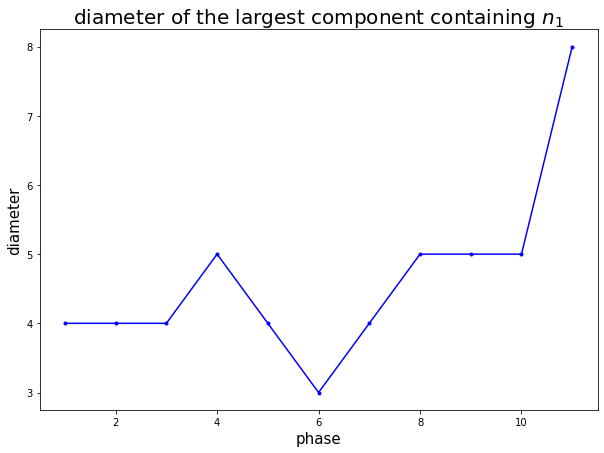

In [108]:
d = [4, 4, 4, 5, 4, 3, 4, 5, 5, 5, 8]
plt.figure(figsize=(10,7))
plt.plot(range(1,len(d)+1), d, 'b.-')
plt.xlabel('phase', size=15)
plt.ylabel('diameter', size=15)
plt.title(r'diameter of the largest component containing $n_1$', size=20)
plt.show()

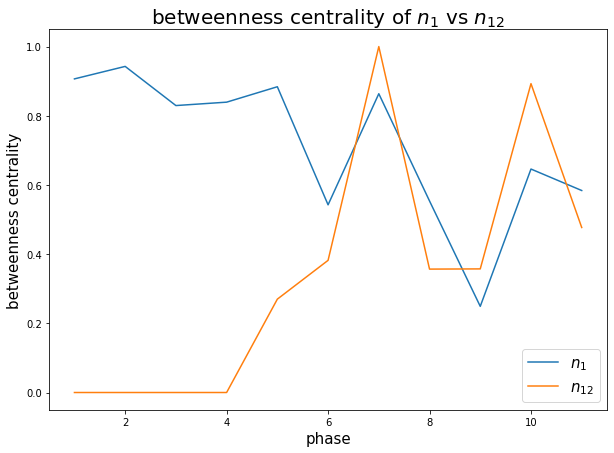

In [110]:
d = [4, 4, 4, 5, 4, 3, 4, 5, 5, 5, 8]
plt.figure(figsize=(10,7))
plt.plot(range(1,len(n1c)+1), n1c, label=r'$n_1$')
plt.plot(range(1,len(n12c)+1), n12c, label=r'$n_{12}$')
plt.xlabel('phase', size=15)
plt.ylabel(r'betweenness centrality', size=15)
plt.title(r'betweenness centrality of $n_1$ vs $n_{12}$', size=20)
plt.legend(prop={"size":15})
plt.show()

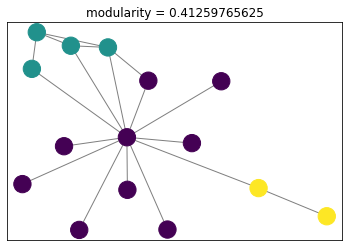

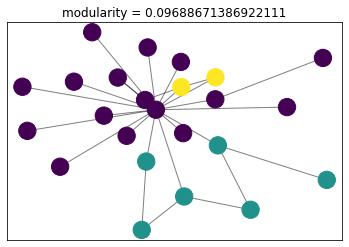

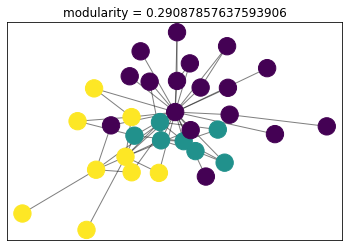

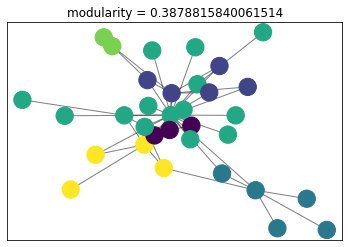

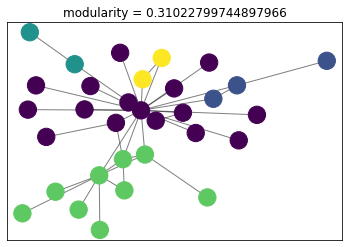

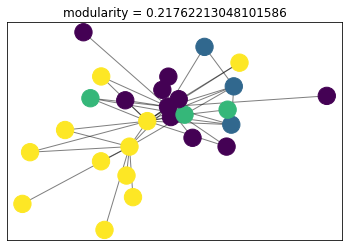

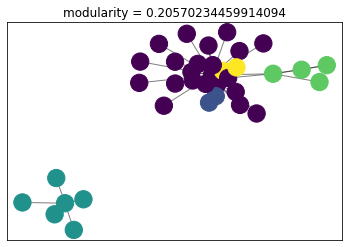

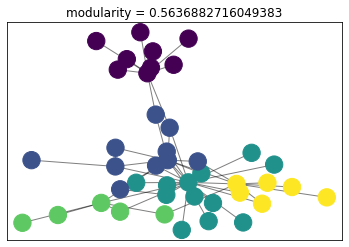

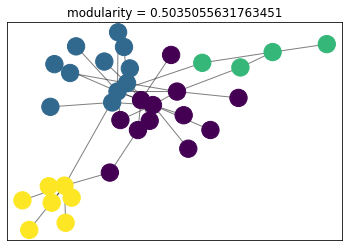

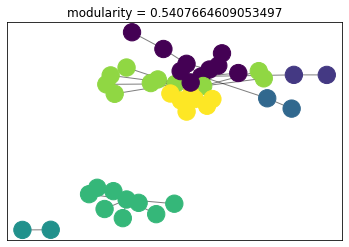

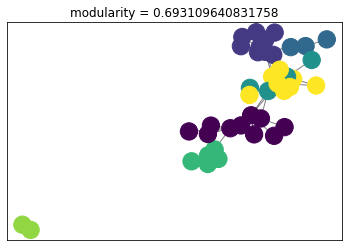

In [42]:
modularities = []
for i in G.keys():
    g = G[i]
    partition = community.best_partition(g)
    m = community.modularity(partition, g)
    modularities.append(m)
    pos = nx.spring_layout(g)
    cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(g, pos, partition.keys(), cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(g, pos, alpha=0.5)
    plt.title('modularity = {}'.format(m))
    plt.show()

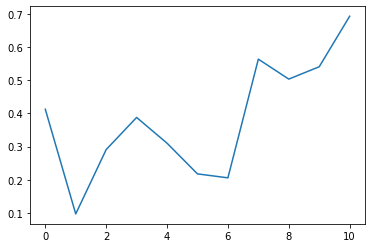

In [43]:
plt.plot(range(len(modularities)), modularities)
plt.show()

In [88]:
df = pd.read_csv('Module4/CO2.csv', skiprows=54)
df.head()

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                adjusted                
1                Excel                  [ppm]      [ppm]         [ppm]   
2  1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3  1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4  1958   03     21259   1958.2027     315.70      314.43       316.19   

     seasonally           CO2       seasonally  
0  adjusted fit        filled  adjusted filled  
1         [ppm]         [ppm]            [ppm]  
2        -99.99        -99.99           -99.99  
3        -99.99        -99.99           -99.99  
4        314.90        315.70           314.43

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
df = pd.read_csv('Module4/CO2.csv', skiprows=57, header=None)
df.head(15)

0   1      2          3       4       5       6       7       8       9
0   1958   1  21200  1958.0411  -99.99  -99.99  -99.99  -99.99  -99.99  -99.99
1   1958   2  21231  1958.1260  -99.99  -99.99  -99.99  -99.99  -99.99  -99.99
2   1958   3  21259  1958.2027  315.70  314.43  316.19  314.90  315.70  314.43
3   1958   4  21290  1958.2877  317.45  315.16  317.30  314.98  317.45  315.16
4   1958   5  21320  1958.3699  317.51  314.71  317.86  315.06  317.51  314.71
5   1958   6  21351  1958.4548  -99.99  -99.99  317.24  315.14  317.24  315.14
6   1958   7  21381  1958.5370  315.86  315.19  315.86  315.21  315.86  315.19
7   1958   8  21412  1958.6219  314.93  316.19  313.99  315.29  314.93  316.19
8   1958   9  21443  1958.7068  313.21  316.08  312.46  315.35  313.21  316.08
9   1958  10  21473  1958.7890  -99.99  -99.99  312.44  315.40  312.44  315.40
10  1958  11  21504  1958.8740  313.33  315.20  313.61  315.46  313.33  315.20
11  1958  12  21534  1958.9562  314.67  315.43  314.76  315.51  314.67  315.43
12  1959   1  21565  1959.0411  315.58  315.55  315.62  315.57  315.58  315.55
13  1959   2  21596  1959.1260  316.48  315.86  316.26  315.63  316.48  315.86
14  1959   3  21624  1959.2027  316.65  315.38  316.98  315.69  316.65  315.38

In [90]:
f1 = df.iloc[:,4].values
t = np.array([(i+0.5)/12 for i in range(len(df))]) 
#t = df.iloc[:,0].values - 1958 + df.iloc[:,1].values / 12
t = t[f1 > 0]
f1 = f1[f1 > 0]
#f1

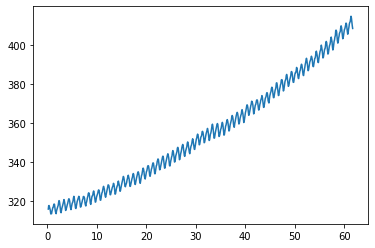

In [91]:
import matplotlib.pylab as plt
plt.plot(t, f1)

In [92]:
#np.column_stack((t, np.array([(i+0.5)/12 for i in range(len(t))])))

In [93]:
n = len(t)
ntrain = int(n * 0.8)
ntest = n - ntrain

In [94]:
from sklearn.linear_model import LinearRegression
import numpy as np
#t = np.arange(len(f1)).reshape(-1,1)
t = t.reshape(-1,1)
reg = LinearRegression().fit(t[:ntrain], f1[:ntrain])
#reg.score(t, f1)

In [95]:
reg.intercept_, reg.coef_

(308.9916567323666, array([1.40669115]))

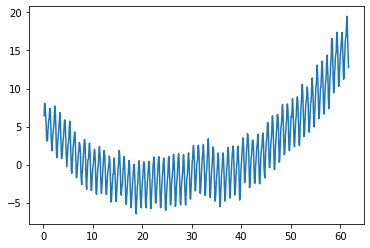

In [96]:
plt.plot(t, f1 - reg.predict(t))

In [97]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape
f1_pred = reg.predict(t[ntrain:])
mse(f1[ntrain:], f1_pred, squared=False), mape(f1[ntrain:], f1_pred)

(10.641458521874688, 0.02450454956443147)

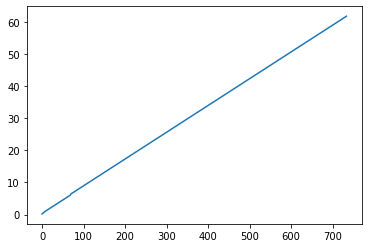

In [98]:
plt.plot(t)

In [99]:
np.sqrt(np.mean((f1[ntrain:] - f1_pred)**2))

10.641458521874688

In [100]:
np.mean(np.abs(f1[ntrain:] - f1_pred) / f1[ntrain:])

0.02450454956443147

In [101]:
t1 = np.column_stack((t,t**2))
reg = LinearRegression().fit(t1[:ntrain], f1[:ntrain])

In [102]:
reg.intercept_, reg.coef_

(314.1005841870842, array([0.80209702, 0.0121175 ]))

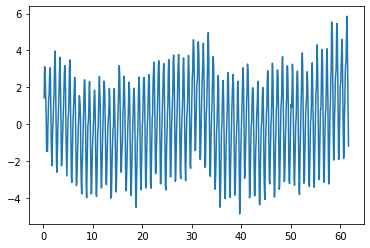

In [103]:
#plt.plot(t1[ntrain:,0], f1[ntrain:] - reg.predict(t1[ntrain:,:]))
plt.plot(t1[:,0], f1 - reg.predict(t1))

In [104]:
#len(t1), n

In [105]:
f1_pred = reg.predict(t1[ntrain:,:])
mse(f1[ntrain:], f1_pred, squared=False), mape(f1[ntrain:], f1_pred)

(2.5013322194897802, 0.005320319129740849)

In [106]:
df1 = df.loc[:,[0,1,4]]
df1.columns = ['year', 'month', 'C']
df1['t'] = np.array([(i+0.5)/12 for i in range(len(df1))]) 
#df1['t'] = df1.year - 1958 + df1.month / 12
df1['t2'] = df1.t**2
df1 = df1[df1.C>0]
n = len(t)
ntrain = int(n * 0.8)
ntest = n - ntrain
df_train = df1[:ntrain]
df_test = df1[ntrain:]
reg = LinearRegression().fit(df_train[['t', 't2']].values, df_train['C'].values)
df_train['trend'] = reg.predict(df_train[['t', 't2']].values)
df_train.head()

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


year  month       C         t        t2       trend
2  1958      3  315.70  0.208333  0.043403  314.268214
3  1958      4  317.45  0.291667  0.085069  314.335560
4  1958      5  317.51  0.375000  0.140625  314.403075
6  1958      7  315.86  0.541667  0.293403  314.538609
7  1958      8  314.93  0.625000  0.390625  314.606628

In [107]:
df_train['p'] = df_train.C - df_train.trend
df_train.head()

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


year  month       C         t        t2       trend         p
2  1958      3  315.70  0.208333  0.043403  314.268214  1.431786
3  1958      4  317.45  0.291667  0.085069  314.335560  3.114440
4  1958      5  317.51  0.375000  0.140625  314.403075  3.106925
6  1958      7  315.86  0.541667  0.293403  314.538609  1.321391
7  1958      8  314.93  0.625000  0.390625  314.606628  0.323372

In [108]:
p = df_train.groupby('month')['p'].mean()
p

month
1    -0.012919
2     0.646407
3     1.355569
4     2.561858
5     2.982891
6     2.316473
7     0.776297
8    -1.301213
9    -3.128074
10   -3.309520
11   -2.081487
12   -0.921507
Name: p, dtype: float64

In [109]:
p[p.index == 1].item()

-0.012919218906398439

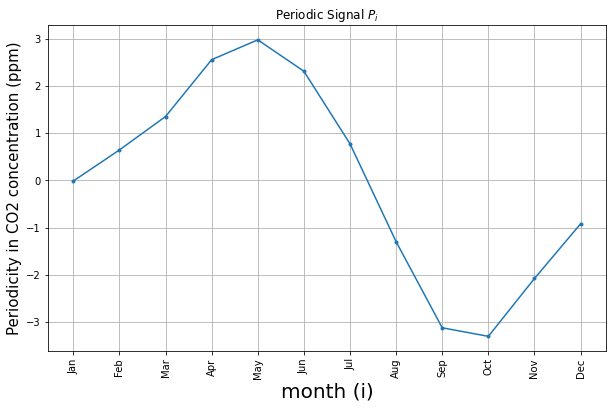

In [125]:
from scipy import interpolate
x = np.arange(1, 12+1)
y = p.tolist()
f = interpolate.interp1d(x, y)
plt.figure(figsize=(10,6))
plt.plot(x, y, '.-')
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation='vertical')
plt.xlabel('month (i)', size=20)
plt.ylabel(r'Periodicity in CO2 concentration (ppm)', size=15)
plt.title(r'Periodic Signal $P_i$')
plt.grid()

In [111]:
len(df_train), len(df_test)

(587, 147)

In [114]:
df1['trend'] = reg.predict(df1[['t', 't2']].values)
df1['seas'] = np.nan
for i in range(1, 12+1):
    df1.loc[df1.month == i, 'seas'] = p[p.index == i].item()
df1.head()

year  month       C         t        t2       trend      seas
2  1958      3  315.70  0.208333  0.043403  314.268214  1.355569
3  1958      4  317.45  0.291667  0.085069  314.335560  2.561858
4  1958      5  317.51  0.375000  0.140625  314.403075  2.982891
6  1958      7  315.86  0.541667  0.293403  314.538609  0.776297
7  1958      8  314.93  0.625000  0.390625  314.606628 -1.301213

In [115]:
df1['pred'] = df1['trend'] + df1['seas']
df1.head()

year  month       C         t        t2       trend      seas        pred
2  1958      3  315.70  0.208333  0.043403  314.268214  1.355569  315.623783
3  1958      4  317.45  0.291667  0.085069  314.335560  2.561858  316.897418
4  1958      5  317.51  0.375000  0.140625  314.403075  2.982891  317.385965
6  1958      7  315.86  0.541667  0.293403  314.538609  0.776297  315.314906
7  1958      8  314.93  0.625000  0.390625  314.606628 -1.301213  313.305416

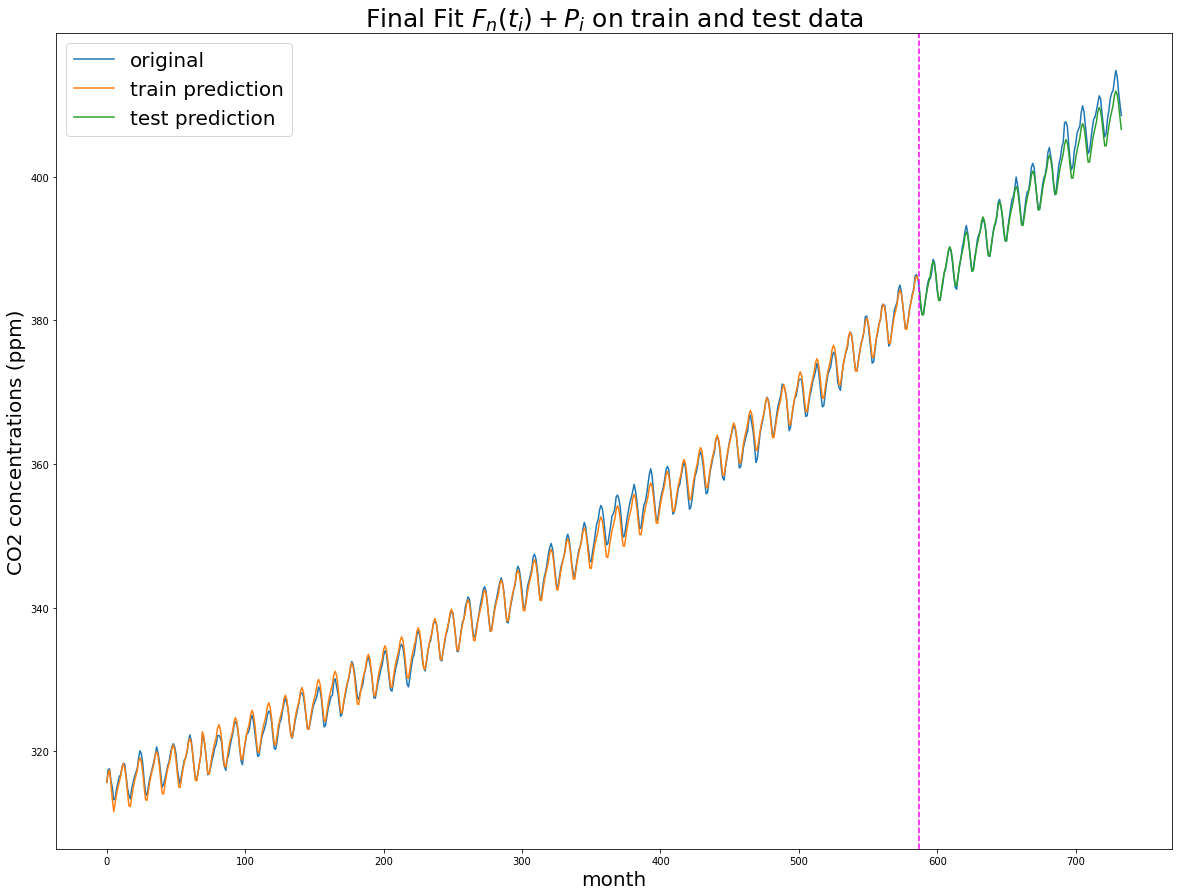

In [137]:
plt.figure(figsize=(20,15))
plt.plot(range(len(df1)), df1['C'], label='original')
plt.plot(range(ntrain), df1['pred'][:ntrain], label='train prediction')
plt.plot(range(ntrain, len(df1)), df1['pred'][ntrain:], label='test prediction')
plt.xlabel('month', size=20)
plt.ylabel('CO2 concentrations (ppm)', size=20)
plt.axvline(ntrain, ls='--', color='magenta')
plt.title(r'Final Fit $F_n(t_i)+P_i$ on train and test data', size=25)
plt.legend(prop={'size': 20})
plt.show()

In [138]:
mse(df1[ntrain:]['C'], df1[ntrain:]['pred'], squared=False), mape(df1[ntrain:]['C'], df1[ntrain:]['pred'])

(1.1493602690794402, 0.0020859165947991)

In [143]:
rF = df1['trend'].max() - df1['trend'].min()
aP = 3
R = df1['C'] - df1['pred']
rR = R.max() - R.min()
rF, aP, rR, rF / aP, aP / rR

(95.47089096434252,
 3,
 4.716444703651803,
 31.823630321447506,
 0.636072335943468)

In [ ]:
plt.plot(p.index, p.values)

In [67]:
t1 = np.column_stack((t,t**2,t**3))
reg = LinearRegression().fit(t1[:ntrain], f1[:ntrain])

In [71]:
reg.intercept_, ['{:.06f}'.format(x) for x in reg.coef_] #np.round(reg.coef_,4)

(314.8585261562891, ['0.624895', '0.020958', '-0.000118'])

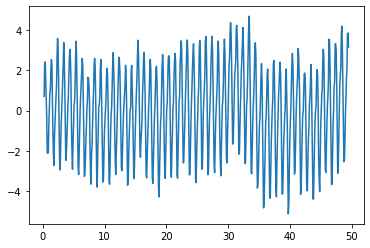

In [69]:
plt.plot(t1[:ntrain,0], f1[:ntrain] - reg.predict(t1[:ntrain,:]))

In [70]:
f1_pred = reg.predict(t1[ntrain:,:])
mse(f1[ntrain:], f1_pred, squared=False), mape(f1[ntrain:], f1_pred)

(4.1493707121348695, 0.008483502723897437)

In [148]:
df = pd.read_csv('Module4/CPI.csv')
df.head()

date    CPI
0  7/24/2008  100.0
1  7/25/2008  100.0
2  7/26/2008  100.0
3  7/27/2008  100.0
4  7/28/2008  100.0

In [149]:
#df.dtypes
mdy = df.date.str.split('/', expand=True)
df['month'], df['day'], df['year'] = mdy[0].astype(int), mdy[1].astype(int), mdy[2].astype(int)
df['date'] = pd.to_datetime(df['date'])
df.head()

date    CPI  month  day  year
0 2008-07-24  100.0      7   24  2008
1 2008-07-25  100.0      7   25  2008
2 2008-07-26  100.0      7   26  2008
3 2008-07-27  100.0      7   27  2008
4 2008-07-28  100.0      7   28  2008

In [150]:
df1 = df.groupby(['year', 'month'])['date', 'CPI'].nth(0).reset_index() #.mean().reset_index()
df1.head()

year  month       date        CPI
0  2008      7 2008-07-24  100.00000
1  2008      8 2008-08-01  100.52510
2  2008      9 2008-09-01  100.12380
3  2008     10 2008-10-01   99.98538
4  2008     11 2008-11-01   98.97539

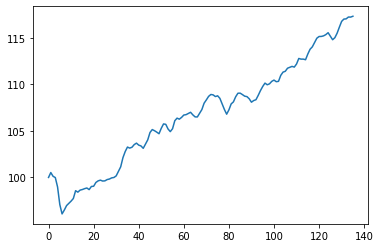

In [151]:
plt.plot(range(len(df1)), df1.CPI)

In [152]:
df1['t'] = df1.index
df1.head()

year  month       date        CPI  t
0  2008      7 2008-07-24  100.00000  0
1  2008      8 2008-08-01  100.52510  1
2  2008      9 2008-09-01  100.12380  2
3  2008     10 2008-10-01   99.98538  3
4  2008     11 2008-11-01   98.97539  4

In [153]:
df_train = df1[df1.date < '2013-09-01']
df_train.tail()

year  month       date       CPI   t
57  2013      4 2013-04-01  106.3789  57
58  2013      5 2013-05-01  106.2683  58
59  2013      6 2013-06-01  106.4575  59
60  2013      7 2013-07-01  106.7130  60
61  2013      8 2013-08-01  106.7551  61

In [154]:
df_test = df1[df1.date >= '2013-09-01']
df_test.head()

year  month       date       CPI   t
62  2013      9 2013-09-01  106.8835  62
63  2013     10 2013-10-01  107.0078  63
64  2013     11 2013-11-01  106.7322  64
65  2013     12 2013-12-01  106.5142  65
66  2014      1 2014-01-01  106.5051  66

In [155]:
df_test.tail()

year  month       date       CPI    t
132  2019      7 2019-07-01  117.0592  132
133  2019      8 2019-08-01  117.2548  133
134  2019      9 2019-09-01  117.2488  134
135  2019     10 2019-10-01  117.3407  135
136  2019     11 2019-11-01       NaN  136

In [156]:
reg = LinearRegression().fit(df_train['t'].values.reshape(-1,1), df_train['CPI'].values)
reg.intercept_, reg.coef_

(96.72932632872504, array([0.16104348]))

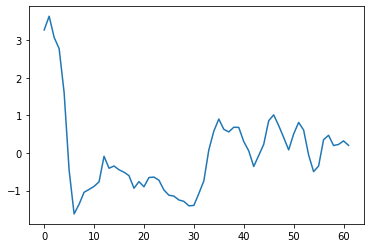

In [157]:
pred = reg.predict(df_train['t'].values.reshape(-1,1))
plt.plot(range(len(pred)), df_train['CPI'].values-pred)

In [158]:
np.max(df_train['CPI'].values-pred)

3.6347301876054416

In [159]:
dtrended = df_train['CPI'].values-pred

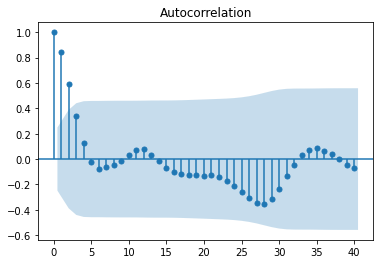

In [160]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(dtrended, lags=40)
plt.show()

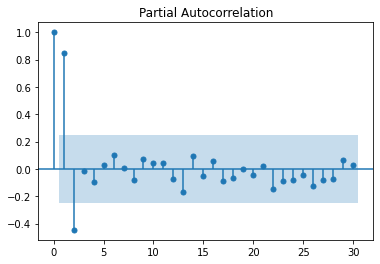

In [161]:
sm.graphics.tsa.plot_pacf(dtrended, lags=30, method="ywm")
plt.show()

In [162]:
len(dtrended)

62

In [163]:
dtrended = pd.Series(dtrended)

In [164]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(dtrended, lags = 2).fit()

In [165]:
#dir(res)

In [166]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:                     AutoReg(2)   Log Likelihood                 -17.470
Method:               Conditional MLE   S.D. of innovations              0.324
Date:                Mon, 15 Nov 2021   AIC                             -2.122
Time:                        02:55:52   BIC                             -1.983
Sample:                             2   HQIC                            -2.068
                                   62                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0431      0.042     -1.024      0.306      -0.126       0.039
y.L1           1.3237      0.098     13.461      0.000       1.131       1.516
y.L2          -0.5308      0.091     -5.824      0.000      -0.709      -0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2469           -0.5738j            1.3726           -0.0686
AR.2            1.2469           +0.5738j            1.3726            0.0686
-----------------------------------------------------------------------------
"""

In [167]:
res.params

intercept   -0.043105
y.L1         1.323666
y.L2        -0.530797
dtype: float64

In [168]:
#dtrended

In [169]:
res.model.predict(res.params, start=62, end=62)

62    0.054016
dtype: float64

In [170]:
len(df_test), len(dtrended)

(75, 62)

In [171]:
res.params[0] + np.sum(res.params[1:].values*dtrended[60:].values[::-1])

0.05401569503557364

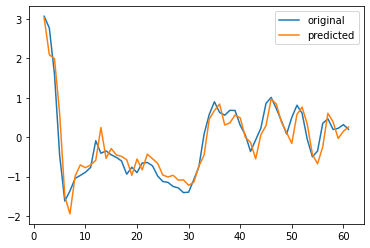

In [172]:
pred = res.model.predict(res.params)
plt.plot(range(2,len(dtrended)), dtrended[2:], label='original')
plt.plot(range(2,len(pred)+2), pred, label='predicted')
plt.legend()
plt.show()

In [173]:
len(dtrended[2:]), len(pred)

(60, 60)

In [174]:
pred = reg.predict(df1['t'].values.reshape(-1,1))
dtrended = pd.Series(df1['CPI'].values - pred)

In [175]:
len(dtrended), len(df_train)

(137, 62)

In [176]:
preds = []
for t in range(62, 137):
    p = reg.predict(np.array([t]).reshape(-1,1))[0]
    preds.append(p + res.params[0] + np.sum(res.params[1:].values*dtrended[t-2:t].values[::-1]))

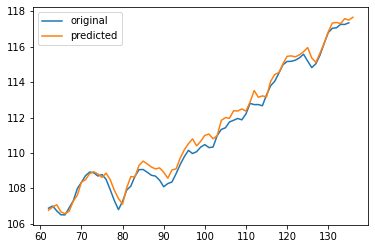

In [177]:
plt.plot(range(62,len(df_test)+62), df_test['CPI'].values, label='original')
plt.plot(range(62,len(preds)+62), preds, label='predicted')
plt.legend()
plt.show()

In [178]:
mse(df_test['CPI'].values.tolist()[:-1], preds[:-1], squared=False)

0.3910404306996487

In [179]:
len(df_test), len(preds)

(75, 75)

In [180]:
df_test['CPI'].values.dtype, type(preds)

(dtype('float64'), list)

In [181]:
df_test['CPI'].values

array([106.8835, 107.0078, 106.7322, 106.5142, 106.5051, 106.9013,
       107.2966, 107.9876, 108.3436, 108.722 , 108.9245, 108.882 ,
       108.7001, 108.7819, 108.5086, 107.9227, 107.3108, 106.8058,
       107.2696, 107.9081, 108.1275, 108.6786, 109.0593, 109.0666,
       108.9121, 108.7426, 108.6937, 108.4643, 108.0936, 108.2723,
       108.3614, 108.828 , 109.344 , 109.7864, 110.147 , 109.9687,
       110.0697, 110.3343, 110.4719, 110.3001, 110.3362, 110.9792,
       111.3283, 111.4188, 111.7492, 111.8447, 111.9462, 111.869 ,
       112.2039, 112.798 , 112.7268, 112.7295, 112.6632, 113.277 ,
       113.7907, 114.048 , 114.5013, 114.9775, 115.1608, 115.1685,
       115.2325, 115.3664, 115.5703, 115.1832, 114.8153, 115.0342,
       115.5204, 116.1721, 116.7873, 117.0359, 117.0592, 117.2548,
       117.2488, 117.3407,      nan])

In [182]:
cpi1, cpi2 = df1[(df1.year==2013) & (df1.month <= 2)]['CPI'].values
100*(cpi2 - cpi1) / cpi1, np.log(cpi2) - np.log(cpi1)

(0.2957229296297583, 0.002952865295193341)

In [351]:
#len(df1), len(df_train)
df1['IR'] = np.nan
for i in range(1, len(df1)):
    df1.loc[i, 'IR'] = 100*(np.log(df1.loc[i, 'CPI']) - np.log(df1.loc[i-1, 'CPI']))
df1.head()

year  month       date        CPI  t        IR
0  2008      7 2008-07-24  100.00000  0       NaN
1  2008      8 2008-08-01  100.52510  1  0.523726
2  2008      9 2008-09-01  100.12380  2 -0.400003
3  2008     10 2008-10-01   99.98538  3 -0.138344
4  2008     11 2008-11-01   98.97539  4 -1.015274

Text(0.5, 1.0, 'monthly inflation rate from CPI')

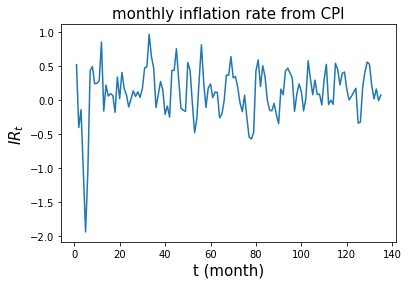

In [352]:
plt.plot(df1['IR'])
plt.xlabel('t (month)', size=15)
plt.ylabel(r'$IR_t$', size=15)
plt.title('monthly inflation rate from CPI', size=15)

In [353]:
df_train = df1[df1.date < '2013-09-01']
df_test = df1[df1.date >= '2013-09-01']
df_train = df_train[~df_train['IR'].isna()]
len(df_train), len(df_test)

(61, 75)

In [354]:
reg = LinearRegression().fit(df_train['t'].values.reshape(-1,1), df_train['IR'].values)
reg.intercept_, reg.coef_

(-0.06427097234449808, array([0.00553001]))

<AxesSubplot:xlabel='t', ylabel='IR'>

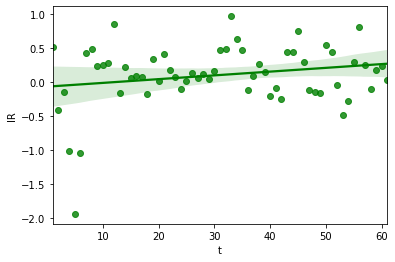

In [355]:
import seaborn as sns
sns.regplot(x='t', y='IR', data=df_train, color="g")

In [356]:
pred = reg.predict(df_train['t'].values.reshape(-1,1))
detrended = df_train['IR'].values - pred

In [357]:
len(pred), len(detrended)

(61, 61)

Text(0.5, 1.0, 'Detrended monthly inflation rate')

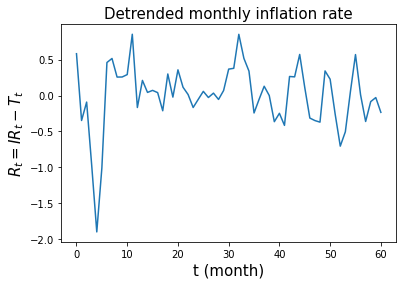

In [358]:
plt.plot(range(len(detrended)), detrended)
plt.xlabel('t (month)', size=15)
plt.ylabel(r'$R_t=IR_t-T_t$', size=15)
plt.title('Detrended monthly inflation rate', size=15)

In [222]:
detrended = detrended[:-1]

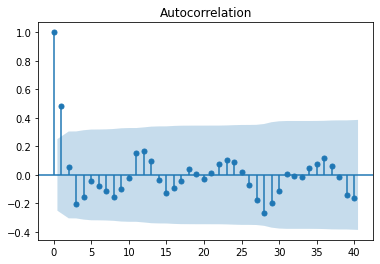

In [359]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(detrended, lags=40)
plt.show()

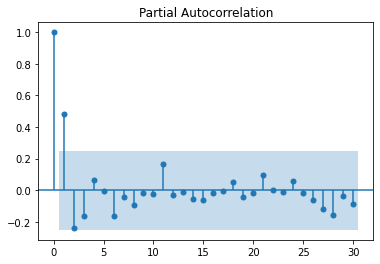

In [360]:
sm.graphics.tsa.plot_pacf(detrended, lags=30, method="ywm")
plt.show()

In [361]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(detrended, lags = 1).fit()

In [362]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:                     AutoReg(1)   Log Likelihood                 -27.682
Method:               Conditional MLE   S.D. of innovations              0.384
Date:                Tue, 16 Nov 2021   AIC                             -1.815
Time:                        01:36:29   BIC                             -1.710
Sample:                             1   HQIC                            -1.774
                                   61                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0116      0.050     -0.234      0.815      -0.109       0.086
y.L1           0.4876      0.111      4.396      0.000       0.270       0.705
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0509           +0.0000j            2.0509            0.0000
-----------------------------------------------------------------------------
"""

In [363]:
res.params

array([-0.01160626,  0.48758776])

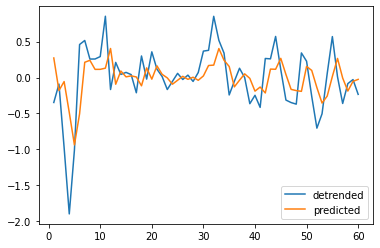

In [364]:
pred = res.model.predict(res.params)
plt.plot(range(1,len(detrended)), detrended[1:], label='detrended')
plt.plot(range(1,len(pred)+1), pred, label='predicted')
plt.legend()
plt.show()

In [365]:
len(pred), len(dtrended), len(df_train)

(60, 135, 61)

In [366]:
pred = reg.predict(df1['t'].values.reshape(-1,1))
detrended = pd.Series(df1['IR'].values - pred)
len(pred), len(detrended), len(df_train)

(137, 137, 61)

In [367]:
preds = []
for t in range(61, 135):
    p = reg.predict(np.array([t]).reshape(-1,1))[0]
    preds.append(p + res.params[0] + res.params[1]*detrended[t-1])

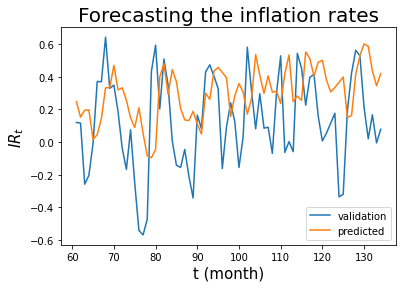

In [368]:
plt.plot(range(61,len(df_test)+61), df_test['IR'].values, label='validation')
plt.plot(range(61,len(preds)+61), preds, label='predicted')
plt.legend()
plt.xlabel('t (month)', size=15)
plt.ylabel(r'$IR_t$', size=15)
plt.title('Forecasting the inflation rates', size=20)
plt.show()

In [369]:
detrended = detrended[~np.isnan(detrended)]
len(detrended)

135

In [370]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
res = AutoReg(detrended, lags = 1).fit()
preds1 = []
for t in range(61, 135):
    p = reg.predict(np.array([t]).reshape(-1,1))[0]
    preds1.append(p + res.params[0] + res.params[1]*detrended[t-1])

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [371]:
res = AutoReg(detrended, lags = 2).fit()
preds2 = []
for t in range(62, 135):
    p = reg.predict(np.array([t]).reshape(-1,1))[0]
    preds2.append(p + res.params[0] + np.sum(res.params[1:]*detrended.values[t-2:t][::-1]))

C:\Users\Sandipan.Dey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


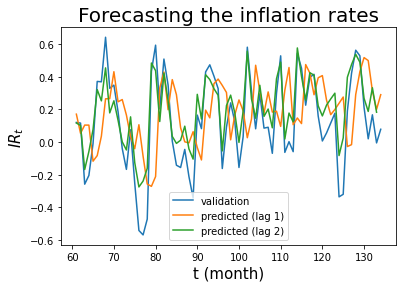

In [372]:
plt.plot(range(61,len(df_test)+61), df_test['IR'].values, label='validation')
plt.plot(range(61,len(preds1)+61), preds1, label='predicted (lag 1)')
plt.plot(range(61,len(preds2)+61), preds2, label='predicted (lag 2)')
plt.legend()
plt.xlabel('t (month)', size=15)
plt.ylabel(r'$IR_t$', size=15)
plt.title('Forecasting the inflation rates', size=20)
plt.show()

In [373]:
len(df_train), len(df1)
detrended = detrended.values

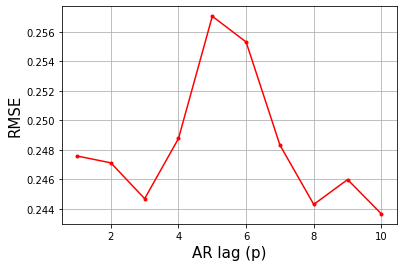

In [374]:
lags = range(1,11)
rmses = []
for lag in lags:
    res = AutoReg(detrended, lags = lag).fit()
    preds = []
    for t in range(len(df_train)+lag, len(df1)-2):
        p = reg.predict(np.array([t]).reshape(-1,1))[0]
        preds.append(p + res.params[0] + np.sum(res.params[1:]*detrended[t-lag:t][::-1]))
    rmses.append(mse(df_test['IR'].values[lag:-1], preds, squared=False))
plt.plot(range(1,11), rmses, 'r.-')
plt.xlabel('AR lag (p)', size=15)
plt.ylabel('RMSE', size=15)
plt.grid()
plt.show()

In [375]:
df = pd.read_csv('Module4/T10YIE.csv')
df.head(20)

DATE  T10YIE
0   2003-01-02    1.64
1   2003-01-03    1.62
2   2003-01-06    1.63
3   2003-01-07    1.62
4   2003-01-08    1.71
5   2003-01-09    1.78
6   2003-01-10    1.75
7   2003-01-13    1.77
8   2003-01-14    1.76
9   2003-01-15    1.80
10  2003-01-16    1.79
11  2003-01-17    1.80
12  2003-01-20     NaN
13  2003-01-21    1.78
14  2003-01-22    1.72
15  2003-01-23    1.78
16  2003-01-24    1.80
17  2003-01-27    1.82
18  2003-01-28    1.81
19  2003-01-29    1.85

df.dtypes

In [376]:
mdy = df.DATE.str.split('-', expand=True)
df['year'], df['month'], df['day'] = mdy[0].astype(int), mdy[1].astype(int), mdy[2].astype(int)
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

DATE  T10YIE  year  month  day
0 2003-01-02    1.64  2003      1    2
1 2003-01-03    1.62  2003      1    3
2 2003-01-06    1.63  2003      1    6
3 2003-01-07    1.62  2003      1    7
4 2003-01-08    1.71  2003      1    8

In [377]:
df2 = df.groupby(['year', 'month'])['DATE', 'T10YIE'].nth(-1).reset_index() #.mean().reset_index()
df2['T10YIE'] = 100*((df2['T10YIE']/100 + 1)**(1/12) - 1)
df2.head()

year  month       DATE    T10YIE
0  2003      1 2003-01-31  0.149596
1  2003      2 2003-02-28  0.160247
2  2003      3 2003-03-31  0.148777
3  2003      4 2003-04-30  0.143036
4  2003      5 2003-05-30  0.132365

In [96]:
df2[(df2.year==2013) & (df2.month <= 2)]['T10YIE'].values

array([0.21331282, 0.20842735])

In [341]:
df2_train = df2[df2.DATE < '2013-09-01']
df2_test = df2[df2.DATE >= '2013-09-01']

In [350]:
df_test['IR'].values, df2_test['T10YIE'].values

(array([ 0.12020301,  0.11622727, -0.25788355, -0.20445839, -0.00854383,
         0.37131075,  0.36909834,  0.64194434,  0.32912527,  0.34865072,
         0.18608161, -0.03902547, -0.16720129,  0.07522462, -0.25155278,
        -0.54142024, -0.56859332, -0.47170648,  0.43330595,  0.59346473,
         0.20311474,  0.50838162,  0.34968684,  0.00669338, -0.14175699,
        -0.15575132, -0.04497869, -0.21127482, -0.34235681,  0.16518318,
         0.08225867,  0.42967172,  0.47302217,  0.40377839,  0.32791775,
        -0.16200574,  0.09180216,  0.24010465,  0.1246342 , -0.15563571,
         0.03272354,  0.58107281,  0.31406973,  0.08125808,  0.29610002,
         0.08542273,  0.09070968, -0.06898549,  0.2989208 ,  0.52808566,
        -0.06314162,  0.00239514, -0.05883066,  0.54333094,  0.45246495,
         0.22586164,  0.39667642,  0.41502804,  0.15929555,  0.00668608,
         0.05555532,  0.1161324 ,  0.17658523, -0.33550985, -0.3199154 ,
         0.19047252,  0.42176623,  0.56255746,  0.5

In [382]:
len(df_train)

61

In [378]:
preds = preds1

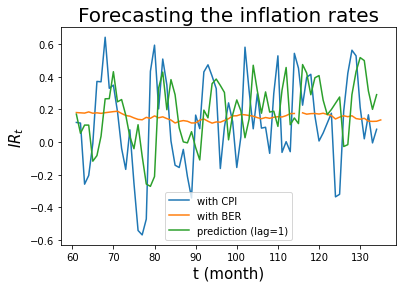

In [385]:
plt.plot(range(len(df_train),len(df_train) + len(df_test)), df_test['IR'].values, label='with CPI')
plt.plot(range(len(df_train),len(df_train) + len(df2_test)), df2_test['T10YIE'].values, label='with BER')
plt.plot(range(len(df_train),len(df_train) + len(preds)), preds, label='prediction (lag=1)')
plt.legend()
plt.xlabel('t (month)', size=15)
plt.ylabel(r'$IR_t$', size=15)
plt.title('Forecasting the inflation rates', size=20)
plt.show()

In [538]:
cpi, ber = df_train['IR'].values, df2_train['T10YIE'][-len(df_train['IR']):].values
nan_indices = np.array(np.argwhere(np.isnan(cpi)).ravel().tolist() + np.argwhere(np.isnan(ber)).ravel().tolist())
print(nan_indices, len(cpi), len(ber))
cpi, ber = np.delete(cpi, nan_indices), np.delete(ber, nan_indices)

[21 55] 61 61


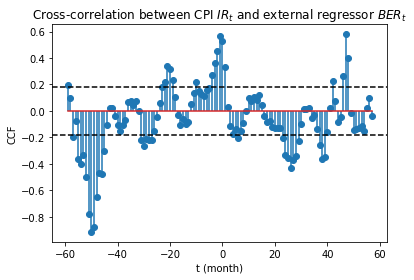

In [540]:
import statsmodels.tsa.stattools as smt
forwards = smt.ccf(cpi, ber)
backwards = smt.ccf(ber, cpi)[::-1]
ccf_output = np.r_[backwards[:-1], forwards]
#from statsmodels.tsa.stattools import ccf
#cc = ccf(cpi, ber)
plt.stem(range(-len(ccf_output) // 2, len(ccf_output) // 2), ccf_output)
plt.axhline(-1.96/np.sqrt(len(ccf_output)), color='k', ls='--') # 95% confidence intervals
plt.axhline(1.96/np.sqrt(len(ccf_output)), color='k', ls='--')
plt.xlabel('t (month)')
plt.ylabel('CCF')
plt.title(r'Cross-correlation between CPI $IR_t$ and external regressor $BER_t$')
plt.show()

In [459]:
cpi, ber = df1['IR'].values, df2['T10YIE'][-len(df1['IR']):].values
nan_indices = np.array(np.argwhere(np.isnan(cpi)).ravel().tolist() + np.argwhere(np.isnan(ber)).ravel().tolist())
print(nan_indices, len(cpi), len(ber))
cpi, ber = np.delete(cpi, nan_indices), np.delete(ber, nan_indices)

[  0 136  22  56 116] 137 137


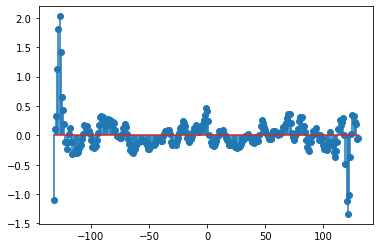

In [460]:
import statsmodels.tsa.stattools as smt
forwards = smt.ccf(cpi, ber)
backwards = smt.ccf(ber, cpi)[::-1]
ccf_output = np.r_[backwards[:-1], forwards]
#from statsmodels.tsa.stattools import ccf
#cc = ccf(cpi, ber)
plt.stem(range(-len(ccf_output) // 2, len(ccf_output) // 2), ccf_output)
plt.show()

In [428]:
np.argmax(np.abs(ccf_output)) -len(ccf_output) // 2

-49

In [429]:
np.argmax(ccf_output) -len(ccf_output) // 2

48

In [503]:
import statsmodels
m = statsmodels.tsa.statespace.sarimax.SARIMAX(cpi, ber, order=(1,0,0), trend='t').fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -25.813
Date:                Tue, 16 Nov 2021   AIC                             59.625
Time:                        03:45:14   BIC                             67.935
Sample:                             0   HQIC                            62.869
                                 - 59                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0034      0.005     -0.720      0.472      -0.013       0.006
x1             2.2789      1.804      1.264      0.206      -1.256       5.814
ar.L1          0.5133      0.076      6.739      0.000       0.364       0.663
sigma2         0.1397      0.019      7.275      0.000       0.102       0.177
===================================================================================
Ljung-Box (Q):                       32.04   Jarque-Bera (JB):                16.83
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -0.64
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [504]:
len(df2_test['T10YIE'].values), len(df_train)

(75, 61)

In [505]:
m.params

array([-0.0033742 ,  2.27888967,  0.51329143,  0.13972444])

In [489]:
test = df2_test['T10YIE'].values
test[np.isnan(test)] = 0

In [491]:
pred = m.predict(61,133, exog=test, dynamic=False)[1:]
pred

array([ 0.00129295, -0.02558183, -0.02760755, -0.04233888, -0.04013914,
       -0.03971752, -0.03925382, -0.04062979, -0.07922016, -0.11412162,
       -0.13038677, -0.16159666, -0.18909324, -0.20163801, -0.17492386,
       -0.19493516, -0.16825416, -0.20132621, -0.19518515, -0.22640428,
       -0.25390927, -0.30204786, -0.28649447, -0.28219326, -0.29848712,
       -0.32977864, -0.33483656, -0.30430936, -0.29440715, -0.3331506 ,
       -0.36631706, -0.35638138, -0.36706142, -0.34964848, -0.33226409,
       -0.29997544, -0.3050423 , -0.29332586, -0.30585154, -0.32210921,
       -0.33837109, -0.36584275, -0.38772565, -0.37784012, -0.39598345,
       -0.38796997, -0.38743362, -0.3981005 , -0.38636897, -0.36533676,
       -0.37040647, -0.77608322, -0.37495943, -0.40052117, -0.40000024,
       -0.40506995, -0.4194556 , -0.41520986, -0.43891246, -0.46076312,
       -0.5162534 , -0.49702558, -0.48529237, -0.50528944, -0.49915776,
       -0.54530827, -0.56158948, -0.55543544, -0.60165314, -0.61

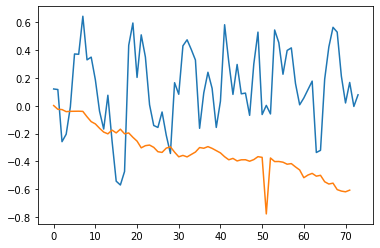

In [495]:
plt.plot(df_test['IR'].values)
plt.plot(pred)

In [521]:
cpi_train, ber_train = cpi, ber # df_train, df2_train
cpi_test, ber_test = df_test, df2_test

In [522]:
# one-step forecasting with SARIMAX
kwargs = {'order': (1, 0, 0), 'trend':'t'}
m = statsmodels.tsa.statespace.sarimax.SARIMAX(cpi_train, ber_train, order=(1,0,0), trend='t').fit()
params = m.params
preds = []
i = 0
while i < len(df_test):
    x_last_obs = m.data.endog[-1]
    x_new_obs= cpi_test['IR'].values[i]
    x = [x_last_obs, x_new_obs]
    y_last_obs = m.data.exog[-1][0]
    y_new_obs= ber_test['T10YIE'].values[i]
    y = [y_last_obs, y_new_obs]
    #print(x)
    #print(y)
    m = statsmodels.tsa.statespace.sarimax.SARIMAX(x, exog=y, **kwargs)
    res = m.filter(params)
    pred = res.predict()[-1]
    preds.append(pred)
    params = res.params
    i += 1

In [523]:
len(preds)

75

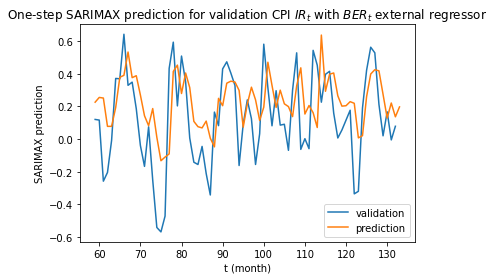

In [532]:
plt.plot(range(len(cpi_train), len(cpi_train) + len(preds)), cpi_test['IR'].values, label='validation')
plt.plot(range(len(cpi_train), len(cpi_train) + len(preds)), preds, label='prediction')
plt.xlabel('t (month)')
plt.ylabel('SARIMAX prediction')
plt.title(r'One-step SARIMAX prediction for validation CPI $IR_t$ with $BER_t$ external regressor')
plt.legend()
plt.show()

In [537]:
mse(cpi_test['IR'].values[:-1], preds[:-1], squared=False)

0.26206187212253684

In [481]:
?m.predict

$cov(X_t,X_t)$

$=cov(W_t+\theta W_{t-1},W_t+\theta W_{t-1})$

$=var(W_t)+2\theta cov(W_t,W_{t-1})+\theta^2 var(W_{t-1})$

$=\sigma^2+0+\theta^2\sigma^2$

$=(1+\theta^2)\sigma^2$

$cov(X_t,X_{t-1})$

$=cov(W_t+\theta W_{t-1},W_{t-1}+\theta W_{t-2})$

$=cov(W_t,W_{t-1})+\theta cov(W_t,W_{t-2})+\theta var(W_{t-1})+\theta^2 cov(W_{t-1},W_{t-2})$

$=0+0+\theta\sigma^2+0$

$=\theta\sigma^2$

$cov(X_t,X_{t-k})=0,\; \forall{k} \geq 2$

By the stationarity assumption, we have $E[X_t]=E[X_{t-1}]$,

$\implies E[X_t]$

$=E[\phi X_{t-1}+W_t]$

$=\phi E[X_{t-1}]+E[W_t]$, by the linearity of expectation 

$= \phi E[X_{t-1}]$, by the property of white noise, mean being $0$

$=E[X_{t-1}]$

$\implies (1-\phi)E[X_{t-1}]=0$

$\implies E[X_t]=E[X_{t-1}]=0$, since $|\phi|<1$

Again, by the stationarity assumption, we have $Var(X_t)=Var(X_{t-1})$,

$\implies Var(X_t)$

$=Var(\phi X_{t-1}+W_t)$

$=\phi^2 Var(X_{t-1})+Var(W_t)$, by the independence of white noise error with the signal

$=\phi^2 Var(X_{t})+\sigma^2$, by the stationarity assumption

$\implies var(X_t)=\frac{\sigma^2}{1-\phi^2}$, since $|\phi|<1$

Finally, 

autocovariance with lag $1$  

$=\gamma_1 = cov(X_t, X_{t-1})$

$=cov(\phi X_{t-1} + W_t, X_{t-1})$

$= \phi var(X_{t-1}) + 0$, since white noise is independent with signal

$= \phi var(X_{t})$, by stationarity

$=\phi \sigma^2$

autocovariance with lag $2$  

$=\gamma_2 = cov(X_t, X_{t-2})$

$=cov(\phi X_{t-1} + W_t, X_{t-2})$

$=cov(\phi^2 X_{t-2} + \phi W_{t-1} + W_t, X_{t-2})$

$= \phi^2 var(X_{t-2}) + 0$, since white noise is independent with signal

$= \phi^2 var(X_{t})$, by stationarity

$=\phi^2 \sigma^2$

and in general, autocovariance with lag $h$  

$=\gamma_h = cov(X_t, X_{t-h})$

$=cov(\phi^h X_{t-h} + \phi W_{t-h+1} + \ldots + \phi W_{t-1} + W_t, X_{t-2})$

$= \phi^h var(X_{t-h}) + 0$, since white noise is independent with signal

$= \phi^h var(X_{t})$, by stationarity

$\implies \gamma_h =\phi^h \sigma^2$, $\forall{h} \geq 1$

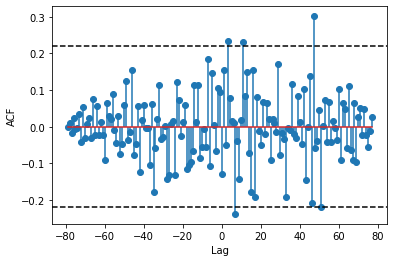

In [444]:
np.random.seed(123)
test = pd.DataFrame(np.random.randint(0,25,size=(79, 2)), columns=list('AB'))
backwards = smt.ccf(test['B'], test['A'], unbiased=False)[::-1]
forwards = smt.ccf(test['A'], test['B'], unbiased=False)
ccf_output = np.r_[backwards[:-1], forwards]
plt.stem(range(-len(ccf_output)//2, len(ccf_output)//2), ccf_output)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.axhline(-1.96/np.sqrt(len(test)), color='k', ls='--') # 95% confidence intervals
plt.axhline(1.96/np.sqrt(len(test)), color='k', ls='--')

In [436]:
ccf_output

array([-0.08332849,  0.35242555, -0.46961551,  0.48326079, -0.10959246,
       -0.03277117,  0.3860862 , -0.41689779,  0.4675794 , -0.25343854,
        0.04926884,  0.15209418, -0.18316957,  0.42191014, -0.1240974 ,
        0.27395469, -0.1066736 ,  0.06252857, -0.09423143, -0.35502968,
        0.23944459,  0.10796849,  0.06831187,  0.29314588, -0.03174064,
       -0.13266195,  0.08522283, -0.21250233, -0.13070823,  0.15816752,
        0.31616449, -0.08983997, -0.03589888,  0.35980106, -0.17346636,
       -0.10489881,  0.12334928, -0.2587255 ,  0.03940565,  0.11823047,
       -0.00440778, -0.00884817, -0.19156338,  0.11044643, -0.31376543,
       -0.10103655,  0.03474284,  0.18563585, -0.05502041, -0.04488231,
        0.00503043, -0.21672639, -0.19493159,  0.01214624,  0.02076262,
       -0.1856041 ,  0.1680639 ,  0.09797356, -0.03361028,  0.01608206,
        0.07853543, -0.14561592, -0.13273206, -0.11887661, -0.08195677,
        0.13591965,  0.01595513,  0.13153419, -0.09838894, -0.06

In [437]:
ccf_output = smt.ccf(test['A'],test['B'], unbiased=False)
ccf_output

array([ 0.09447372, -0.12810284,  0.15581492, -0.05123683,  0.23403344,
        0.0771812 ,  0.01434263,  0.00986775, -0.23812752, -0.03996113,
       -0.14383829,  0.0178347 ,  0.23224969,  0.0829421 ,  0.14981321,
       -0.07094772, -0.17713121,  0.15377192, -0.19161986,  0.08006699,
       -0.01044449, -0.04913098,  0.06682942, -0.02087582,  0.06453489,
        0.01995989, -0.08961562,  0.02076603,  0.01085041, -0.01357792,
        0.17009109, -0.07586774, -0.0183845 , -0.0327533 , -0.19266634,
       -0.00433252, -0.00915397,  0.11568826, -0.02069836, -0.03110162,
        0.08500599,  0.01171839, -0.04837527,  0.10352341, -0.14512205,
       -0.00203772,  0.13876788, -0.20846099,  0.30174408, -0.05674962,
       -0.03824093,  0.04494932, -0.21788683,  0.00113469,  0.07381456,
       -0.04039815,  0.06661601, -0.04302084,  0.01624429, -0.00399155,
       -0.0359768 ,  0.10264208, -0.09216649,  0.06391548,  0.04904064,
       -0.05930197,  0.11127125, -0.06346119, -0.08973581,  0.06

In [8]:
def joint_prob(x1, x2):
    return 1/36 if x1 % 2 != 0 else (0 if x2 % 2 == 0 else 1/18)

#for x1 in range(1, 7):
#    print(sum(joint_prob(x1, x2) for x2 in range(1,7)))

#print(sum(joint_prob(x1, x2) for x1 in range(1,7) for x2 in range(1,7)))

Ex1x2 = 0
for x1 in range(1, 7):
    for x2 in range(1, 7):
        p = joint_prob(x1, x2)
        #print(x1, x2, p)
        Ex1x2 += x1*x2*p
Ex1x2

11.250000000000002

In [10]:
import math
xs = [0,1]
ys = [-1,0,1]
Ex, Ey = sum(xs) / len(xs), sum(ys) / len(ys) 
Ex2, Ey2 = sum(map(lambda x:x**2, xs)) / len(xs), sum(map(lambda x:x**2, ys)) / len(ys) 
Vx, Vy = Ex2 - Ex**2, Ey2 - Ey**2
P = {}
P[0,0] = P[1,-1] = P[1,1] = 1/3
Exy = 0
for x in xs:
    for y in ys:
        Exy += P.get((x,y), 0) * x * y
Cxy = Exy - Ex*Exy
Cxy / math.sqrt(Vx) / math.sqrt(Vy)

0.0

In [12]:
Ex, Ey, Vx, Vy, Exy, Cxy

(0.5, 0.0, 0.25, 0.6666666666666666, 0.0, 0.0)

In [15]:
import numpy as np
np.linalg.eig([[11,-3,7,5],[-3,11,5,7],[7,5,11,-3],[5,7,-3,11]])

(array([-4., 12., 20., 16.]),
 array([[-0.5, -0.5,  0.5, -0.5],
        [-0.5,  0.5,  0.5,  0.5],
        [ 0.5,  0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5,  0.5]]))

In [22]:
norm.cdf(56.25, loc=225/4, scale=np.sqrt(75))

0.5

In [21]:
#?norm.cdf

In [23]:
np.log2(4)

2.0

In [25]:
1.5-(-(3/4)*np.log2(3/4)-(1/4)*np.log2(1/4))

0.6887218755408672

In [27]:
x = [1, -1, 2, -2]
px = {i:1/4 for i in x}
Ex = sum(px[i]*i for i in x)
Ex2 = sum(px[i]*i**2 for i in x)
Vx = Ex2 - Ex**2
y = [1, 2]
py = {i:1/2 for i in y}
Ey = sum(py[i]*i for i in y)
Ey2 = sum(py[i]*i**2 for i in y)
Vy = Ey2 - Ey**2
xy = [1, -1, 2, -2]
pxy = {i:1/4 for i in xy}
Exy = sum(pxy[i]*i for i in xy)
Cxy = Exy - Ex*Ey
Cxy / math.sqrt(Vx) / math.sqrt(Vy)

0.0

In [28]:
def log(x):
    return 0 if x <= 0 else math.log2(x)

pxy = {}
pxy[1,1] = pxy[-1,1] = pxy[2,2] = pxy[-2,2] = 1/4
Ixy = sum(pxy.get((i,j),0)*log(pxy.get((i,j),0)/px[i]/py[j]) for i in x for j in y)
Ixy

1.0

In [5]:
import pandas as pd
df = pd.read_csv('Module5\OceanFlow/1u.csv', header=None)
df.head()
dfm = pd.read_csv('Module5\OceanFlow/mask.csv', header=None)
dfm.head()
#mask = dfm.values

0    1    2    3    4    5    6    7    8    9    ...  545  546  547  548  \
0    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
3    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   549  550  551  552  553  554  
0    1    1    1    1    1    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  
3    1    1    1    1    1    1  
4    1    1    1    1    1    1  

[5 rows x 555 columns]

In [79]:
import numpy as np
import pandas as pd
u = np.zeros((100, 504, 555))
v = np.zeros((100, 504, 555))
d = np.zeros((100, 504, 555))
for i in range(1, 101):
    df = pd.read_csv('Module5\OceanFlow/{}u.csv'.format(i), header=None)
    u[i-1] = df.values #* mask
    df = pd.read_csv('Module5\OceanFlow/{}v.csv'.format(i), header=None)
    v[i-1] = df.values #* mask
    d[i-1] = np.sqrt(u[i-1]**2+v[i-1]**2)
    #print(df.shape)
    #df.head()
u.shape, v.shape, d.shape

((100, 504, 555), (100, 504, 555), (100, 504, 555))

In [60]:
a_d = np.var(d, axis=0)
a_d[a_d == 0] = 99
a_d = np.round(a_d, 12)
print(np.unravel_index(a_d.argmin(), a_d.shape))
a_d[120,170]

(121, 170)


99.0

In [74]:
np.where(u == u.max())

(array([28], dtype=int64),
 array([181], dtype=int64),
 array([347], dtype=int64))

In [75]:
3*347, 3*181

(1041, 543)

In [86]:
u.mean(), v.mean()

(-0.09366228934616833, -0.03548388738810676)

In [85]:
vxs, vys = [], []
for t in range(100):
    vx, vy = u[t].mean(), v[t].mean()
    vxs.append(vx)
    vys.append(vy)
np.mean(vxs), np.round(np.mean(vys),3)

(-0.09366228934616816, -0.035)

In [67]:
values = []
for t in range(100):
    x, y = np.unravel_index(np.argmax(u[t]), u[t].shape)
    values.append((u[t,x,y], 3*t, 3*x, 3*y))
max(values)

(5.2006, 84, 813, 1023)

In [69]:
np.where(u[28] == u[28].max())

(array([271], dtype=int64), array([341], dtype=int64))

In [70]:
341*3, 271*3

(1023, 813)

In [44]:
a_d.mean()

25.614388980893814

In [31]:
np.where(a_d == a_d.min())

(array([120], dtype=int64), array([170], dtype=int64))

In [11]:
d = np.sqrt(u**2+v**2)
d.shape

(100, 503, 555)

<AxesSubplot:>

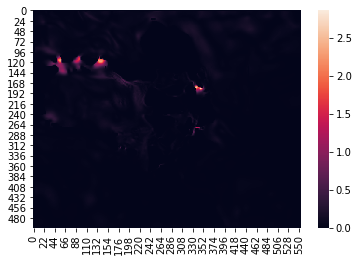

In [19]:
import seaborn as sns
sns.heatmap(a_d)

In [6]:
import numpy as np
import pandas as pd
dfm = pd.read_csv('Module5\OceanFlow/mask.csv', header=None)
dfm.head()
mask = dfm.iloc[::-1].values
u = np.zeros((100, 504, 555))
v = np.zeros((100, 504, 555))
d = np.zeros((100, 504, 555))
for i in range(1, 101):
    df = pd.read_csv('Module5\OceanFlow/{}u.csv'.format(i), header=None)
    u[i-1] = df.values * mask #df.iloc[::-1].values * mask
    df = pd.read_csv('Module5\OceanFlow/{}v.csv'.format(i), header=None)
    v[i-1] = df.values * mask #df.iloc[::-1].values * mask
    d[i-1] = np.sqrt(u[i-1]**2+v[i-1]**2)
    #print(df.shape)
    #df.head()
u.shape, v.shape, d.shape

((100, 504, 555), (100, 504, 555), (100, 504, 555))

In [292]:
mask.shape

(504, 555)

point1: (75, 233), point2: (548, 103), correlation = 0.7063578565736783


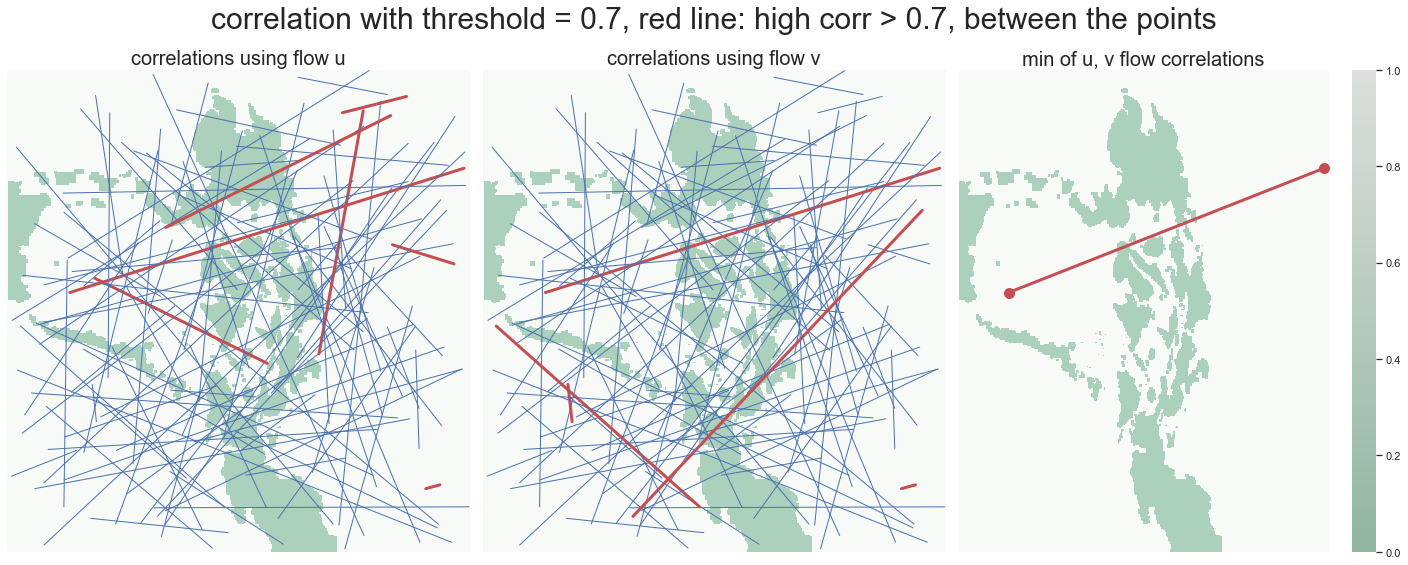

In [294]:
import matplotlib.pylab as plt
import seaborn as sns
np.random.seed(7)
n = 100
thresh = 0.7
cor_u, cor_v = {}, {}
i1s, j1s = np.random.choice(mask.shape[1], n, replace=True), np.random.choice(mask.shape[0], n, replace=True)
i2s, j2s = np.random.choice(mask.shape[1], n, replace=True), np.random.choice(mask.shape[0], n, replace=True)
plt.figure(figsize=(20,8))

pal = sns.light_palette("seagreen", reverse=True, as_cmap=True)
plt.subplot(131), sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None) #u.mean(axis=0)
#sns.set(rc={'axes.facecolor':'lightgrey'})
for k in range(n):
    cor = np.corrcoef(u[:,j1s[k],i1s[k]], u[:,j2s[k],i2s[k]])[0,1]
    cor_u[(j1s[k],i1s[k]), (j2s[k],i2s[k])] = cor
    cor_high = cor > thresh
    plt.plot([i1s[k], i2s[k]], [j1s[k], j2s[k]], 
             color = 'r' if cor_high else 'b', 
             linewidth = 3 if cor_high else 1)
plt.axis('off')
plt.title('correlations using flow u', size=20)
plt.subplot(132), sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None) #v.mean(axis=0)
for k in range(n):
    cor = np.corrcoef(v[:,j1s[k],i1s[k]], v[:,j2s[k],i2s[k]])[0,1]
    cor_v[(j1s[k],i1s[k]), (j2s[k],i2s[k])] = cor
    cor_high = cor > thresh
    ## plot
    plt.plot([i1s[k], i2s[k]], [j1s[k], j2s[k]], 
             color = 'r' if cor_high else 'b', 
             linewidth = 3 if cor_high else 1)
plt.axis('off')
plt.title('correlations using flow v', size=20)
plt.subplot(133), sns.heatmap(mask, cmap=pal, alpha=0.4) #, cmap="seagreen") #np.sqrt(u.mean(axis=0)**2 + v.mean(axis=0)**2)
dist_thresh = 100
for k in range(n):
    cor = min(cor_u[(j1s[k],i1s[k]), (j2s[k],i2s[k])], cor_v[(j1s[k],i1s[k]), (j2s[k],i2s[k])])
    cor_high = cor > thresh
    far_enough = np.sqrt((i1s[k]-i2s[k])**2+(j1s[k]-j2s[k])**2) > dist_thresh
    if cor_high and far_enough:
        print('point1: {}, point2: {}, correlation = {}'.format((i1s[k],j1s[k]), (i2s[k],j2s[k]), cor))
        plt.plot([i1s[k], i2s[k]], [j1s[k], j2s[k]], 
                 marker = 'o' if cor_high else '.',
                 markersize = 10 if cor_high else 1,
                 color = 'r' if cor_high else 'b', 
                 linewidth = 3 if cor_high else 1)
plt.axis('off')
plt.title('min of u, v flow correlations', size=20)
plt.suptitle('correlation with threshold = {}, red line: high corr > {}, between the points'.format(thresh, thresh), size=30)
plt.tight_layout()
plt.show()

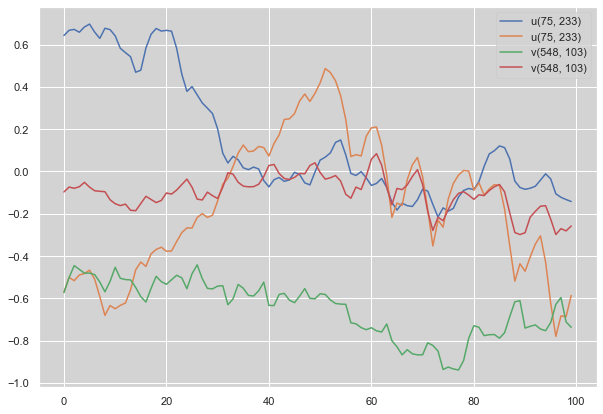

In [283]:
plt.figure(figsize=(10,7))
plt.plot(range(100), u[:,233, 75], label='u(75, 233)')
plt.plot(range(100), v[:,233, 75], label='u(75, 233)')
plt.plot(range(100), u[:,103 ,548], label='v(548, 103)')
plt.plot(range(100), v[:,103 ,548], label='v(548, 103)')
plt.legend()

In [100]:
df = pd.DataFrame({'a':[1,2], 'b':[3,4]})
df.head()
#df.iloc[::-1]

a  b
0  1  3
1  2  4

In [448]:
import matplotlib
norm = matplotlib.colors.Normalize()

def plot_flows_over_time(u, v, mask):
    xx, yy = np.meshgrid(range(0, mask.shape[1], 10), range(0, mask.shape[0], 10))
    for t in range(100):
        plt.figure(figsize=(15,15))
        sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
        #uv = np.sqrt(u[:,yy,xx]**2 + v[:,yy,xx]**2)
        plt.quiver(xx, yy, u[t,yy,xx],v[t,yy,xx], scale=0.1, units='xy', angles='xy',
                   color=[(np.random.random(),np.random.random(),np.random.random()) for _ in range(np.prod(u[t,yy,xx].shape))]) #color=(uv, uv, uv))
        plt.title('T = {} hrs'.format(3*t), size=20)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig('flow_{:03d}.png'.format(t))
        plt.close()
        #for x in range(0, mask.shape[0], 10):
        #    for y in range(0, mask.shape[1], 10):
        #        if not mask[x,y]: continue
        #        if u[0,x,y] or v[0,x,y]:
        #            plt.quiver(x, y, u[0,x,y], v[0,x,y], linewidths=10, scale=0.1, units='xy')
    #plt.show()

plot_flows_over_time(u, v, mask)

15.99999999999996
24.00000000000007
40.0000000000003


(0.0, 555.0, 504.0, 0.0)

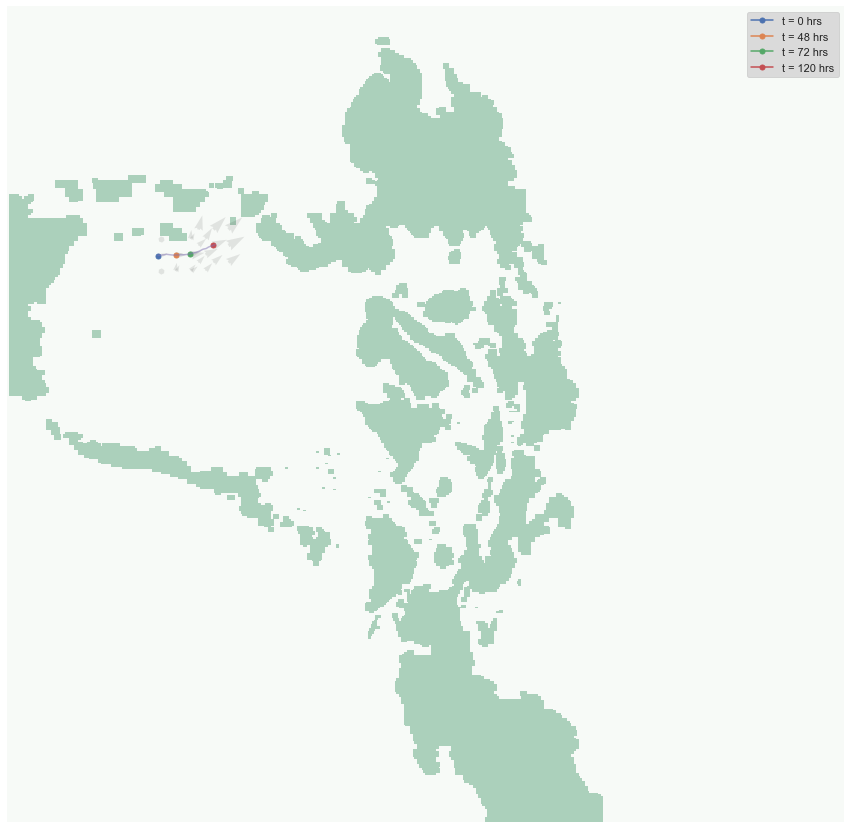

In [458]:
plt.figure(figsize=(15,15))
sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
x, y = 100, 504-350
t = 0
dt = 0.1
plt.plot(x, y, marker='o', markersize=5, label='t = {} hrs'.format(round(3*t)))
sigma = 10
xs, ys = [], []
while t <= 41:
    #print(x,y,t)
    if round(t,2) in [16., 24., 40.]:
        print(t)
        plt.plot(x, y, marker='o', markersize=5, label='t = {} hrs'.format(round(3*t)))
        for xx in [x-10, x, x+10]:
            for yy in [y-10, y, y+10]:
                if not mask[round(yy),round(xx)]: continue
                if u[round(t),round(yy),round(xx)] or v[round(t),round(yy),round(xx)]:
                    plt.quiver(xx, yy, 
                               u[round(t),round(yy),round(xx)], 
                               v[round(t),round(yy),round(xx)], 
                               #linewidths=2, 
                               scale=0.15, 
                               angles='xy',
                               units='xy', #scale_units='xy', 
                               #headlength=0.1, #minshaft=0.5,
                               alpha=0.1)
    x = x + dt*u[round(t), round(y), round(x)]
    y = y + dt*v[round(t), round(y), round(x)]
    xs.append(x)
    ys.append(y)
    t += dt
plt.plot(np.array(xs), np.array(ys), alpha=0.5)
plt.legend()
plt.axis('off')

15.99999999999996
24.00000000000007
40.0000000000003


(0.0, 555.0, 504.0, 0.0)

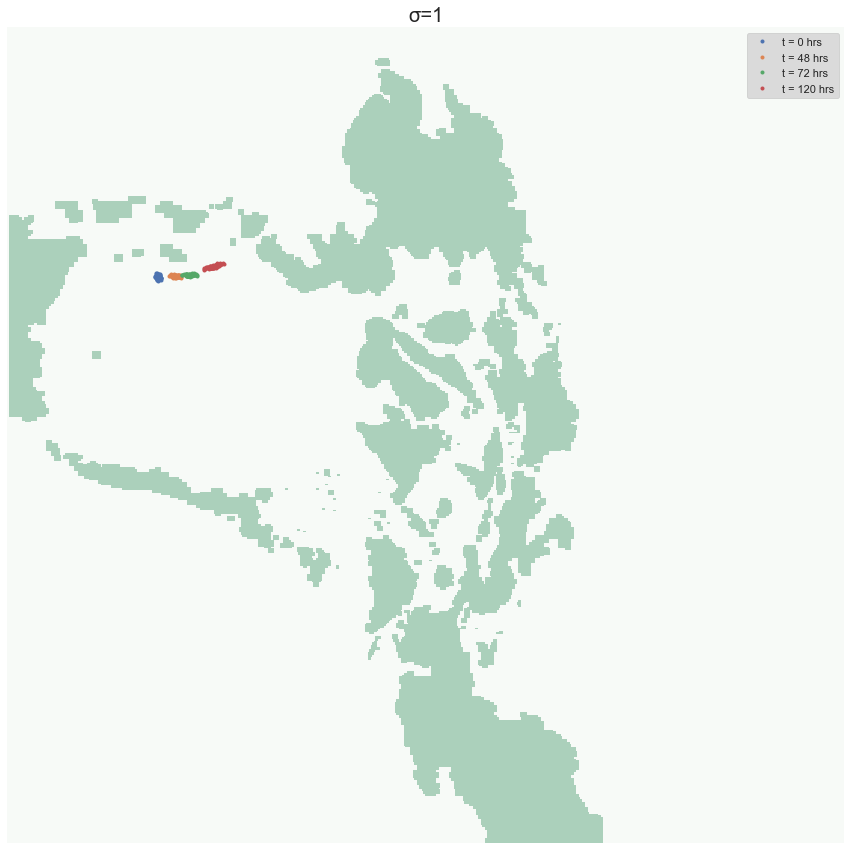

In [463]:
plt.figure(figsize=(15,15))
sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
x, y = 100, 504-350
t = 0
dt = 0.1
σ = 1
n = 100
np.random.seed(1)
xs = np.random.normal(x, σ, n)
ys = np.random.normal(y, σ, n)
plt.plot(xs, ys, '.', label='t = {} hrs'.format(round(3*t)))
#Xs, Ys = {t:xs}, {t:ys}
while t <= 41:
    #print(x,y,t)
    if round(t,2) in [16., 24., 40.]:
        print(t)
        plt.plot(xs, ys, '.', label='t = {} hrs'.format(round(3*t)))
    xs = xs + dt*u[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    ys = ys + dt*v[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    t += dt
#plt.plot(np.array(xs), 504-np.array(ys), alpha=0.4)
plt.legend()
plt.title('σ={}'.format(σ), size=20)
plt.axis('off')

(15, 36, 4)
0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5
10.0
10.5
11.0
11.5
12.0
12.5
13.0
13.5
14.0
14.5
15.0
15.5
16.0
16.5
17.0
17.5
18.0
18.5
19.0
19.5
20.0
20.5
21.0
21.5
22.0
22.5
23.0
23.5
24.0
24.5
25.0
25.5
26.0
26.5
27.0
27.5
28.0
28.5
29.0
29.5
30.0
30.5
31.0
31.5
32.0
32.5
33.0
33.5
34.0
34.5
35.0
35.5
36.0
36.5
37.0
37.5
38.0
38.5
39.0
39.5
40.0
40.5
41.0


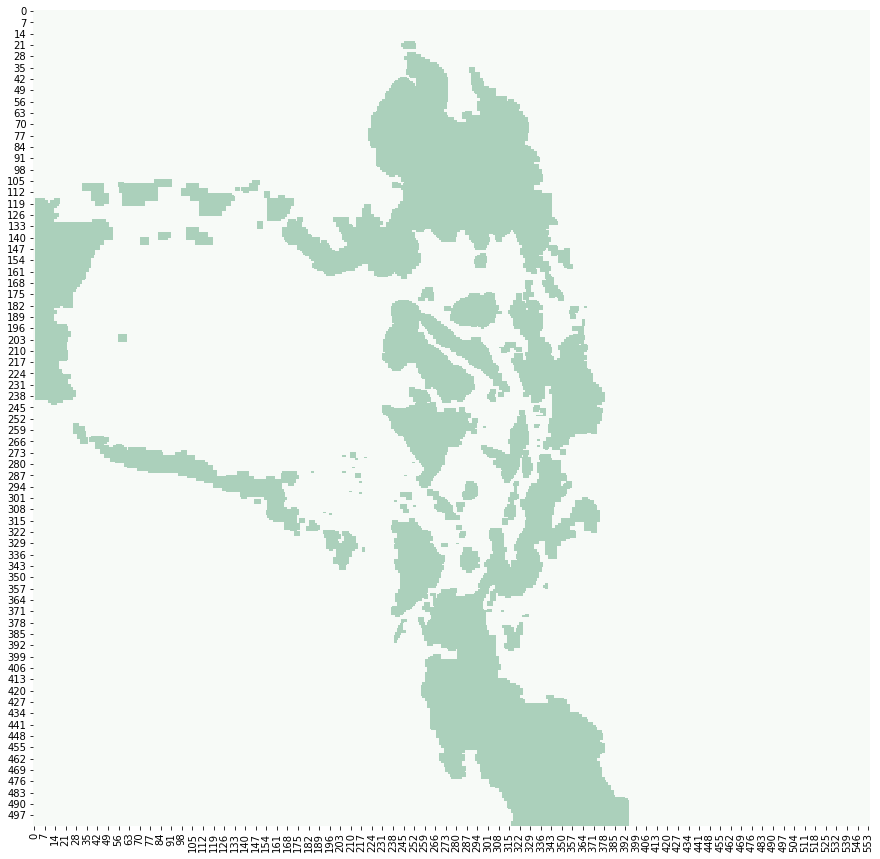

In [41]:
#pal = sns.color_palette("YlOrBr", as_cmap=True)
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
image = plt.imread('Module5/plane.png')
print(image.shape)
pal = sns.light_palette("seagreen", reverse=True, as_cmap=True)
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
x, y = 100, 504-350
t = 0
dt = 0.5
σ = 5
n = 100
np.random.seed(1)
xs = np.random.normal(x, σ, n)
ys = np.random.normal(y, σ, n)
#plt.plot(xs, ys, '.', label='t = {} hrs'.format(round(3*t)))
#Xs, Ys = {t:xs}, {t:ys}
while t <= 41:
    #print(x,y,t)
    print(t)
    plt.figure(figsize=(10,10))
    sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
    for xx in [min(xs)-10, np.mean(xs), max(xs)+10]:
        for yy in [min(ys)-10, np.mean(ys), max(ys)+10]:
            if not mask[round(yy),round(xx)]: continue
            if u[round(t),round(yy),round(xx)] or v[round(t),round(yy),round(xx)]:
                plt.quiver(xx, yy, 
                           u[round(t),round(yy),round(xx)], 
                           v[round(t),round(yy),round(xx)], 
                           #linewidths=2, 
                           scale=0.05, 
                           angles='xy',
                           units='xy', #scale_units='xy', 
                           #headlength=0.1, #minshaft=0.5,
                           alpha=0.25)
    #ax = plt.gca()
    #im = OffsetImage(image, zoom=72/ax.figure.dpi)
    #im.image.axes = ax
    #ab = AnnotationBbox(im, (np.mean(xs), np.mean(ys)), frameon=False, pad=0.0,)
    #ax.add_artist(ab)
    plt.scatter(xs, ys, facecolor='r', edgecolor='k', s=30, label='t = {} hrs'.format(round(3*t)))
    
    xs = xs + dt*u[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    ys = ys + dt*v[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    t += dt
    #plt.plot(np.array(xs), 504-np.array(ys), alpha=0.4)
    #plt.legend()
    plt.grid()
    plt.title('σ={}, debris of the toy plane at time t={:.02f} hrs'.format(σ, 3*t), size=20)
    plt.axis('off')
    plt.savefig('out_{:06.3f}.png'.format(t), transparent=True)
    plt.close()

In [35]:
? AnnotationBbox

15.99999999999996
24.00000000000007
40.0000000000003


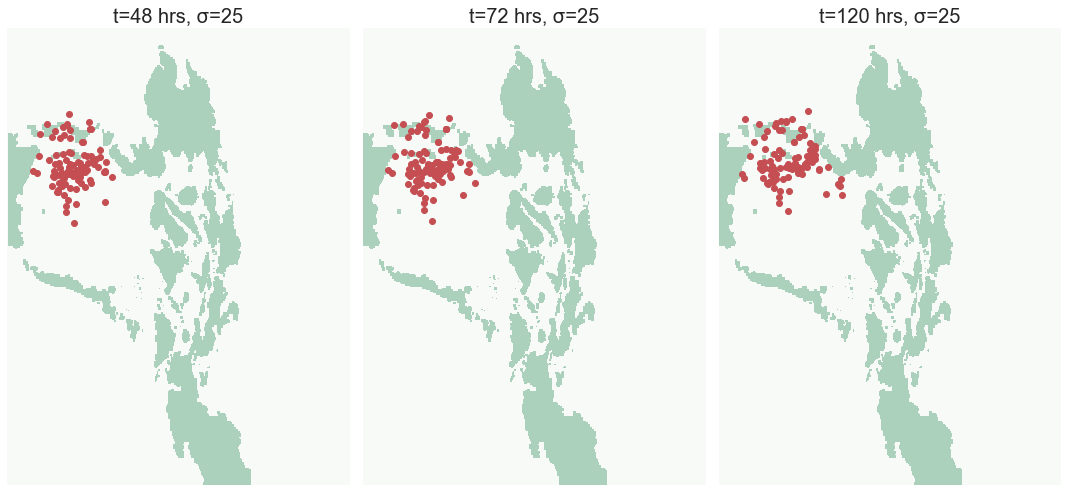

In [462]:
x, y = 100, 504-350
t = 0
dt = 0.1
σ = 25
n = 100
np.random.seed(1)
xs = np.random.normal(x, σ, n)
ys = np.random.normal(y, σ, n)
#plt.plot(xs, 504-ys, '.', label='t = {} hrs'.format(round(3*t)))
#Xs, Ys = {t:xs}, {t:ys}
plt.figure(figsize=(15,7))
i = 0
while t <= 41:
    #print(x,y,t)
    if round(t,2) in [16., 24., 40.]:
        print(t)
        plt.subplot(1,3,i+1), 
        sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
        plt.plot(xs, ys, 'ro') #, label='t = {} hrs'.format(round(3*t)))
        plt.title('t={} hrs, σ={}'.format(round(3*t), σ), size=20)
        plt.axis('off')
        i += 1
    xs = xs + dt*u[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    ys = ys + dt*v[round(t), np.round(ys).astype(int), np.round(xs).astype(int)]
    t += dt
plt.tight_layout()
plt.show()
#plt.plot(np.array(xs), 504-np.array(ys), alpha=0.4)

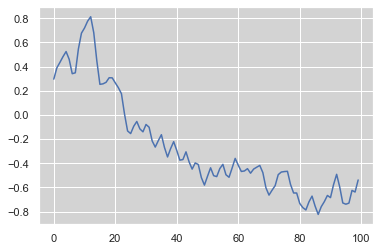

In [464]:
x, y = 100, 504-350
z = u[:,x,y]
plt.plot(range(len(z)), z)

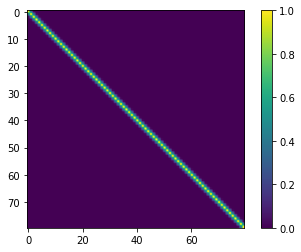

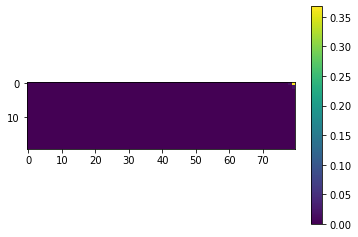

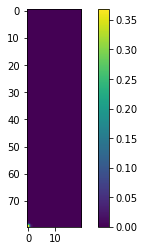

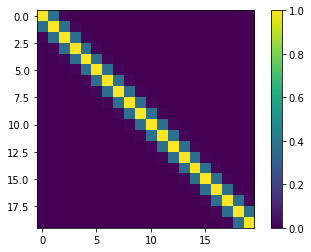

(<matplotlib.image.AxesImage at 0x1938f8a6a48>,
 None)

In [48]:
def compute_sigma(x, y, σ, l):
    Σ = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            Σ[i,j] = σ**2*np.exp(-(x[i]-y[j])**2/l**2)
    return Σ

σ = 1
l = 1
n = 100
k = 80
y1, y2 = z[k:], z[:k]
x2, x1 = range(k), range(k,n)
Σ22 = compute_sigma(x2, x2, σ, l)
plt.imshow(Σ22), plt.colorbar(), plt.show()
Σ12 = compute_sigma(x1, x2, σ, l)
plt.imshow(Σ12), plt.colorbar(), plt.show()
Σ21 = compute_sigma(x2, x1, σ, l)
plt.imshow(Σ21), plt.colorbar(), plt.show()
Σ11 = compute_sigma(x1, x1, σ, l)
plt.imshow(Σ11), plt.colorbar(), plt.show()

In [830]:
τ = 0.001 #0.1 #0.001
μ1, μ2 = np.mean(y1), np.mean(y2)
μ1_2 = μ1 + Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), y2 - μ2)) 
μ1_2

array([-0.54330176, -0.09976819,  0.33696542,  0.61604462,  0.66575727,
        0.51508016,  0.25501957, -0.01884932, -0.24446493, -0.4006712 ])

In [831]:
Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), Σ21)) 
Σ1_2.shape

(10, 10)

In [832]:
504-91

413

81


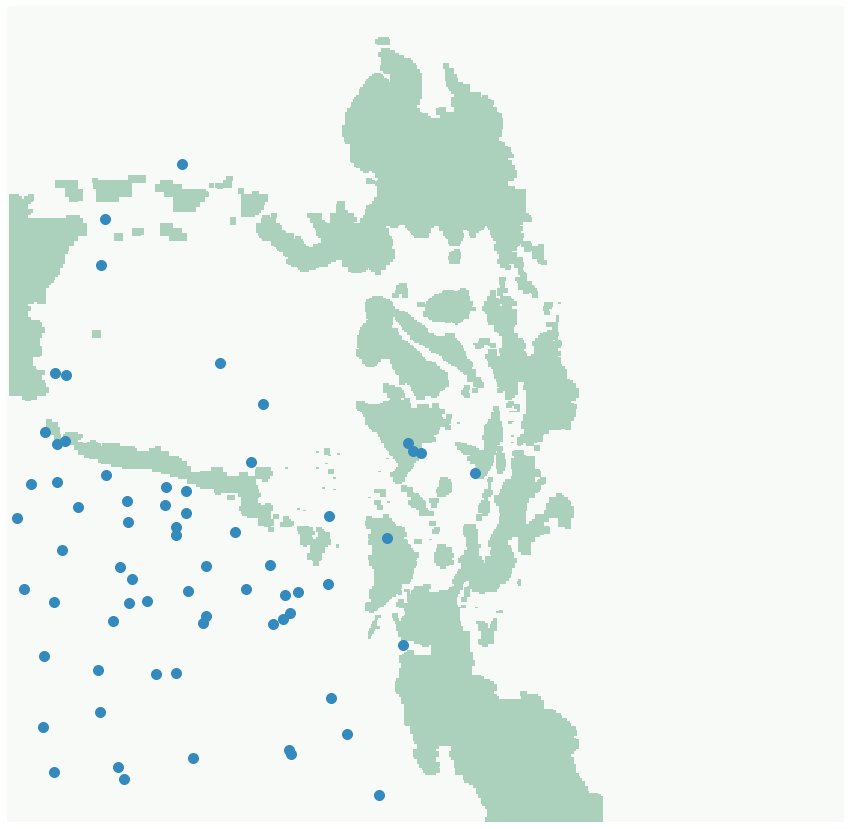

In [1166]:
x1, y1 = 100, 504-350
t = 0
dt = 1
σ = 100
n = 100
np.random.seed(1)
xs = np.random.normal(x1, σ, n)
ys = np.random.normal(y1, σ, n)

ind = []
for i in range(len(xs)):
    if not mask[np.round(xs[i]).astype(int), np.round(ys[i]).astype(int)]:
        ind.append(i)
xs = np.delete(xs, ind)
ys = np.delete(ys, ind)
print(len(xs))

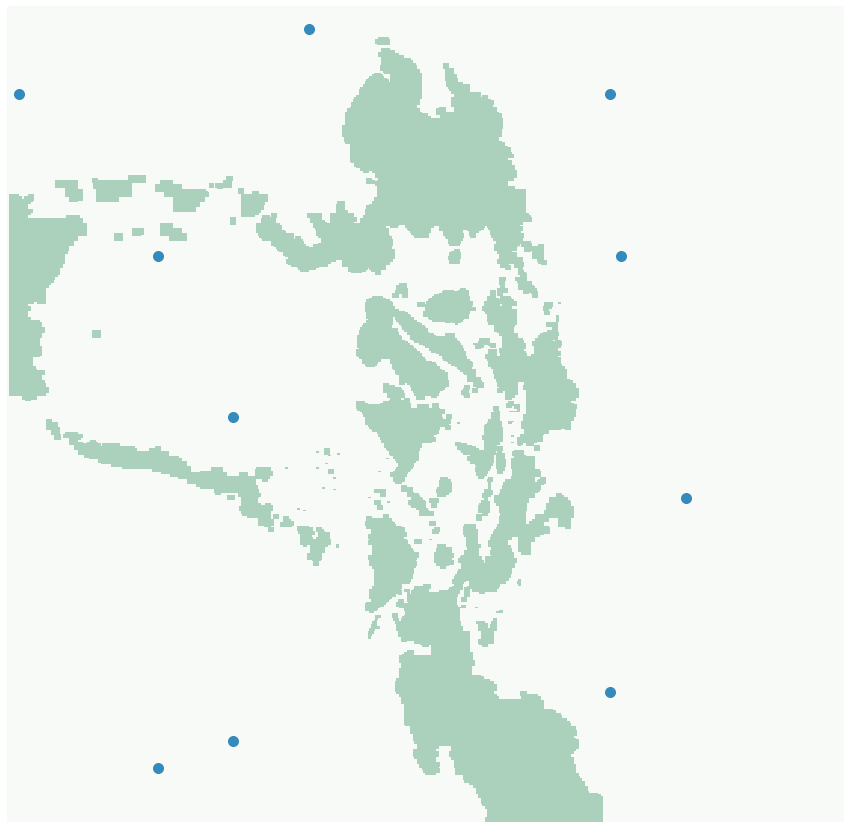

In [1173]:
plt.figure(figsize=(15,15))
sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
plt.plot([100, 150, 407, 100, 8, 200, 400, 150, 400, 450], 
         [504-350, 504-250, 504-350, 504-33, 504-450, 504-490, 504-450, 504-50, 504-80, 504-200], '.', markersize=20)
plt.axis('off')
plt.show()

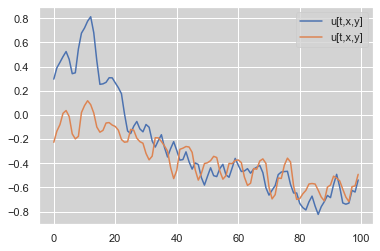

In [1046]:
τ = 0.001 #1 #0.1 #0.001 #0.1 #0.001
x, y = 100, 504-350 #8, 504-450 #100, 504-33 #407, 504-350 #100, 504-350 #  # # # # #100, 504-350
z = u[:,x,y]
plt.plot(range(len(z)), z, label='u[t,x,y]')
z = v[:,x,y]
plt.plot(range(len(z)), z, label='u[t,x,y]')
plt.legend()

In [1025]:
z = u[:,x,y]
#z = v[:,x,y]

In [1026]:
def get_k_folds(z, k):
    n = len(z)
    sz = n // k
    return {i:z[i*sz:(i+1)*sz] for i in range(k)}

folds = list(get_k_folds(z, 10).values())

In [46]:
def get_train_test_fold(z, i, k):
    n = len(z)
    sz = n // k
    #return np.concatenate([z[np.arange((i-1)*sz)], z[np.arange(i*sz, k*sz)]]), z[(i-1)*sz:i*sz]
    return np.concatenate([np.arange((i-1)*sz), np.arange(i*sz, k*sz)]), \
          np.concatenate([z[np.arange((i-1)*sz)], z[np.arange(i*sz, k*sz)]]), \
          np.arange((i-1)*sz, i*sz), z[(i-1)*sz:i*sz]

In [47]:
def log(x):
    return 0 if x <= 0 else np.log(x)

def compute_log_marginal_likelihood(y, μ, K):
    return -(y-μ).T@np.linalg.solve(K, (y-μ))/2 - log(round(np.linalg.det(K), 3))/2 - len(y)*np.log(2*np.pi)/2

#compute_log_marginal_likelihood(y1, Σ1_2)

In [1030]:
k = 10
l = np.linspace(0.1, 5, 10)
σ = np.linspace(0.1, 5, 10)    
ll_mean_k_folds = np.zeros((len(l), len(σ)))
for i1 in range(1, k+1):
    x2, y2, x1, y1 = get_train_test_fold(z, i1, k)
    print(len(x2), len(x1))
    ll = np.zeros((len(l), len(σ)))
    for i in range(len(l)):
        for j in range(len(σ)):
            Σ22 = compute_sigma(x2, x2, σ[j], l[i])
            Σ12 = compute_sigma(x1, x2, σ[j], l[i])
            Σ21 = compute_sigma(x2, x1, σ[j], l[i])
            Σ11 = compute_sigma(x1, x1, σ[j], l[i])
            Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), Σ21)) 
            ll[i,j] = compute_log_marginal_likelihood(y1, Σ1_2)
    #print(ll)
    ll_mean_k_folds += ll
ll_mean_k_folds /= k

90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10


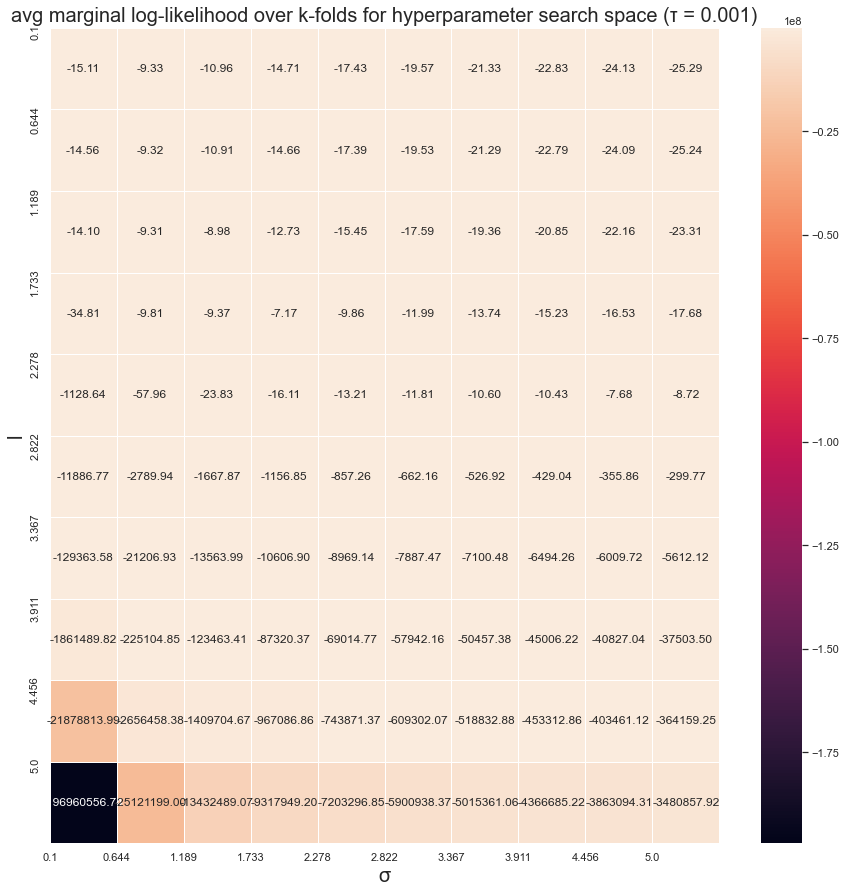

In [1031]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,15))
#vmax, vmin = np.max(ll_mean_k_folds), np.min(ll_mean_k_folds)
sns.heatmap(ll_mean_k_folds, linewidths=.5, 
            annot=True, fmt=".2f")# , 
            #norm=LogNorm(vmin = vmin, vmax = vmax), vmax = vmax, vmin = vmin)
#ll1[ll1 <= 0] = 10**(-3)
#plt.imshow(ll1)
#plt.xscale('log',base=10) 
#plt.yscale('log',base=10) 
#plt.colorbar()
plt.xticks(range(len(σ)), np.round(σ,3))
plt.yticks(range(len(l)), np.round(l,3))
plt.xlabel('σ', size=20) #, rotation='vertical')
plt.ylabel('l', size=20)
plt.title('avg marginal log-likelihood over k-folds for hyperparameter search space (τ = {})'.format(τ), size=20)
plt.show()

In [1032]:
np.where(ll_mean_k_folds == np.max(ll_mean_k_folds))

(array([3], dtype=int64), array([3], dtype=int64))

In [1033]:
np.max(ll_mean_k_folds), np.min(ll_mean_k_folds)

(-7.170234847297294, -196960556.7438173)

In [843]:
x, y

(100, 154)

In [600]:
l

array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ])

In [601]:
σ

array([0.1       , 0.64444444, 1.18888889, 1.73333333, 2.27777778,
       2.82222222, 3.36666667, 3.91111111, 4.45555556, 5.        ])

In [1002]:
l[4], σ[5]

(2.277777777777778, 2.8222222222222224)

In [1011]:
l[5], σ[9]

(2.8222222222222224, 5.0)

In [656]:
ind = np.random.choice(len(np.where(mask != 0)[0]), 3)
print(ind)
p = np.where(mask != 0)
p[0][ind], p[1][ind]

[220602 222890   4890]


(array([472, 477,   8], dtype=int64), array([160,  99, 450], dtype=int64))

In [1064]:
k = 10
ll_mean_k_folds = 0
l, σ = 1.733, 1.733 #0.1, 0.1 #2.277777777777778, 2.8222222222222224 #3.91, np.sqrt(0.16)
μ1 = np.mean(z)
for i1 in range(1, k+1):
    x2, y2, x1, y1 = get_train_test_fold(z, i1, k)
    print(len(x2), len(x1))
    Σ22 = compute_sigma(x2, x2, σ, l)
    Σ12 = compute_sigma(x1, x2, σ, l)
    Σ21 = compute_sigma(x2, x1, σ, l)
    Σ11 = compute_sigma(x1, x1, σ, l)
    μ2 = np.mean(y2)
    μ1_2 = μ1 + Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), y2 - μ2)) 

    Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), Σ21)) 
    ll = compute_log_marginal_likelihood(y1, μ1, Σ1_2)
    ll_mean_k_folds += ll
ll_mean_k_folds / k

90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10
90 10


-7.279756719267181

In [1137]:
σ, l

(1.733, 1.733)

In [53]:
τ = 0.001
i = 0
for l in np.linspace(1, 3, 10):
    for σ in np.linspace(0.1, 2, 10):
        x, y = 100, 504-350
        z = u[:,x,y] #v[:,x,y]
        μ1 = np.mean(z)
        x = np.arange(0, 100)
        x_ = np.linspace(0, 99, 300)
        #μ1 = np.zeros(len(x_))
        Σ22 = compute_sigma(x, x, σ, l)
        Σ12 = compute_sigma(x_, x, σ, l)
        Σ21 = compute_sigma(x, x_, σ, l)
        Σ11 = compute_sigma(x_, x_, σ, l)
        μ2 = np.mean(z)
        μ1_2 = μ1 + Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(z)), z - μ2)) 
        Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(z)), Σ21)) 
        plt.style.use("bmh")
        plt.figure(figsize=(20,10))
        plt.xticks(np.arange(0, 300, 10), np.arange(0, 300, 10).tolist())
        plt.plot(x_, μ1_2)
        #plt.stem(x_, μ1_2-3*np.diag(Σ1_2)) #'-.')
        #plt.errorbar(x_, μ1_2, yerr=(np.sqrt(np.diag(Σ1_2)), np.sqrt(np.diag(Σ1_2))))
        plt.plot(x, z, '*', markersize=10)
        plt.xticks(np.arange(0, 300, 10), np.arange(0, 300, 10).tolist(), rotation='vertical')
        plt.xlabel('t (in days)', size=20)
        plt.fill_between(x_, μ1_2-3*np.sqrt(np.diag(Σ1_2)), μ1_2+3*np.sqrt(np.diag(Σ1_2)), color='g', alpha=.2)
        plt.xticks(np.arange(100), np.arange(0, 300, 3).tolist())
        plt.title('Prediction with Gaussian Process fitted on the u-flow (l={:.3f}, σ={:.3f})'.format(l ,σ), size=25)
        plt.savefig('gp_{:03d}.png'.format(i))
        plt.close()
        i += 1

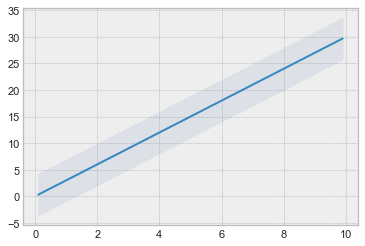

In [1104]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = np.linspace(0.1, 9.9, 20)
y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

#fig, ax = plt.subplots()
plt.plot(x,y)
plt.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

In [ ]:
k = 10
l = np.linspace(0.1, 5, 10)
σ = np.linspace(0.1, 5, 10)    
ll_mean_k_folds = np.zeros((len(l), len(σ)))
for i1 in range(1, k+1):
    x2, y2, x1, y1 = get_train_test_fold(z, i1, k)
    print(len(x2), len(x1))
    ll = np.zeros((len(l), len(σ)))
    for i in range(len(l)):
        for j in range(len(σ)):
            Σ22 = compute_sigma(x2, x2, σ[j], l[i])
            Σ12 = compute_sigma(x1, x2, σ[j], l[i])
            Σ21 = compute_sigma(x2, x1, σ[j], l[i])
            Σ11 = compute_sigma(x1, x1, σ[j], l[i])
            Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(y2)), Σ21)) 
            ll[i,j] = compute_log_marginal_likelihood(y1, Σ1_2)
    #print(ll)
    ll_mean_k_folds += ll
ll_mean_k_folds /= k

{'dataplot': [<matplotlib.collections.PathCollection at 0x20150a51888>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x20137994d08>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x20135a279c8>]}

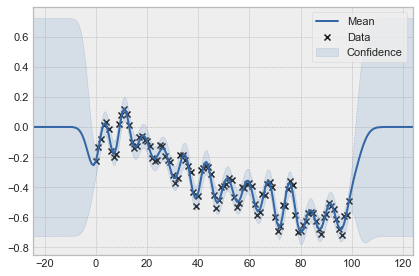

In [1114]:
import GPy
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
model = GPy.models.GPRegression(np.arange(100).reshape(-1,1), z.reshape(-1,1), kernel)
model.constrain_positive("noise")
model.randomize()
model.noise_variance = .001
model.optimize(messages=True, max_iters=1e5)
model.plot(levels=10)

In [1035]:
model

In [1036]:
dir(model)

['Gaussian_noise',
 'X',
 'Y',
 'Y_metadata',
 'Y_normalized',
 '_Parameterizable__visited',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_io',
 '_add_parameter_name',
 '_add_to_index_operations',
 '_added_names_',
 '_allowed_failures',
 '_build_from_input_dict',
 '_checkgrad',
 '_connect_fixes',
 '_connect_parameters',
 '_default_constraint_',
 '_default_prior_',
 '_description_str',
 '_disconnect_parent',
 '_ensure_fixes',
 '_fail_count',
 '_fixes_',
 '_format_input_dict',
 '_format_spec',
 '_from_dict',
 '_get_original',
 '_gradient_array_',
 '_grads',
 '_has_fixes',
 '_highes

In [1115]:
model.log_likelihood()

110.65842465710392

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X, y)
gpr.score(X, y)
gpr.predict(X[:2,:], return_std=True)

In [1118]:
np.sqrt(0.135)

0.3674234614174767

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

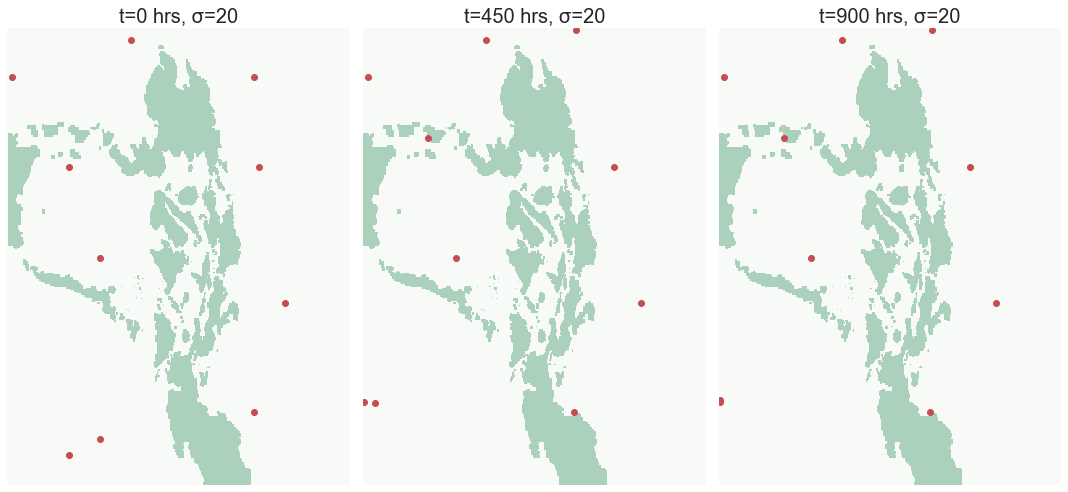

In [1174]:
x1, y1 = 100, 504-350
t = 0
dt = 1
σ = 20
n = 10
#np.random.seed(1)
#xs = np.random.normal(x1, σ, n)
#ys = np.random.normal(y1, σ, n)
xs = np.array([100, 150, 407, 100, 8, 200, 400, 150, 400, 450])
ys = np.array([504-350, 504-250, 504-350, 504-33, 504-450, 504-490, 504-450, 504-50, 504-80, 504-200])
#plt.plot(xs, 504-ys, '.', label='t = {} hrs'.format(round(3*t)))
#Xs, Ys = {t:xs}, {t:ys}
plt.figure(figsize=(15,7))
j = 0
x = np.arange(0, 100)
while t <= 300:
    print(t)
    if t in [0, 150, 300]:
        plt.subplot(1,3,j+1), 
        sns.heatmap(mask, cmap=pal, alpha=0.4, cbar=None)
        plt.plot(xs, ys, 'ro') #, label='t = {} hrs'.format(round(3*t)))
        plt.title('t={} hrs, σ={}'.format(round(3*t), σ), size=20)
        plt.axis('off')
        j += 1
        
    for i in range(len(xs)):
        x1, y1 = xs[i], ys[i]
        z = u[:,np.round(x1).astype(int),np.round(y1).astype(int)] #v[:,x,y]
        μ1 = np.mean(z)
        x_ = np.array([t])
        Σ22 = compute_sigma(x, x, σ, l)
        Σ12 = compute_sigma(x_, x, σ, l)
        Σ21 = compute_sigma(x, x_, σ, l)
        Σ11 = compute_sigma(x_, x_, σ, l)
        μ2 = np.mean(z)
        μ1_2 = μ1 + Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(z)), z - μ2)) 
        #Σ1_2 = Σ11 - Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(z)), Σ21)) 
        #print(t,μ1_2)
        xs[i] = x1 + dt*μ1_2[0]
        z = v[:,np.round(x1).astype(int),np.round(y1).astype(int)] #v[:,x,y]
        μ1 = np.mean(z)
        x_ = np.array([t])
        Σ22 = compute_sigma(x, x, σ, l)
        Σ12 = compute_sigma(x_, x, σ, l)
        Σ21 = compute_sigma(x, x_, σ, l)
        Σ11 = compute_sigma(x_, x_, σ, l)
        μ2 = np.mean(z)
        μ1_2 = μ1 + Σ12@(np.linalg.solve(Σ22 + τ**2*np.eye(len(z)), z - μ2)) 
        ys[i] = y1 + dt*μ1_2[0]    

    t += dt
plt.tight_layout()
plt.show()
#plt.plot(np.array(xs), 504-np.array(ys), alpha=0.4)

In [1154]:
mask[np.round(xs).astype(int), np.round(ys).astype(int)]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [1155]:
xs[3:6], ys[3:6]

(array([ 60.49790986, 129.76716782,  60.47342146]),
 array([114.43923048, 192.14629047, 114.42506153]))